# AlphaFactor Research 01

# Introduction

In [64]:
import pandas as pd
import ta
import numpy as np
import pickle
import itertools
from datetime import datetime

import alphalens
from alphalens import performance as perf
from alphalens import utils, plotting

import pyfolio

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [65]:
Prices = pickle.load(open('Prices.pkl', 'rb'))

In [66]:
train_start = datetime(2015, 1, 1)
train_end = datetime(2017, 12, 31)

trainPrices = {}
for symbol, data in Prices.items():
    trainPrices[symbol] = data.loc[train_start:train_end]

In [67]:
whl = trainPrices['WHL.JO'].copy()
whl.head()

high     low    open   close     volume    adj_close
Date                                                              
2015-01-01  7710.0  7710.0  7710.0  7710.0        0.0  6203.339844
2015-01-02  7795.0  7600.0  7651.0  7625.0   613354.0  6134.950684
2015-01-05  7650.0  7301.0  7583.0  7340.0  1472081.0  5905.644043
2015-01-06  7641.0  7354.0  7354.0  7621.0  1173591.0  6131.731934
2015-01-07  7750.0  7451.0  7515.0  7750.0  2275334.0  6235.523438

# Data cleaning and validation

In [68]:
# 2017-01-18	
trainPrices['GLPROP.JO'].loc[datetime(2017, 1, 10):datetime(2017, 1, 20)]

high     low    open     close   volume      adj_close
Date                                                                
2017-01-10  3489.0  3430.0  3475.0    3445.0  69398.0    3444.051270
2017-01-11  3465.0  3445.0  3455.0    3466.0   6426.0    3465.045410
2017-01-12  3440.0  3370.0  3440.0    3363.0  64075.0    3362.073730
2017-01-13  3400.0  3390.0  3390.0    3386.0  21058.0    3385.067383
2017-01-16  3419.0  3380.0  3395.0    3400.0   7148.0    3399.063477
2017-01-17  3385.0  3355.0  3380.0    3358.0  10926.0    3357.075195
2017-01-18  3415.0  3395.0  3395.0    3400.0   7366.0    3399.063477
2017-01-19  3405.0  3405.0  3405.0  340500.0  24398.0  340406.218750
2017-01-20  3370.0  3350.0  3370.0    3365.0   8243.0    3364.073242

In [69]:
trainPrices['GLPROP.JO'].loc[datetime(2017, 1, 19), 'close'] = 3405.00
trainPrices['GLPROP.JO'].loc[datetime(2017, 1, 19), 'adj_close'] = 3404.06218750

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [70]:
# 2017-07-12	
trainPrices['SCD.JO'].loc[datetime(2016, 1, 1):datetime(2017, 6, 30)]#['close'].plot()

high          low         open        close    volume  \
Date                                                                       
2016-01-29       0.9800       0.9800       0.9800       0.9800       0.0   
2016-02-29       0.9800       0.9800       0.9800       0.9800       0.0   
2016-03-31       1.0426       1.0426       1.0426       1.0426       0.0   
2016-04-29       1.0426       1.0426       1.0426       1.0426       0.0   
2016-05-31       1.0426       1.0426       1.0426       1.0426       0.0   
2016-06-30       1.0770       1.0770       1.0770       1.0770       0.0   
2016-07-29       1.0770       1.0770       1.0770       1.0770       0.0   
2016-08-31       1.0770       1.0770       1.0770       1.0770       0.0   
2016-09-30       1.1239       1.1239       1.1239       1.1239       0.0   
2016-10-31       1.1239       1.1239       1.1239       1.1239       0.0   
2016-11-30       1.1239       1.1239       1.1239       1.1239       0.0   
2017-01-31       1.1000       1.1000       1.1000       1.1000       0.0   
2017-02-28       1.1000       1.1000       1.1000       1.1000       0.0   
2017-03-31       1.1066       1.1066       1.1066       1.1066       0.0   
2017-04-28       1.1066       1.1066       1.1066       1.1066       0.0   
2017-05-31       1.1066       1.1066       1.1066       1.1066       0.0   
2017-06-09  183400.0000  182000.0000  183400.0000  182000.0000   55547.0   
2017-06-12  184500.0000  181600.0000  184500.0000  184500.0000    9676.0   
2017-06-13  184500.0000  182100.0000  182900.0000  183000.0000  122820.0   
2017-06-14  184500.0000  184000.0000  184000.0000  184000.0000   43226.0   
2017-06-15  184500.0000  184200.0000  184500.0000  184500.0000  183360.0   
2017-06-16  184500.0000  184500.0000  184500.0000  184500.0000       0.0   
2017-06-19  185900.0000  180100.0000  184500.0000  180100.0000  121717.0   
2017-06-20  184500.0000  183700.0000  184200.0000  183700.0000  110578.0   
2017-06-21  186000.0000  182500.0000  183700.0000  182500.0000    9868.0   
2017-06-22  187000.0000  183000.0000  183000.0000  187000.0000    3420.0   
2017-06-23  190000.0000  183600.0000  187000.0000  190000.0000   23681.0   
2017-06-26  193200.0000  190000.0000  191400.0000  190000.0000  360473.0   
2017-06-27  194000.0000  185200.0000  185300.0000  194000.0000  136528.0   
2017-06-28  197200.0000  192000.0000  192000.0000  194300.0000   11730.0   
2017-06-29  198000.0000  194300.0000  194300.0000  196000.0000   14799.0   
2017-06-30  200100.0000  196500.0000  196500.0000  200100.0000   26023.0   

                adj_close  
Date                       
2016-01-29       0.979231  
2016-02-29       0.979231  
2016-03-31       1.041782  
2016-04-29       1.041782  
2016-05-31       1.041782  
2016-06-30       1.076155  
2016-07-29       1.076155  
2016-08-31       1.076155  
2016-09-30       1.123018  
2016-10-31       1.123018  
2016-11-30       1.123018  
2017-01-31       1.099137  
2017-02-28       1.099137  
2017-03-31       1.105732  
2017-04-28       1.105732  
2017-05-31       1.105732  
2017-06-09  181857.218750  
2017-06-12  184355.250000  
2017-06-13  182856.437500  
2017-06-14  183855.640625  
2017-06-15  184355.250000  
2017-06-16  184355.250000  
2017-06-19  179958.718750  
2017-06-20  183555.890625  
2017-06-21  182357.875000  
2017-06-22  186854.375000  
2017-06-23  189852.015625  
2017-06-26  189852.015625  
2017-06-27  193848.890625  
2017-06-28  194148.703125  
2017-06-29  195847.359375  
2017-06-30  199944.171875

In [71]:
scd = trainPrices['SCD.JO']
trainPrices['SCD.JO'] = scd.loc[datetime(2017, 6, 1):]
trainPrices['SCD.JO'].head()

high       low      open     close    volume      adj_close
Date                                                                       
2017-06-09  183400.0  182000.0  183400.0  182000.0   55547.0  181857.218750
2017-06-12  184500.0  181600.0  184500.0  184500.0    9676.0  184355.250000
2017-06-13  184500.0  182100.0  182900.0  183000.0  122820.0  182856.437500
2017-06-14  184500.0  184000.0  184000.0  184000.0   43226.0  183855.640625
2017-06-15  184500.0  184200.0  184500.0  184500.0  183360.0  184355.250000

In [72]:
trainPrices['ETFPLD.JO'].loc['2015-07-10':].iloc[:10]

high     low      open   close     volume  adj_close
Date                                                              
2015-07-10  8067.0  7969.0    7982.0  8030.0     9004.0     8030.0
2015-07-13  8267.0  8030.0    8030.0  8296.0   364190.0     8296.0
2015-07-14  8195.0  8130.0    8130.0  8138.0   506822.0     8138.0
2015-07-15  8077.0  8077.0    8077.0  8077.0        0.0     8077.0
2015-07-16  7865.0  7726.0    7858.0  7819.0   510139.0     7819.0
2015-07-17  7733.0  6900.0    7732.0  7563.0   858707.0     7563.0
2015-07-20  7580.0  7559.0  755900.0  7609.0  3554911.0     7609.0
2015-07-21  7650.0  7600.0    7610.0  7701.0  1250489.0     7701.0
2015-07-22  7625.0  7600.0    7625.0  7602.0   988508.0     7602.0
2015-07-23  7801.0  7757.0    7800.0  7758.0   728388.0     7758.0

In [73]:
trainPrices['ETFPLD.JO'].loc[datetime(2015, 7, 20), 'open'] = 7559.00

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [74]:
# 	2015-07-16
trainPrices['STXSWX.JO'].loc['2015-07-10':].iloc[:10]

high     low      open   close   volume    adj_close
Date                                                              
2015-07-10  1068.0  1053.0    1068.0  1057.0  13415.0  1056.716309
2015-07-13  1073.0  1062.0    1073.0  1072.0  18481.0  1071.712402
2015-07-14  1065.0  1061.0    1065.0  1065.0   8716.0  1064.714355
2015-07-15  1079.0  1066.0    1068.0  1075.0  32456.0  1074.711548
2015-07-16  1085.0  1067.0    1068.0  1081.0  26330.0  1080.709961
2015-07-17  1086.0  1076.0    1078.0  1080.0  11040.0  1079.710205
2015-07-20  1084.0  1079.0  107900.0  1086.0  49031.0  1085.708740
2015-07-21  1090.0  1079.0    1085.0  1084.0   1914.0  1083.709106
2015-07-22  1084.0  1063.0    1084.0  1063.0  14870.0  1062.714722
2015-07-23  1080.0  1067.0    1080.0  1073.0   5324.0  1072.712158

In [75]:
trainPrices['STXSWX.JO'].loc[datetime(2015, 7, 20), 'open'] = 1079.00

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Classical techniques and cross-sectional strategies

## Basic trend following and/or Counter-trend strategy

In [76]:
macd = ta.trend.MACD(whl['close'], n_slow = 26, n_fast = 12, n_sign = 9)

ema26 = ta.trend.ema(whl['close'], periods = 26)
ema12 =ta.trend.ema(whl['close'], periods = 12)

whl['ema26'] = ema26
whl['ema12'] = ema12

whl['macd'] = macd.macd()
whl['macd_signal']  = macd.macd_signal()
whl['macd_diff'] = macd.macd_diff()


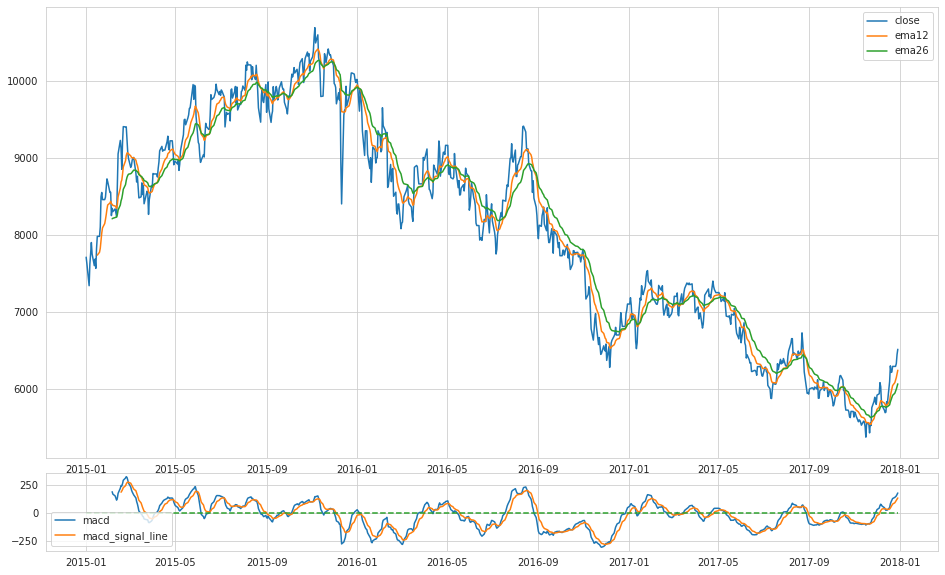

In [77]:
fig = plt.figure(figsize = (16, 10))
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(whl.index, whl['close'])
ax1.plot(whl.index, whl['ema12'])
ax1.plot(whl.index, whl['ema26'])
ax1.legend(('close', 'ema12', 'ema26', ))
ax1.set_xticklabels(' ')

ax2.plot(whl.index, whl['macd'])
ax2.plot(whl.index, whl['macd_signal'])
ax2.plot(whl.index, list(itertools.repeat(0, len(whl.index))), linestyle = 'dashed')
ax2.legend(('macd', 'macd_signal_line', ), loc = 'lower left')

In [78]:
%time
macd_data = pd.DataFrame()
for i, (symbol, data) in enumerate(trainPrices.items()):
    if len(data) > 0:
        data = data.copy()
        close = data['close']
        
        Macd = ta.trend.MACD(close, n_slow = 26, n_fast = 12, n_sign = 9)
        macd = Macd.macd()
        macd_signal = Macd.macd_signal()
        macd_diff = Macd.macd_diff() * -1

        out = pd.DataFrame(macd_diff)
        out['symbol'] = symbol
        out = out.reset_index().set_index(['Date', 'symbol'])

        macd_data = pd.concat([macd_data, out])
        # print(i, symbol)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


In [79]:
macd_data

MACD_diff_12_26
Date       symbol                  
2017-10-19 4SI.JO               NaN
2017-10-20 4SI.JO               NaN
2017-10-23 4SI.JO               NaN
2017-10-24 4SI.JO               NaN
2017-10-25 4SI.JO               NaN
...                             ...
2017-12-25 ZPLP.JO       -53.718039
2017-12-26 ZPLP.JO       -47.688752
2017-12-27 ZPLP.JO       -40.354182
2017-12-28 ZPLP.JO       -32.111094
2017-12-29 ZPLP.JO       -23.848948

[249904 rows x 1 columns]

In [80]:
prices_data = pd.DataFrame()
for symbol, data in trainPrices.items():
    out = data['close']
    out.name = symbol
    prices_data = pd.concat([prices_data, out], axis = 1)

In [81]:
prices_data.index = pd.to_datetime(prices_data.index)

In [82]:
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    factor = macd_data,
    prices = prices_data,
    quantiles = 3,
    periods = [1, 2, 5]
)
factor_data

Dropped 5.5% entries from factor data: 5.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        2D        5D     factor  factor_quantile
date       asset                                                              
2015-02-17 ABG.JO     0.020861  0.034446  0.022586  94.739168                3
           ABSP.JO   -0.008917 -0.031847 -0.025478  93.634103                3
           ACE.JO     0.000000 -0.153846  0.000000  -1.897642                1
           ACG.JO     0.002985 -0.004975  0.018905  21.486675                3
           ACL.JO     0.000000  0.005385  0.007692  -9.489539                1
...                        ...       ...       ...        ...              ...
2017-12-22 WSL.JO     0.000000  0.000000  0.012121   0.353278                3
           YRK.JO     0.000000  0.000000 -0.044444  -1.657683                2
           YYLBEE.JO  0.000000  0.000000  0.000728 -13.264181                1
           ZED.JO     0.000000  0.000000  0.028316  -5.564819                2
           ZPLP.JO    0.000000  0.000000 -0.002346 -57.537588                1

[236257 rows x 5 columns]

In [83]:
mean_quant_ret, std_quantile = \
    perf.mean_return_by_quantile(factor_data,
                                 by_group = False,
                                 demeaned = True,
                                 group_adjust = False)

mean_quant_rateret = \
        mean_quant_ret.apply(utils.rate_of_return, axis=0,base_period = mean_quant_ret.columns[0])

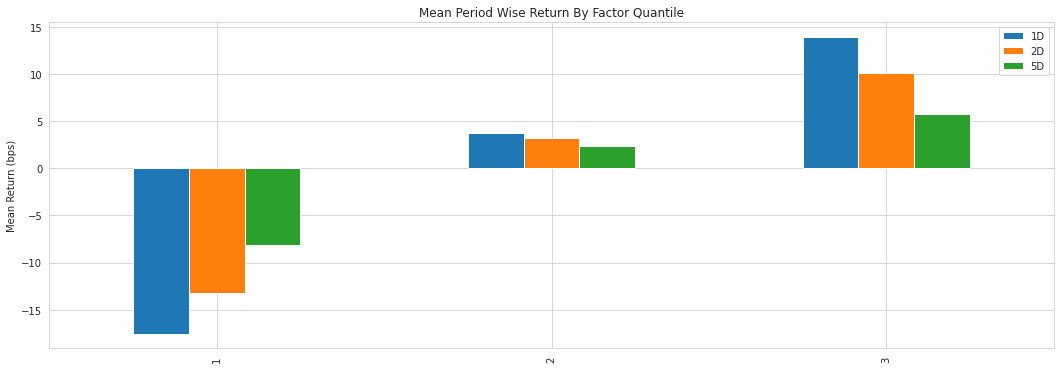

In [84]:
plotting.plot_quantile_returns_bar(mean_quant_rateret,
                                   by_group = False,
                                   ylim_percentiles = None)
plt.show()

In [85]:
factor_returns = perf.factor_returns(factor_data[factor_data['factor_quantile'].isin([1, 3])], demeaned = True)

mean_quant_ret_bydate, std_quant_daily = \
        perf.mean_return_by_quantile(factor_data,
                                     by_date = True,
                                     by_group = False,
                                     demeaned = True,
                                     group_adjust = False)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:694: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,


<Figure size 1152x576 with 0 Axes>

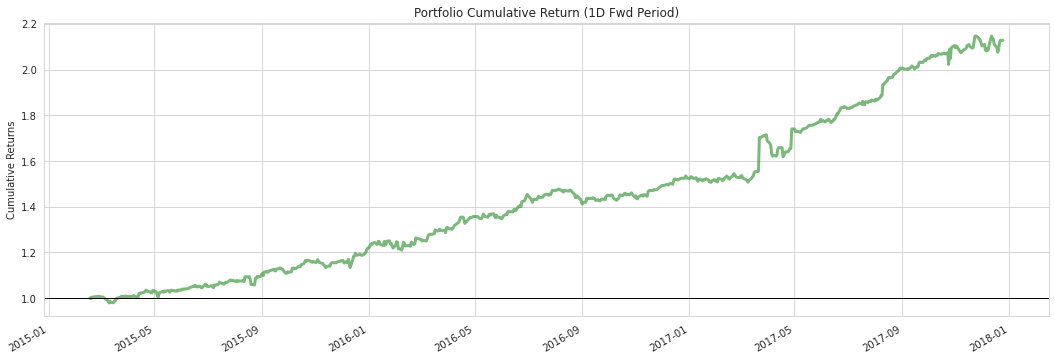

In [86]:
fig = plt.figure(figsize = (16, 8))
p = '1D'
title = 'Factor weighted LONG/SHORT portfolio cumulative returns'
plotting.plot_cumulative_returns(factor_returns[p],
                                         period = p)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

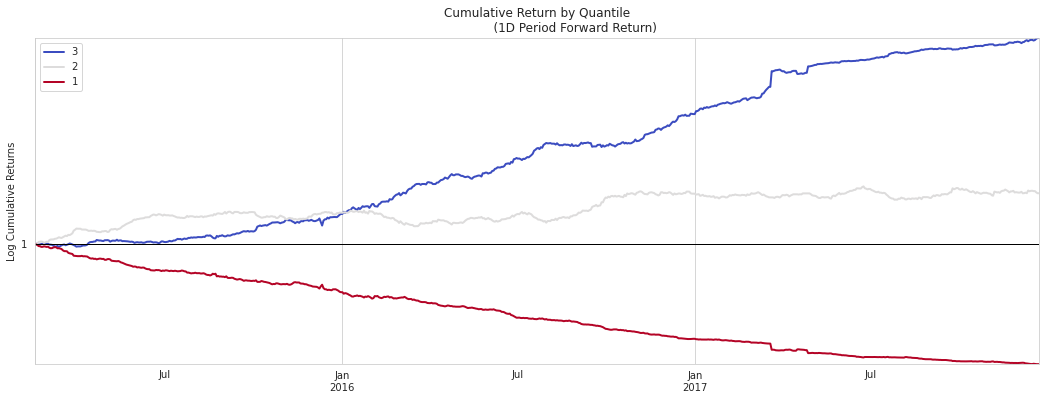

In [87]:
fig = plt.figure(figsize = (16, 8))
cumulative_quantile_returns = mean_quant_ret_bydate.groupby(level = ['factor_quantile', 'date']).sum()[p]
plotting.plot_cumulative_returns_by_quantile(cumulative_quantile_returns,
                                             period = p)
plt.show()

In [88]:
pyfolio_input = alphalens.performance.create_pyfolio_input(factor_data, period = '1D', capital = 1000000, quantiles = [1, 3])

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:694: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,


In [89]:
returns = pyfolio_input[0]
returns

date
2015-02-17    0.000000
2015-02-18   -0.002626
2015-02-19    0.006051
2015-02-20    0.000316
2015-02-21    0.000000
                ...   
2017-12-21    0.015364
2017-12-22    0.004756
2017-12-23    0.000000
2017-12-24    0.000000
2017-12-25   -0.000004
Freq: D, Length: 1043, dtype: float64

In [90]:
positions = pyfolio_input[1]
positions

asset          4SI.JO        ABG.JO       ABSP.JO       ACE.JO       ACG.JO  \
date                                                                          
2015-02-17    0.00000  14078.408130  13904.833059 -1100.551816  2572.475232   
2015-02-18    0.00000   7101.564682  16986.490400 -1790.455615  1293.293929   
2015-02-19    0.00000   1947.208780  33693.738847     0.000000   976.667364   
2015-02-20    0.00000    596.738252  39663.546516     0.000000   846.435606   
2015-02-21    0.00000      0.000000      0.000000     0.000000     0.000000   
...               ...           ...           ...          ...          ...   
2017-12-21  606.92931 -30816.441887 -21051.303122     0.000000     0.000000   
2017-12-22    0.00000 -24442.244819 -24801.296295     0.000000     0.000000   
2017-12-23    0.00000      0.000000      0.000000     0.000000     0.000000   
2017-12-24    0.00000      0.000000      0.000000     0.000000     0.000000   
2017-12-25    0.00000      0.000000      0.000000     0.000000     0.000000   

asset            ACL.JO       ACS.JO       ACT.JO       ADH.JO       ADI.JO  \
date                                                                          
2015-02-17 -2293.027952 -1231.502805     0.000000 -1253.199420 -1552.196346   
2015-02-18 -2614.911468 -1904.318973     0.000000 -1889.687891 -2050.984698   
2015-02-19 -2717.516622     0.000000     0.000000 -2040.238325 -2283.796771   
2015-02-20 -2557.452959     0.000000     0.000000     0.000000 -2270.976464   
2015-02-21     0.000000     0.000000     0.000000     0.000000     0.000000   
...                 ...          ...          ...          ...          ...   
2017-12-21  1260.111636 -1003.956173     0.000000 -2713.184951  -414.756165   
2017-12-22  2307.032843   -32.091683  1752.529319 -2130.390125     0.000000   
2017-12-23     0.000000     0.000000     0.000000     0.000000     0.000000   
2017-12-24     0.000000     0.000000     0.000000     0.000000     0.000000   
2017-12-25     0.000000     0.000000     0.000000     0.000000     0.000000   

asset       ...  VLE.JO        VOD.JO  WEA.JO        WHL.JO       WSL.JO  \
date        ...                                                            
2015-02-17  ...     0.0  -1744.071724     0.0 -10230.847939     0.000000   
2015-02-18  ...     0.0  -2477.946264     0.0  -7346.702868 -1714.084642   
2015-02-19  ...     0.0  -2876.176350     0.0  -8430.639609     0.000000   
2015-02-20  ...     0.0  -2484.957275     0.0 -10195.941087 -1920.340483   
2015-02-21  ...     0.0      0.000000     0.0      0.000000     0.000000   
...         ...     ...           ...     ...           ...          ...   
2017-12-21  ...     0.0 -13065.263817     0.0  -6344.476400   619.055380   
2017-12-22  ...     0.0  -8732.711643     0.0  -6600.107960  1740.985822   
2017-12-23  ...     0.0      0.000000     0.0      0.000000     0.000000   
2017-12-24  ...     0.0      0.000000     0.0      0.000000     0.000000   
2017-12-25  ...     0.0      0.000000     0.0      0.000000     0.000000   

asset            YRK.JO    YYLBEE.JO       ZED.JO      ZPLP.JO          cash  
date                                                                          
2015-02-17     0.000000     0.000000    -5.529300     0.000000  1.000000e+06  
2015-02-18     0.000000     0.000000  -930.691654     0.000000  9.973742e+05  
2015-02-19     0.000000     0.000000 -1200.046956     0.000000  1.003410e+06  
2015-02-20 -1981.755676     0.000000 -1174.661397     0.000000  1.003727e+06  
2015-02-21     0.000000     0.000000     0.000000     0.000000  1.003727e+06  
...                 ...          ...          ...          ...           ...  
2017-12-21     0.000000 -1695.112144     0.000000 -8015.018821  2.117672e+06  
2017-12-22     0.000000  -548.077018     0.000000 -7990.332560  2.127744e+06  
2017-12-23     0.000000     0.000000     0.000000     0.000000  2.127744e+06  
2017-12-24     0.000000     0.000000     0.000000     0.000000  2.127744e+06  
2017-12

In [91]:
benchmark = pyfolio_input[2]
benchmark

date
2015-02-17    0.000000
2015-02-18   -0.003950
2015-02-19   -0.000143
2015-02-20    0.010883
2015-02-21    0.000000
                ...   
2017-12-21    0.002517
2017-12-22    0.003760
2017-12-23    0.000000
2017-12-24    0.000000
2017-12-25   -0.000002
Freq: D, Name: benchmark, Length: 1043, dtype: float64

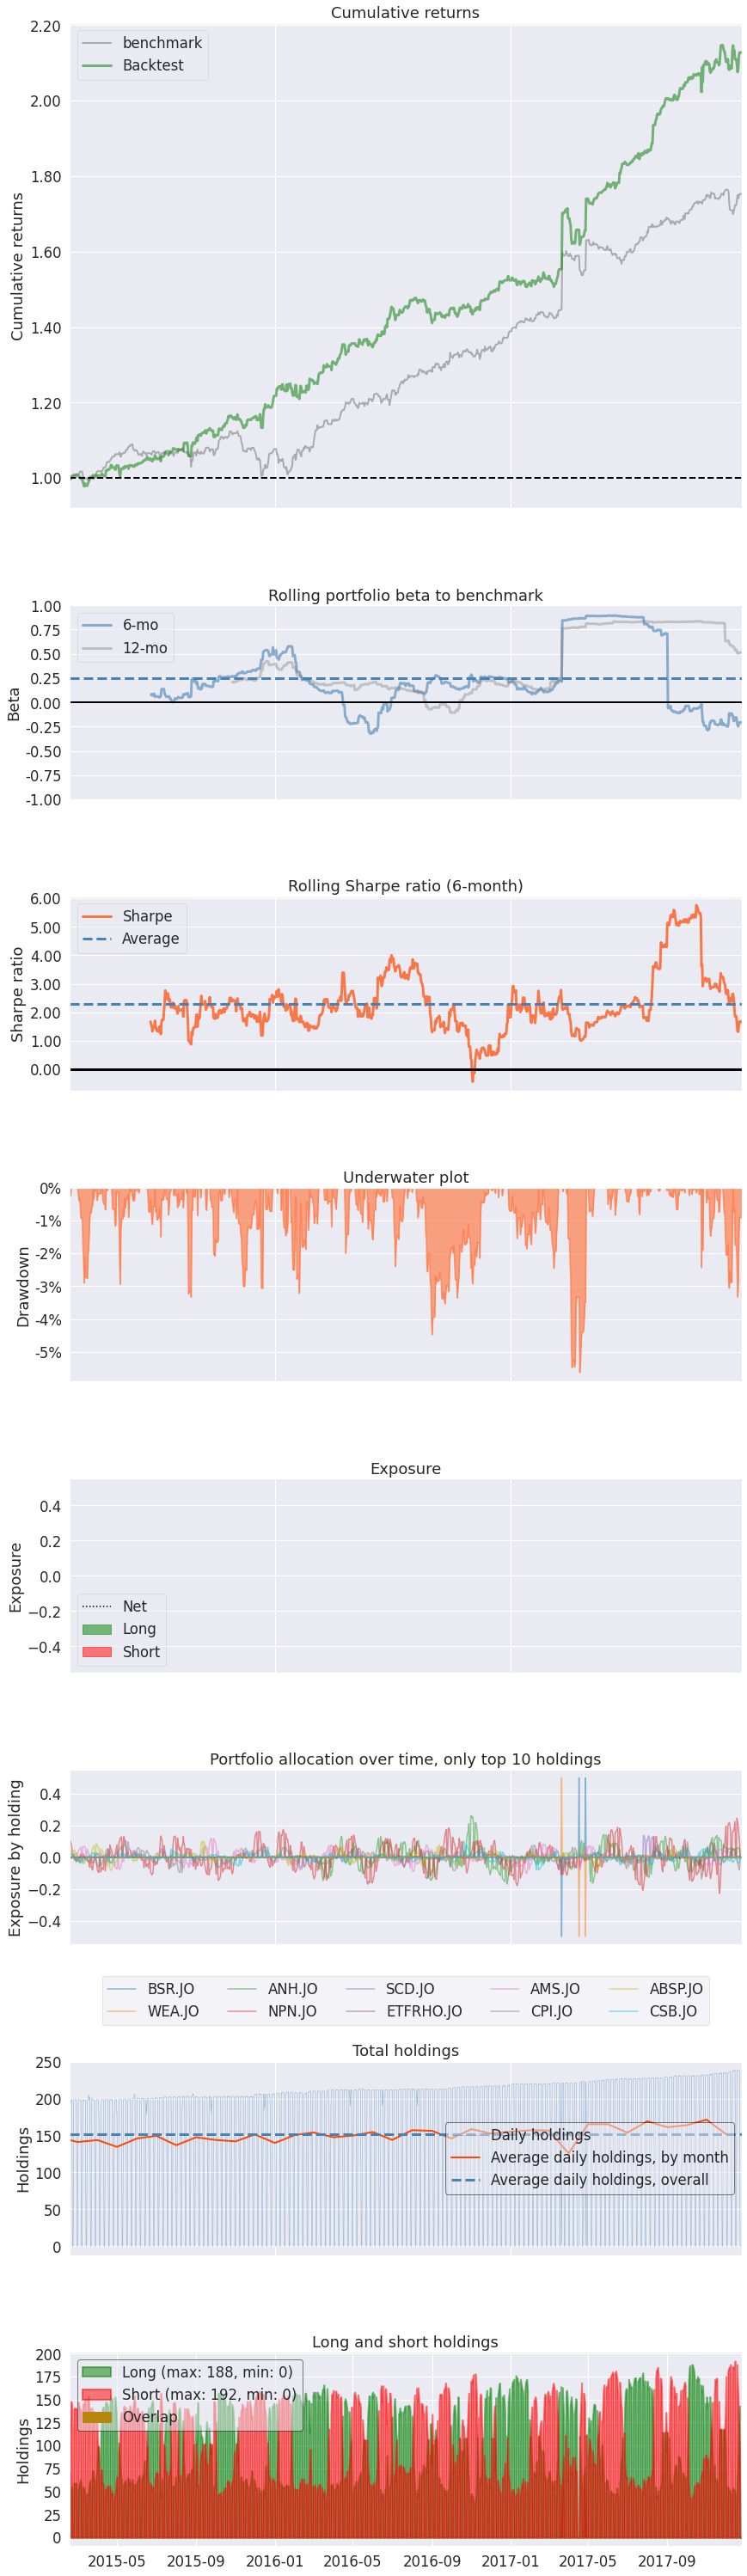

In [92]:
pyfolio.create_simple_tear_sheet(returns, positions, benchmark_rets=benchmark)

# A Quantamental Approach

In [93]:
import mlfinlab as ml
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold

from sklearn.utils import resample
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc, classification_report

## Universe Selection

In [94]:
QTradeableStocks_median_dollar_volume = 2500000
exchange_rate = 16.56
minimum_dollar_volume = QTradeableStocks_median_dollar_volume * exchange_rate
minimum_dollar_volume

41400000.0

In [95]:
%time
dollar_volume_data = pd.DataFrame()
for i, (symbol, data) in enumerate(trainPrices.items()):
    if len(data) > 200:
        data = data.copy()
        close = data['close']
        volume = data['volume']
        
        dollar_volume = volume.mul(close)
        trailing_dollar_volume = dollar_volume.rolling(window = 200).median()

        trailing_dollar_volume.name = 'trailing_dollar_volume'
        out = pd.DataFrame(trailing_dollar_volume)
        out['symbol'] = symbol
        out.index.name = 'Date'
        out = out.reset_index()#.set_index(['Date', 'symbol'])

        dollar_volume_data = pd.concat([dollar_volume_data, out])
        # print(i, symbol)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


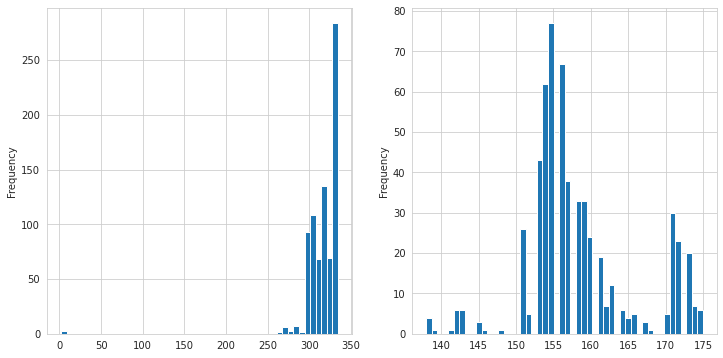

In [96]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6))

dollar_volume_data\
    .groupby(['Date'])['symbol'].count().plot(kind = 'hist', bins = 50, ax = axes[0])

dollar_volume_data[dollar_volume_data['trailing_dollar_volume'] > minimum_dollar_volume]\
    .groupby(['Date'])['symbol'].count().plot(kind = 'hist', bins = 50, ax = axes[1])

In [97]:
dollar_volume_data = dollar_volume_data.set_index(['Date', 'symbol'])
dollar_volume_data['group'] = np.where(dollar_volume_data['trailing_dollar_volume'] > minimum_dollar_volume, 'Tradeable', 'Non-tradeable')
dollar_volume_data

trailing_dollar_volume          group
Date       symbol                                        
2015-01-01 ABG.JO                      NaN  Non-tradeable
2015-01-02 ABG.JO                      NaN  Non-tradeable
2015-01-05 ABG.JO                      NaN  Non-tradeable
2015-01-06 ABG.JO                      NaN  Non-tradeable
2015-01-07 ABG.JO                      NaN  Non-tradeable
...                                    ...            ...
2017-12-25 ZPLP.JO              16254855.0  Non-tradeable
2017-12-26 ZPLP.JO              16254855.0  Non-tradeable
2017-12-27 ZPLP.JO              16254855.0  Non-tradeable
2017-12-28 ZPLP.JO              16094445.0  Non-tradeable
2017-12-29 ZPLP.JO              16094445.0  Non-tradeable

[247308 rows x 2 columns]

In [98]:
(dollar_volume_data['group'].value_counts() / len(dollar_volume_data)).round(3) * 100

Non-tradeable    62.9
Tradeable        37.1
Name: group, dtype: float64

In [99]:
QTradeableStocks_minimun_price = 5
minimum_price = QTradeableStocks_minimun_price * exchange_rate
minimum_price

82.8

In [100]:
%time
price_filter_data = pd.DataFrame()
for i, (symbol, data) in enumerate(trainPrices.items()):
    if len(data) > 50:
        data = data.copy()
        close = data['close']
        
        prices = close

        prices.name = 'prices'
        out = pd.DataFrame(prices)
        out['symbol'] = symbol
        out.index.name = 'Date'
        out = out.reset_index().set_index(['Date', 'symbol'])

        price_filter_data = pd.concat([price_filter_data, out])
        # print(i, symbol)

price_filter_data

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


prices
Date       symbol         
2017-10-19 4SI.JO    235.0
2017-10-20 4SI.JO    250.0
2017-10-23 4SI.JO    269.0
2017-10-24 4SI.JO    285.0
2017-10-25 4SI.JO    285.0
...                    ...
2017-12-25 ZPLP.JO  6395.0
2017-12-26 ZPLP.JO  6395.0
2017-12-27 ZPLP.JO  6393.0
2017-12-28 ZPLP.JO  6385.0
2017-12-29 ZPLP.JO  6380.0

[249643 rows x 1 columns]

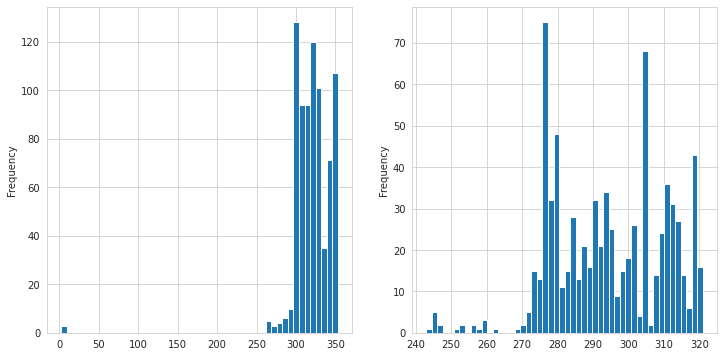

In [101]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6))

price_filter_data.reset_index()\
    .groupby(['Date'])['symbol'].count().plot(kind = 'hist', bins = 50, ax = axes[0])

data = price_filter_data[price_filter_data['prices'] > minimum_price]
data.reset_index()\
    .groupby(['Date'])['symbol'].count().plot(kind = 'hist', bins = 50, ax = axes[1])

In [102]:
price_filter_data['group'] = np.where(price_filter_data['prices'] > minimum_price, 'Tradeable', 'Non-tradeable')
price_filter_data

prices      group
Date       symbol                    
2017-10-19 4SI.JO    235.0  Tradeable
2017-10-20 4SI.JO    250.0  Tradeable
2017-10-23 4SI.JO    269.0  Tradeable
2017-10-24 4SI.JO    285.0  Tradeable
2017-10-25 4SI.JO    285.0  Tradeable
...                    ...        ...
2017-12-25 ZPLP.JO  6395.0  Tradeable
2017-12-26 ZPLP.JO  6395.0  Tradeable
2017-12-27 ZPLP.JO  6393.0  Tradeable
2017-12-28 ZPLP.JO  6385.0  Tradeable
2017-12-29 ZPLP.JO  6380.0  Tradeable

[249643 rows x 2 columns]

In [103]:
(price_filter_data['group'].value_counts() / len(price_filter_data)).round(3) * 100

Tradeable        91.7
Non-tradeable     8.3
Name: group, dtype: float64

In [104]:
dollar_volume_data = dollar_volume_data.rename(columns = {'group':'filter1'})
price_filter_data = price_filter_data.rename(columns = {'group':'filter2'})
tradeable_universe = pd.concat([dollar_volume_data, price_filter_data], axis = 1)

tradeable_universe

trailing_dollar_volume        filter1   prices  \
Date       symbol                                                      
2015-01-01 ABG.JO                        NaN  Non-tradeable  18200.0   
           ABSP.JO                       NaN  Non-tradeable  79001.0   
           ACE.JO                        NaN  Non-tradeable     52.0   
           ACG.JO                        NaN  Non-tradeable    720.0   
           ACL.JO                        NaN  Non-tradeable   2641.0   
...                                      ...            ...      ...   
2017-12-29 WSL.JO                 25466691.0  Non-tradeable    167.0   
           YRK.JO                  9128730.5  Non-tradeable    258.0   
           YYLBEE.JO               8985922.5  Non-tradeable   6875.0   
           ZED.JO                496332189.5      Tradeable    690.0   
           ZPLP.JO                16094445.0  Non-tradeable   6380.0   

                            filter2  
Date       symbol                    
2015-01-01 ABG.JO         Tradeable  
           ABSP.JO        Tradeable  
           ACE.JO     Non-tradeable  
           ACG.JO         Tradeable  
           ACL.JO         Tradeable  
...                             ...  
2017-12-29 WSL.JO         Tradeable  
           YRK.JO         Tradeable  
           YYLBEE.JO      Tradeable  
           ZED.JO         Tradeable  
           ZPLP.JO        Tradeable  

[249643 rows x 4 columns]

In [105]:
tradeable_universe['filter'] = np.where(tradeable_universe['filter1'] == tradeable_universe['filter2'], tradeable_universe['filter1'], 'Non-tradeable')
tradeable_universe

trailing_dollar_volume        filter1   prices  \
Date       symbol                                                      
2015-01-01 ABG.JO                        NaN  Non-tradeable  18200.0   
           ABSP.JO                       NaN  Non-tradeable  79001.0   
           ACE.JO                        NaN  Non-tradeable     52.0   
           ACG.JO                        NaN  Non-tradeable    720.0   
           ACL.JO                        NaN  Non-tradeable   2641.0   
...                                      ...            ...      ...   
2017-12-29 WSL.JO                 25466691.0  Non-tradeable    167.0   
           YRK.JO                  9128730.5  Non-tradeable    258.0   
           YYLBEE.JO               8985922.5  Non-tradeable   6875.0   
           ZED.JO                496332189.5      Tradeable    690.0   
           ZPLP.JO                16094445.0  Non-tradeable   6380.0   

                            filter2         filter  
Date       symbol                                   
2015-01-01 ABG.JO         Tradeable  Non-tradeable  
           ABSP.JO        Tradeable  Non-tradeable  
           ACE.JO     Non-tradeable  Non-tradeable  
           ACG.JO         Tradeable  Non-tradeable  
           ACL.JO         Tradeable  Non-tradeable  
...                             ...            ...  
2017-12-29 WSL.JO         Tradeable  Non-tradeable  
           YRK.JO         Tradeable  Non-tradeable  
           YYLBEE.JO      Tradeable  Non-tradeable  
           ZED.JO         Tradeable      Tradeable  
           ZPLP.JO        Tradeable  Non-tradeable  

[249643 rows x 5 columns]

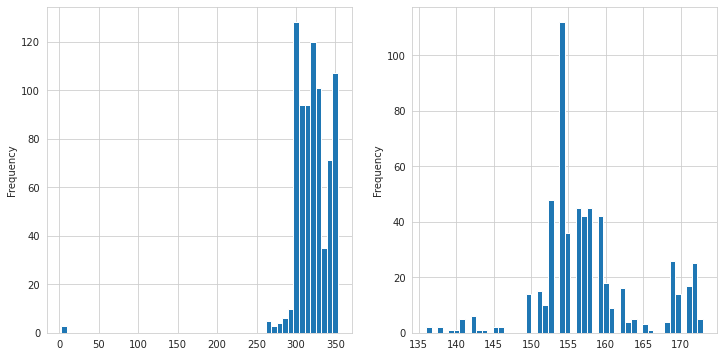

In [106]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6))

tradeable_universe.reset_index()\
    .groupby(['Date'])['symbol'].count().plot(kind = 'hist', bins = 50, ax = axes[0])

data = tradeable_universe[tradeable_universe['filter'] == 'Tradeable']
data.reset_index()\
    .groupby(['Date'])['symbol'].count().plot(kind = 'hist', bins = 50, ax = axes[1])

In [107]:
def macdDiff(open = None, high = None, low = None, close = None, volume = None,
            n_slow = 26, n_fast = 12, n_sign = 9):
    Macd = ta.trend.MACD(
        close, n_slow = n_slow, n_fast = n_fast, n_sign = n_sign)
    
    macd = Macd.macd()
    macd_signal = Macd.macd_signal()
    macd_diff = Macd.macd_diff() * -1
    return macd_diff

In [108]:
def getIndicator(trainPrices,
                 indicator,
                 filter = 'QTradeable',
                 trailing_volume_n = 200, 
                 *args, **kwargs):


    factor_df = pd.DataFrame()
    for i, (symbol, data) in enumerate(trainPrices.items()):
        if len(data) > trailing_volume_n:
            data = data.copy()

            open = data['open']
            high = data['high']
            low = data['low']
            close = data['close']
            volume = data['volume']
#             adj_close = data['adj_close']


            factor = indicator(
                open = open,
                high = high,
                low = low,
                close = close,
                volume = volume,
                *args, **kwargs
            )

            out = pd.DataFrame(factor)
            factor_names = out.columns
            out['symbol'] = symbol
            out.index.name = 'date'
            out = out.reset_index()\
                  .set_index(['date', 'symbol'])

            if filter == 'QTradeable':

                def getTrailingVolume(
                    close, volume, symbol, n = trailing_volume_n):

                    volume = data['volume']
                    dollar_volume = volume.mul(close)

                    trailing_dollar_volume = \
                        dollar_volume.rolling(
                            window = n).median()
                    trailing_dollar_volume.name = \
                        'trailing_dollar_volume'

                    trailing_dollar_volume = \
                        pd.DataFrame(trailing_dollar_volume)

                    trailing_dollar_volume['symbol'] = symbol

                    trailing_dollar_volume = \
                        trailing_dollar_volume.\
                        reset_index()\
                        .set_index(['date', 'symbol'])

                    return trailing_dollar_volume

                def getPricing(close, symbol):
                    prices = pd.DataFrame(close)
                    prices['symbol'] = symbol
                    prices = prices.reset_index()\
                        .set_index(['date', 'symbol'])

                    return prices

                # volume filter
                trailing_dollar_volume = \
                    getTrailingVolume(close, volume, symbol)

                # price filter
                prices = getPricing(close, symbol)

                out = pd.concat(
                    [out, trailing_dollar_volume, prices], 
                    axis = 1)

                QTradeableStocks_median_dollar_volume = 2500000
                exchange_rate = 16.56
                minimum_dollar_volume = \
                    QTradeableStocks_median_dollar_volume * exchange_rate

                QTradeableStocks_minimun_price = 5
                minimum_price = \
                    QTradeableStocks_minimun_price * exchange_rate

                volume_mask = out['trailing_dollar_volume'] > \
                    minimum_dollar_volume
                price_mask = out['close'] > minimum_price

                out = out[volume_mask & price_mask].drop(['trailing_dollar_volume', 'close'], axis = 1)

            factor_df = pd.concat([factor_df, out])#.unstack().asfreq('C').stack()
    return factor_df

In [109]:
macd_data = getIndicator(trainPrices, macdDiff)
macd_data

MACD_diff_12_26
date       symbol                  
2015-10-07 ABG.JO       -115.056498
2015-10-08 ABG.JO        -93.851347
2015-10-09 ABG.JO        -88.838636
2015-10-12 ABG.JO        -68.508261
2015-10-13 ABG.JO        -44.400638
...                             ...
2017-04-25 ZPLP.JO        11.463784
2017-04-26 ZPLP.JO        13.343110
2017-04-28 ZPLP.JO        11.059557
2017-05-04 ZPLP.JO         8.832516
2017-05-05 ZPLP.JO         8.863320

[91284 rows x 1 columns]

In [110]:
def getPrices(trainPrices, symbols):
    prices_data = pd.DataFrame()
    for symbol, data in trainPrices.items():
        if symbol in symbols:
            out = data['close']
            out.name = symbol
            prices_data = pd.concat([prices_data, out], axis = 1)
    prices_data.index = pd.to_datetime(prices_data.index)
    return prices_data#.asfreq('C')

In [111]:
prices_data = getPrices(trainPrices, symbols = macd_data.index.levels[1])
prices_data

ABG.JO  ABSP.JO  ACG.JO  ACL.JO  ACT.JO       ADH.JO  ADI.JO  \
2015-01-01  18200.0  79001.0   720.0  2641.0   520.0   849.054016   810.0   
2015-01-02  17989.0  79050.0   720.0  2582.0   523.0   861.741028   813.0   
2015-01-05  17375.0  79454.0   740.0  2450.0   519.0   857.836975   820.0   
2015-01-06  17828.0  79051.0   765.0  2455.0   530.0   863.692993   820.0   
2015-01-07  18200.0  78200.0   765.0  2381.0   524.0   849.054016   815.0   
...             ...      ...     ...     ...     ...          ...     ...   
2017-12-25  17200.0  68800.0   399.0   389.0   621.0  1675.000000   615.0   
2017-12-26  17200.0  68800.0   399.0   389.0   621.0  1675.000000   615.0   
2017-12-27  17685.0  68800.0   380.0   400.0   650.0  1635.000000   610.0   
2017-12-28  17800.0  68800.0   384.0   400.0   640.0  1639.000000   641.0   
2017-12-29  18106.0  68456.0   398.0   392.0   640.0  1691.000000   645.0   

            ADR.JO      AEG.JO  AEL.JO  ...   TON.JO  TRU.JO       TSG.JO  \
2015-01-01  3211.0  751.598022  1650.0  ...  17292.0  7728.0  2514.479980   
2015-01-02  3205.0  749.439026  1619.0  ...  16865.0  7785.0  2516.209961   
2015-01-05  3305.0  772.763977  1619.0  ...  16713.0  7725.0  2440.780029   
2015-01-06  3340.0  734.320007  1699.0  ...  16880.0  7690.0  2443.379883   
2015-01-07  3352.0  749.439026  1645.0  ...  16851.0  7720.0  2452.909912   
...            ...         ...     ...  ...      ...     ...          ...   
2017-12-25  1830.0   85.958603  1168.0  ...  11256.0  9101.0  2124.300049   
2017-12-26  1830.0   85.958603  1168.0  ...  11256.0  9101.0  2124.300049   
2017-12-27  1771.0   86.390602  1200.0  ...  11400.0  9178.0  2090.479980   
2017-12-28  1759.0   85.958603  1187.0  ...  11350.0  9266.0  2123.429932   
2017-12-29  1800.0   86.390602  1191.0  ...  11463.0  9449.0  2096.550049   

            TTO.JO  TWR.JO  VKE.JO   VOD.JO  WHL.JO  ZED.JO  ZPLP.JO  
2015-01-01   270.0   900.0  1800.0  12843.0  7710.0   755.0      NaN  
2015-01-02   270.0   900.0  1788.0  12631.0  7625.0   790.0      NaN  
2015-01-05   269.0   900.0  1810.0  12163.0  7340.0   780.0      NaN  
2015-01-06   255.0   870.0  1800.0  12345.0  7621.0   755.0      NaN  
2015-01-07   265.0   920.0  1796.0  12750.0  7750.0   740.0      NaN  
...            ...     ...     ...      ...     ...     ...      ...  
2017-12-25   830.0   675.0  2070.0  14080.0  6293.0   671.0   6395.0  
2017-12-26   830.0   675.0  2070.0  14080.0  6293.0   671.0   6395.0  
2017-12-27   840.0   690.0  2076.0  14226.0  6329.0   679.0   6393.0  
2017-12-28   840.0   700.0  2065.0  14250.0  6447.0   667.0   6385.0  
2017-12-29   880.0   700.0  2084.0  14559.0  6515.0   690.0   6380.0  

[778 rows x 190 columns]

In [112]:
filtered_factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    factor = macd_data, 
    prices = prices_data, 
    quantiles = 3
)
filtered_factor_data

Dropped 1.9% entries from factor data: 1.9% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        5D       10D      factor  factor_quantile
date       asset                                                             
2015-10-07 ABG.JO  -0.022346 -0.031788 -0.024581 -115.056498                1
           ABSP.JO -0.004189 -0.001311  0.011487 -234.860978                1
           ACG.JO  -0.010453 -0.003484  0.017422  -14.319572                2
           ACL.JO   0.085427  0.105528 -0.045226  -24.833719                1
           ACT.JO   0.020408  0.000000 -0.030612    1.062614                3
...                      ...       ...       ...         ...              ...
2017-12-15 TWR.JO   0.000000  0.000000  0.037037    0.540878                2
           VKE.JO   0.030075  0.037594  0.044612    3.048777                2
           VOD.JO   0.044239 -0.006562  0.027235  -16.592089                1
           WHL.JO   0.048323  0.082201  0.120378    5.387332                2
           ZED.JO   0.046774  0.082258  0.112903    4.577393                2

[89560 rows x 5 columns]

In [113]:
def plotFactorQuantileBars(
    factor_data, demeaned = True, by_group = False, group_adjust = False):
    
    mean_quant_ret, std_quantile = \
        perf.mean_return_by_quantile(
        factor_data,
        demeaned = demeaned,
        by_group = by_group,
        group_adjust = group_adjust)

    mean_quant_rateret = \
            mean_quant_ret\
                .apply(
        utils.rate_of_return, 
        axis = 0,
        base_period = mean_quant_ret.columns[0])
    
    plotting.plot_quantile_returns_bar(mean_quant_rateret,
                                   by_group = by_group,
                                   ylim_percentiles = None)
    plt.show()

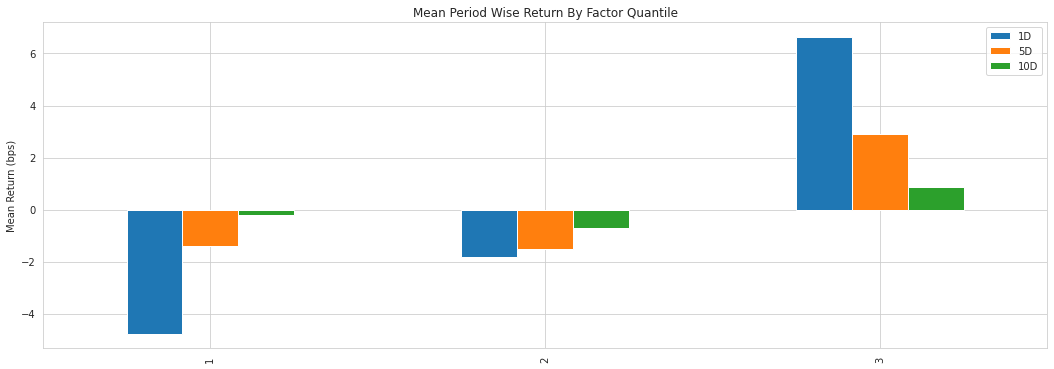

In [114]:
plotFactorQuantileBars(filtered_factor_data)

In [115]:
def plotCumulativeReturns(factor_data, p = '1D', demeaned = True, group_adjust = False):
    factor_returns = perf.factor_returns(
        factor_data, 
        demeaned = demeaned, 
        group_adjust = group_adjust)

    fig = plt.figure(figsize = (16, 8))
    p = '1D'
    title = \
        'Factor weighted LONG/SHORT portfolio cumulative returns'
    plotting.plot_cumulative_returns(
        factor_returns[p],
        period = p)
    plt.show()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:694: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,


<Figure size 1152x576 with 0 Axes>

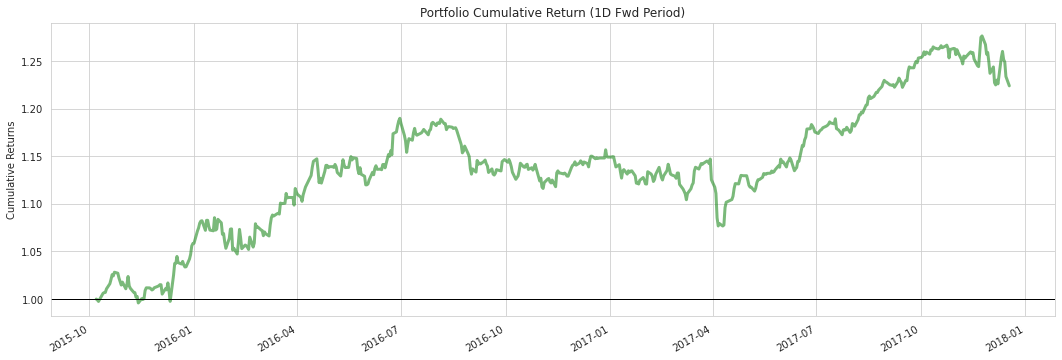

In [116]:
plotCumulativeReturns(filtered_factor_data)

In [117]:
def plotQuantileCumelativeReturns(factor_data, 
                                  p = '1D',
                                  demeaned = True,
                                  by_date = True,
                                  by_group = False,
                                  group_adjust = False):
    
    mean_quant_ret_bydate, std_quant_daily = \
            perf.mean_return_by_quantile(
                             factor_data,
                             demeaned = demeaned,
                             by_date = by_date,
                             by_group = by_group,
                             group_adjust = group_adjust)

    fig = plt.figure(figsize = (16, 8))
    cumulative_quantile_returns = \
        mean_quant_ret_bydate\
        .groupby(level = ['factor_quantile', 'date'])\
        .sum()[p]
    
    plotting.plot_cumulative_returns_by_quantile(
        cumulative_quantile_returns,
        period = p)
    plt.show()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

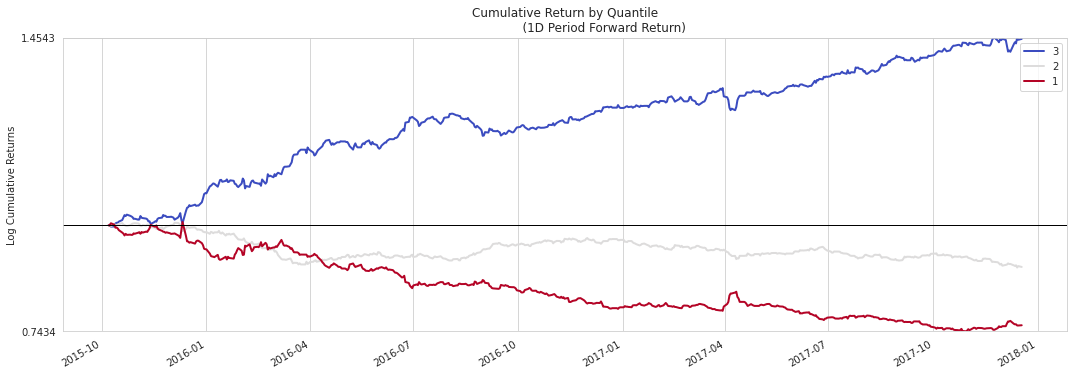

In [118]:
plotQuantileCumelativeReturns(filtered_factor_data)

In [119]:
pyfolio_input = alphalens.performance.create_pyfolio_input(filtered_factor_data, period = '1D', capital = 1000000, quantiles = [1, 3])

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:694: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,


In [120]:
returns = pyfolio_input[0]
positions = pyfolio_input[1]
benchmark = pyfolio_input[2]

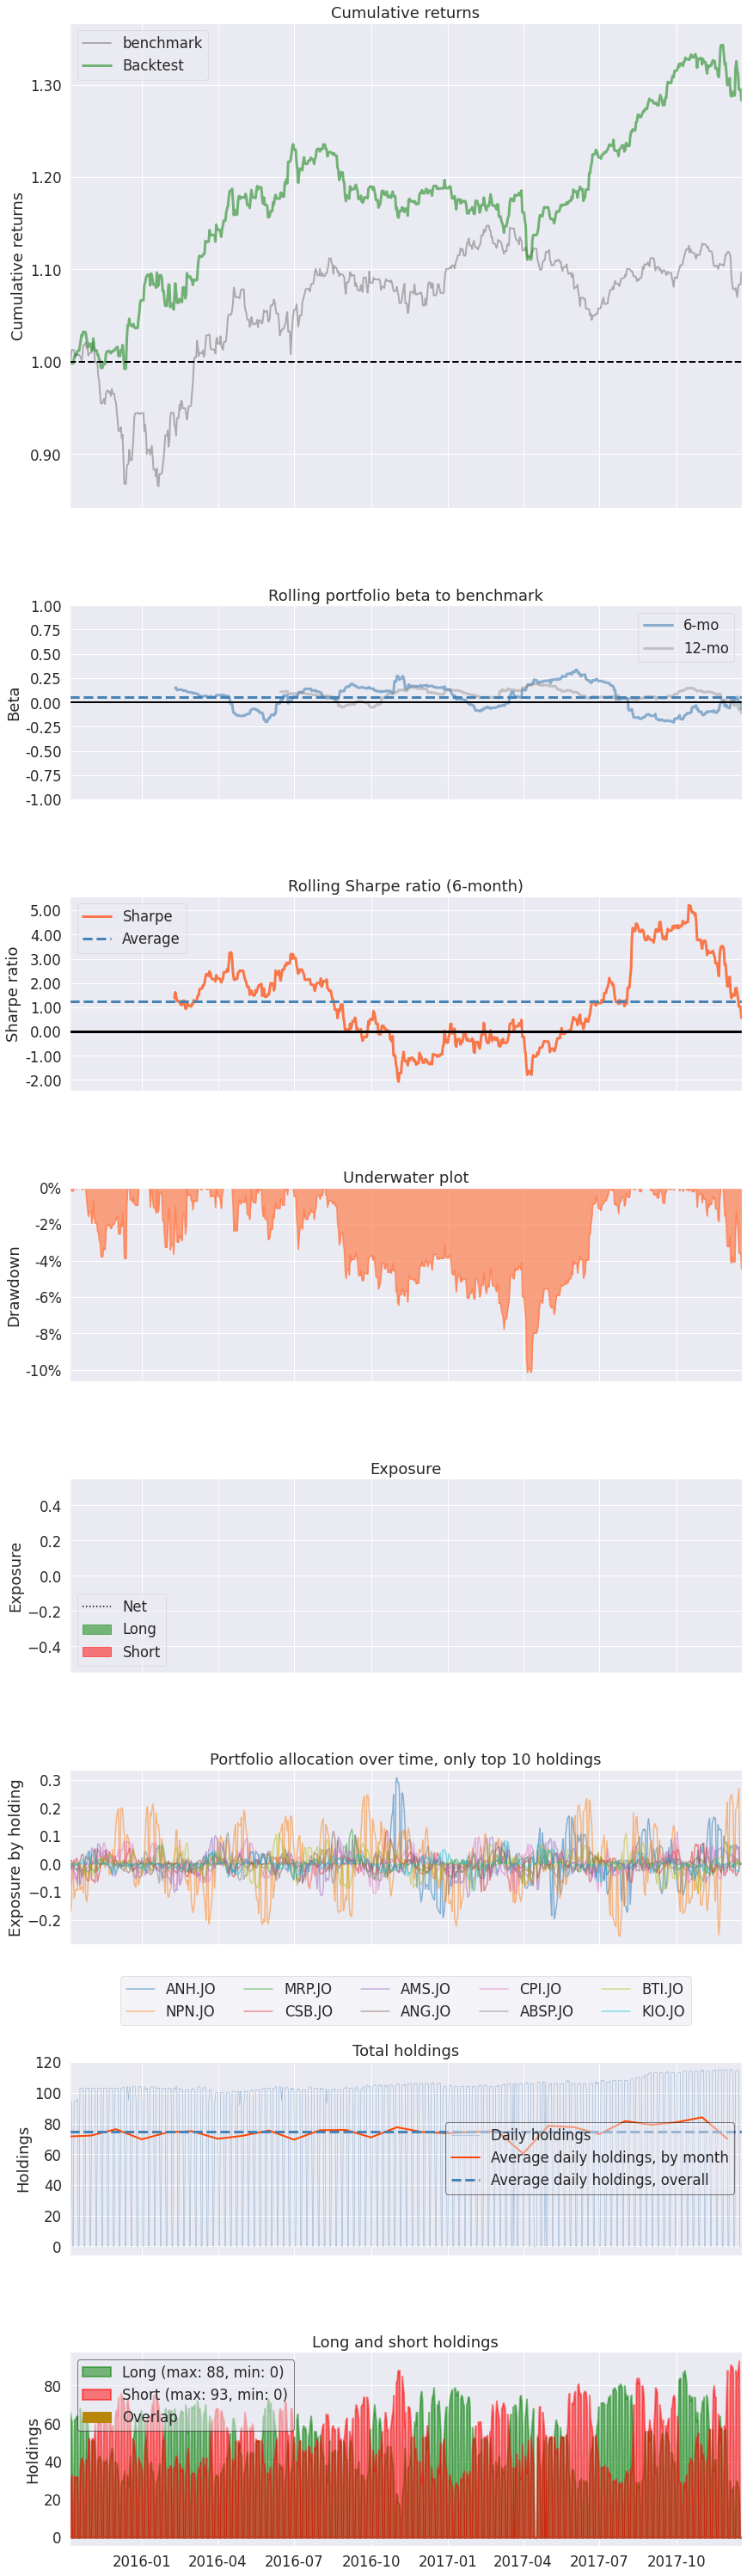

In [121]:
pyfolio.create_simple_tear_sheet(returns, positions, benchmark_rets=benchmark, )

## Feature Engineering

### Labeling (Tripple Barrier Method)

In [122]:
def barrier_touched(out_df, events):
    """
    Advances in Financial Machine Learning, Snippet 3.9, page 55, Question 3.3.

    Adjust the getBins function (Snippet 3.7) to return a 0 whenever the vertical barrier is the one touched first.

    Top horizontal barrier: 1
    Bottom horizontal barrier: -1
    Vertical barrier: 0

    :param out_df: (pd.DataFrame) Returns and target
    :param events: (pd.DataFrame) The original events data frame. Contains the pt sl multiples needed here.
    :return: (pd.DataFrame) Returns, target, and labels
    """
    store = []
    for date_time, values in out_df.iterrows():
        ret = values['ret']
        target = values['trgt']

        pt_level_reached = ret > np.log(1 + target) * events.loc[date_time, 'pt']
        sl_level_reached = ret < -np.log(1 + target) * events.loc[date_time, 'sl']

        if ret > 0.0 and pt_level_reached:
            # Top barrier reached
            store.append(1)
        elif ret < 0.0 and sl_level_reached:
            # Bottom barrier reached
            store.append(-1)
        else:
            # Vertical barrier reached
            store.append(0)

    # Save to 'bin' column and return
    out_df['bin'] = store
    return out_df

def get_bins(triple_barrier_events, close, open, at_open = True):
    """
    Advances in Financial Machine Learning, Snippet 3.7, page 51.

    Labeling for Side & Size with Meta Labels

    Compute event's outcome (including side information, if provided).
    events is a DataFrame where:

    Now the possible values for labels in out['bin'] are {0,1}, as opposed to whether to take the bet or pass,
    a purely binary prediction. When the predicted label the previous feasible values {−1,0,1}.
    The ML algorithm will be trained to decide is 1, we can use the probability of this secondary prediction
    to derive the size of the bet, where the side (sign) of the position has been set by the primary model.

    :param triple_barrier_events: (pd.DataFrame)
                -events.index is event's starttime
                -events['t1'] is event's endtime
                -events['trgt'] is event's target
                -events['side'] (optional) implies the algo's position side
                Case 1: ('side' not in events): bin in (-1,1) <-label by price action
                Case 2: ('side' in events): bin in (0,1) <-label by pnl (meta-labeling)
    :param close: (pd.Series) Close prices
    :return: (pd.DataFrame) Meta-labeled events
    """

    # 1) Align prices with their respective events
    events_ = triple_barrier_events.dropna(subset=['t1'])
    all_dates = events_.index.union(other=events_['t1'].array).drop_duplicates()
    prices = close.reindex(all_dates, method='bfill')

    # 2) Create out DataFrame
    out_df = pd.DataFrame(index=events_.index)
    # Need to take the log returns, else your results will be skewed for short positions
    if not at_open: # then at close
        out_df['ret'] = np.log(prices.loc[events_['t1'].array].array) - np.log(prices.loc[events_.index])
    else: # then at open
       
        close = close.reindex(all_dates, method='bfill')
        open = open.shift(-1).reindex(all_dates, method = 'bfill')
            
#         out_df['ret'] = (np.log(close.shift(-1)) - np.log(open.shift(-1))).loc[events_.index]
        out_df['ret'] = np.log(open.loc[events_['t1'].array].array) - np.log(open.loc[events_.index])
    out_df['trgt'] = events_['trgt']

    # Meta labeling: Events that were correct will have pos returns
    if 'side' in events_:
        out_df['ret'] = out_df['ret'] * events_['side']  # meta-labeling

    # Added code: label 0 when vertical barrier reached
    out_df = barrier_touched(out_df, triple_barrier_events)

    # Meta labeling: label incorrect events with a 0
    if 'side' in events_:
        out_df.loc[out_df['ret'] <= 0, 'bin'] = 0

    # Transform the log returns back to normal returns.
    out_df['ret'] = np.exp(out_df['ret']) - 1

    # Add the side to the output. This is useful for when a meta label model must be fit
    tb_cols = triple_barrier_events.columns
    if 'side' in tb_cols:
        out_df['side'] = triple_barrier_events['side']

    return out_df

In [123]:
def getLabels(datas,
              lookback = 5,
              num_days_ahead = 1,
              pt_sl = [1, 1],
              min_ret = 0.005,
              at_open = True):
    
    output = {}
    for symbol, data in datas.items():
        
        try:
            close = data['close']
            open = data['open']

            if len(close) > lookback: 

                daily_vol = ml.util.get_daily_vol(
                                close, 
                                lookback = lookback)
        
                if daily_vol.nunique() != 1:

                    cusum_events = ml.filters.cusum_filter(
                                        close,
                                        threshold = daily_vol)

                    data = data.reset_index()
                    data['event'] = np.where(data['Date'].isin(cusum_events), 1, 0)
                    data.set_index('Date', inplace = True)

                    vertical_barriers = ml.labeling.add_vertical_barrier(
                                            t_events = cusum_events,
                                            close = close,
                                            num_days = num_days_ahead)

                    data['vertical_barriers'] = vertical_barriers

                    triple_barrier_events = ml.labeling.get_events(
                                    close = close,
                                    t_events = cusum_events,
                                    pt_sl = pt_sl,
                                    target = daily_vol,
                                    min_ret = min_ret,
                                    vertical_barrier_times = vertical_barriers,
                                    num_threads = 1,
                                    verbose = False)

                    data = pd.concat(
                        [data, triple_barrier_events], 
                        axis = 1).drop('trgt', axis = 1)

                    labels = get_bins(
                        triple_barrier_events, close, open = open, at_open = at_open)
                    labels
                    data = pd.concat([data, labels], axis = 1)
                    data.index.name = 'date'

                    data['profit_taking'] = data['pt'].mul(data['trgt'])
                    data['stop_loss'] = data['sl'].mul(data['trgt']).mul(-1)

                    data.reset_index(inplace = True)

                    data['holding_period'] = pd.to_datetime(data['t1'])\
                        .sub(pd.to_datetime(data['date']))\
                        .map(lambda x: x.days)
                    data.drop(['trgt', 'pt', 'sl'], axis = 1, inplace = True)
                    data.set_index('date', inplace = True)

                    data.rename(columns = 
                                {'ret':'expected_return', 
                                 'bin':'label'
                                }, inplace = True) 
                    output[symbol] = data
                    
        except Exception as e:
            print(f"{symbol}: {e}")
    return output

In [124]:
data = {'MTN.JO':trainPrices['MTN.JO']}
out = getLabels(data, lookback = 14, num_days_ahead = 5, pt_sl = [1, 1], at_open = True)['MTN.JO']
out['label'].value_counts() / len(out.dropna())

 0.0    0.476190
-1.0    0.285714
 1.0    0.238095
Name: label, dtype: float64

In [125]:
cusumTrainPrices = getLabels(trainPrices, lookback = 14, num_days_ahead = 5, pt_sl = [1, 1])

In [126]:
forward_returns = pd.DataFrame()
for symbol, data in cusumTrainPrices.items():
    data = data.copy()
    out = data[['open']].shift(-1)
    out['event'] = data['event']
    out['t1'] = data['t1']
    out['t1'].fillna(method = 'ffill', inplace = True)
    out = out.reset_index()
    out = out[out['date'] <= out['t1']]
    out['open'] = out['open'].pct_change(periods = 1).shift(-1)
    out['asset'] = symbol
    out = out[out['date'] != out['t1']].set_index(['date', 'asset'])
    out.rename(columns = {'open':'1D'}, inplace = True)
    forward_returns = pd.concat([forward_returns, out])
forward_returns.sort_index(level = 'date', inplace = True)
forward_returns

1D  event         t1
date       asset                             
2015-01-06 ABG.JO  0.037071      1 2015-01-07
           ACG.JO  0.000000      1 2015-01-08
           ACT.JO  0.000000      1 2015-01-08
           ADR.JO -0.008722      1 2015-01-12
           AEG.JO  0.032942      1 2015-01-09
...                     ...    ...        ...
2017-12-28 QFH.JO  0.000000      0 2017-12-29
           SAR.JO  0.000000      1 2017-12-29
           SHG.JO  0.000000      1 2017-12-29
           SPP.JO  0.000000      0 2017-12-29
           TKG.JO  0.000000      1 2017-12-29

[160750 rows x 3 columns]

In [128]:
data = forward_returns.reset_index()
data[data['asset'] == 'ABG.JO'].iloc[:10]

date   asset        1D  event         t1
0    2015-01-06  ABG.JO  0.037071      1 2015-01-07
143  2015-01-07  ABG.JO  0.018583      1 2015-01-12
299  2015-01-08  ABG.JO -0.025059      0 2015-01-12
475  2015-01-09  ABG.JO  0.001651      0 2015-01-12
663  2015-01-12  ABG.JO  0.001593      1 2015-01-13
843  2015-01-13  ABG.JO  0.017720      1 2015-01-19
1038 2015-01-14  ABG.JO -0.027222      0 2015-01-19
1242 2015-01-15  ABG.JO  0.005763      0 2015-01-19
1449 2015-01-16  ABG.JO  0.003030      0 2015-01-19
1840 2015-01-20  ABG.JO  0.009501      1 2015-01-22

In [129]:
for symbol, data in cusumTrainPrices.items():
    
    data = data[data['event'] == 1]
    cusumTrainPrices[symbol] = data

In [130]:
data = cusumTrainPrices['WHL.JO']
data.head()

high     low    open   close     volume    adj_close  event  \
date                                                                        
2015-01-06  7641.0  7354.0  7354.0  7621.0  1173591.0  6131.731934      1   
2015-01-12  7850.0  7573.0  7752.0  7600.0  1381916.0  6114.835938      1   
2015-01-15  7895.0  7670.0  7789.0  7825.0  3981562.0  6295.867188      1   
2015-01-20  8144.0  7933.0  8000.0  8101.0  2057330.0  6517.932129      1   
2015-01-21  8494.0  8110.0  8115.0  8494.0  6485544.0  6834.132812      1   

           vertical_barriers         t1  expected_return  label  \
date                                                              
2015-01-06        2015-01-12 2015-01-08         0.058417    1.0   
2015-01-12        2015-01-19 2015-01-16         0.049342    1.0   
2015-01-15        2015-01-20 2015-01-20         0.041720    1.0   
2015-01-20        2015-01-26 2015-01-21         0.052619    1.0   
2015-01-21        2015-01-26 2015-01-26        -0.010770    0.0   

            profit_taking  stop_loss  holding_period  
date                                                  
2015-01-06       0.026059  -0.026059             2.0  
2015-01-12       0.033315  -0.033315             4.0  
2015-01-15       0.024975  -0.024975             5.0  
2015-01-20       0.025674  -0.025674             1.0  
2015-01-21       0.030994  -0.030994             5.0

In [131]:
target = pd.DataFrame()
for symbol, data in cusumTrainPrices.items():
    data = data.copy()
    data['expected_return'] = np.where(data['expected_return'].isna(), 0, data['expected_return'])
    data['holding_period'] = np.where(data['holding_period'] > 5, 1, data['holding_period'])
    data['holding_period'] = np.where(data['holding_period'].isna(), 0, data['holding_period'])
    data['label'] = np.where(data['label'].isna(), 0, data['label'])
    label = data['label']
    events = data['event']
    vv = data[['expected_return', 'holding_period']].copy()
    vv = pd.pivot(vv.reset_index(), index = 'date', columns = 'holding_period', values = 'expected_return')
    vv = pd.DataFrame(np.where(vv.isna(), 0, vv), index = vv.index, columns = vv.columns)
    out = pd.concat([vv, events, label], axis = 1)
    out['asset'] = symbol
    out = out.reset_index().set_index(['date', 'asset'])
    target = pd.concat([target, out])
target

0.0       1.0       2.0       3.0       4.0       5.0  \
date       asset                                                            
2017-10-24 4SI.JO   0.0  0.000000  0.000000 -0.087719  0.000000  0.000000   
2017-10-27 4SI.JO   0.0  0.000000  0.000000  0.000000  0.000000  0.019231   
2017-11-03 4SI.JO   0.0  0.000000  0.000000  0.000000 -0.079681  0.000000   
2017-11-07 4SI.JO   0.0 -0.099567  0.000000  0.000000  0.000000  0.000000   
2017-11-08 4SI.JO   0.0  0.000000  0.009615  0.000000  0.000000  0.000000   
...                 ...       ...       ...       ...       ...       ...   
2017-12-07 ZPLP.JO  0.0  0.000000  0.000000  0.000000  0.000000  0.012007   
2017-12-14 ZPLP.JO  0.0  0.017094  0.000000  0.000000  0.000000  0.000000   
2017-12-15 ZPLP.JO  0.0  0.000000  0.000000  0.050420  0.000000  0.000000   
2017-12-18 ZPLP.JO  0.0  0.000000  0.023840  0.000000  0.000000  0.000000   
2017-12-20 ZPLP.JO  0.0  0.000000  0.000000  0.000000  0.000000 -0.000625   

                    event  label  
date       asset                  
2017-10-24 4SI.JO       1   -1.0  
2017-10-27 4SI.JO       1    0.0  
2017-11-03 4SI.JO       1   -1.0  
2017-11-07 4SI.JO       1   -1.0  
2017-11-08 4SI.JO       1    0.0  
...                   ...    ...  
2017-12-07 ZPLP.JO      1    0.0  
2017-12-14 ZPLP.JO      1    0.0  
2017-12-15 ZPLP.JO      1    1.0  
2017-12-18 ZPLP.JO      1    0.0  
2017-12-20 ZPLP.JO      1    0.0  

[67305 rows x 8 columns]

In [132]:
target['label'] = target['label'].map({-1:1, 0:2, 1:3})
target[0].fillna(0, inplace = True)
target[1].fillna(0, inplace = True)
target[2].fillna(0, inplace = True)
target[3].fillna(0, inplace = True)
target[4].fillna(0, inplace = True)
target[5].fillna(0, inplace = True)
target.isna().sum()

0.0      0
1.0      0
2.0      0
3.0      0
4.0      0
5.0      0
event    0
label    0
dtype: int64

In [133]:
target

0.0       1.0       2.0       3.0       4.0       5.0  \
date       asset                                                            
2017-10-24 4SI.JO   0.0  0.000000  0.000000 -0.087719  0.000000  0.000000   
2017-10-27 4SI.JO   0.0  0.000000  0.000000  0.000000  0.000000  0.019231   
2017-11-03 4SI.JO   0.0  0.000000  0.000000  0.000000 -0.079681  0.000000   
2017-11-07 4SI.JO   0.0 -0.099567  0.000000  0.000000  0.000000  0.000000   
2017-11-08 4SI.JO   0.0  0.000000  0.009615  0.000000  0.000000  0.000000   
...                 ...       ...       ...       ...       ...       ...   
2017-12-07 ZPLP.JO  0.0  0.000000  0.000000  0.000000  0.000000  0.012007   
2017-12-14 ZPLP.JO  0.0  0.017094  0.000000  0.000000  0.000000  0.000000   
2017-12-15 ZPLP.JO  0.0  0.000000  0.000000  0.050420  0.000000  0.000000   
2017-12-18 ZPLP.JO  0.0  0.000000  0.023840  0.000000  0.000000  0.000000   
2017-12-20 ZPLP.JO  0.0  0.000000  0.000000  0.000000  0.000000 -0.000625   

                    event  label  
date       asset                  
2017-10-24 4SI.JO       1      1  
2017-10-27 4SI.JO       1      2  
2017-11-03 4SI.JO       1      1  
2017-11-07 4SI.JO       1      1  
2017-11-08 4SI.JO       1      2  
...                   ...    ...  
2017-12-07 ZPLP.JO      1      2  
2017-12-14 ZPLP.JO      1      2  
2017-12-15 ZPLP.JO      1      3  
2017-12-18 ZPLP.JO      1      2  
2017-12-20 ZPLP.JO      1      2  

[67305 rows x 8 columns]

In [134]:
multi_target = target.copy()#.apply(np.mean, axis = 1)
for i in [1, 2, 3, 4, 5]:
    multi_target.loc[:, f"{i}_day_ahead"] = np.where(multi_target[i] != 0, multi_target['label'], multi_target[i])
multi_target

0.0       1.0       2.0       3.0       4.0       5.0  \
date       asset                                                            
2017-10-24 4SI.JO   0.0  0.000000  0.000000 -0.087719  0.000000  0.000000   
2017-10-27 4SI.JO   0.0  0.000000  0.000000  0.000000  0.000000  0.019231   
2017-11-03 4SI.JO   0.0  0.000000  0.000000  0.000000 -0.079681  0.000000   
2017-11-07 4SI.JO   0.0 -0.099567  0.000000  0.000000  0.000000  0.000000   
2017-11-08 4SI.JO   0.0  0.000000  0.009615  0.000000  0.000000  0.000000   
...                 ...       ...       ...       ...       ...       ...   
2017-12-07 ZPLP.JO  0.0  0.000000  0.000000  0.000000  0.000000  0.012007   
2017-12-14 ZPLP.JO  0.0  0.017094  0.000000  0.000000  0.000000  0.000000   
2017-12-15 ZPLP.JO  0.0  0.000000  0.000000  0.050420  0.000000  0.000000   
2017-12-18 ZPLP.JO  0.0  0.000000  0.023840  0.000000  0.000000  0.000000   
2017-12-20 ZPLP.JO  0.0  0.000000  0.000000  0.000000  0.000000 -0.000625   

                    event  label  1_day_ahead  2_day_ahead  3_day_ahead  \
date       asset                                                          
2017-10-24 4SI.JO       1      1          0.0          0.0          1.0   
2017-10-27 4SI.JO       1      2          0.0          0.0          0.0   
2017-11-03 4SI.JO       1      1          0.0          0.0          0.0   
2017-11-07 4SI.JO       1      1          1.0          0.0          0.0   
2017-11-08 4SI.JO       1      2          0.0          2.0          0.0   
...                   ...    ...          ...          ...          ...   
2017-12-07 ZPLP.JO      1      2          0.0          0.0          0.0   
2017-12-14 ZPLP.JO      1      2          2.0          0.0          0.0   
2017-12-15 ZPLP.JO      1      3          0.0          0.0          3.0   
2017-12-18 ZPLP.JO      1      2          0.0          2.0          0.0   
2017-12-20 ZPLP.JO      1      2          0.0          0.0          0.0   

                    4_day_ahead  5_day_ahead  
date       asset                              
2017-10-24 4SI.JO           0.0          0.0  
2017-10-27 4SI.JO           0.0          2.0  
2017-11-03 4SI.JO           1.0          0.0  
2017-11-07 4SI.JO           0.0          0.0  
2017-11-08 4SI.JO           0.0          0.0  
...                         ...          ...  
2017-12-07 ZPLP.JO          0.0          2.0  
2017-12-14 ZPLP.JO          0.0          0.0  
2017-12-15 ZPLP.JO          0.0          0.0  
2017-12-18 ZPLP.JO          0.0          0.0  
2017-12-20 ZPLP.JO          0.0          2.0  

[67305 rows x 13 columns]

In [135]:
multi_target = multi_target.iloc[:, 8:]
multi_target

1_day_ahead  2_day_ahead  3_day_ahead  4_day_ahead  \
date       asset                                                         
2017-10-24 4SI.JO           0.0          0.0          1.0          0.0   
2017-10-27 4SI.JO           0.0          0.0          0.0          0.0   
2017-11-03 4SI.JO           0.0          0.0          0.0          1.0   
2017-11-07 4SI.JO           1.0          0.0          0.0          0.0   
2017-11-08 4SI.JO           0.0          2.0          0.0          0.0   
...                         ...          ...          ...          ...   
2017-12-07 ZPLP.JO          0.0          0.0          0.0          0.0   
2017-12-14 ZPLP.JO          2.0          0.0          0.0          0.0   
2017-12-15 ZPLP.JO          0.0          0.0          3.0          0.0   
2017-12-18 ZPLP.JO          0.0          2.0          0.0          0.0   
2017-12-20 ZPLP.JO          0.0          0.0          0.0          0.0   

                    5_day_ahead  
date       asset                 
2017-10-24 4SI.JO           0.0  
2017-10-27 4SI.JO           2.0  
2017-11-03 4SI.JO           0.0  
2017-11-07 4SI.JO           0.0  
2017-11-08 4SI.JO           0.0  
...                         ...  
2017-12-07 ZPLP.JO          2.0  
2017-12-14 ZPLP.JO          0.0  
2017-12-15 ZPLP.JO          0.0  
2017-12-18 ZPLP.JO          0.0  
2017-12-20 ZPLP.JO          2.0  

[67305 rows x 5 columns]

In [136]:
label = pd.melt(multi_target.reset_index(), id_vars = ['date', 'asset'], var_name = 'day', value_name='label')
label = label.set_index(['date', 'asset']).sort_index(level = 'date')
label = label[label['label'].isin([1, 2, 3])]
label['label'] = label['label'].map({1:-1, 2:0, 3:1})#['label']
# label = label['label']
label

day  label
date       asset                     
2015-01-06 ABG.JO  1_day_ahead      1
           ACG.JO  2_day_ahead      1
           ACT.JO  2_day_ahead      0
           ADR.JO  1_day_ahead      0
           AEG.JO  3_day_ahead     -1
...                        ...    ...
2017-12-27 HLM.JO  1_day_ahead      1
           JSC.JO  1_day_ahead     -1
           MCZ.JO  1_day_ahead      0
           RBX.JO  1_day_ahead      1
           TWR.JO  1_day_ahead      1

[60419 rows x 2 columns]

In [137]:
target['label'] = target['label'].map({1:-1, 2:0, 3:1})

### Factor Library

In [138]:
# data = trainPrices['GML.JO']
# open = data['open']
# high = data['high']
# low = data['low']
# close = data['close']
# volume = data['volume']

In [139]:
## Momentum indicators

# awesome oscillator
def ao(open = None, high = None, low = None, close = None, volume = None,
       s = 3, len = 9):
    ao = ta.momentum.AwesomeOscillatorIndicator(
        high, low, s = s, len = len).ao() 
    return ao

# kama indicator, normalised
def kamaCrossOver(open = None, high = None, low = None, close = None, volume = None,
                  n = 10, pow1 = 2, pow2 = 30):
    
    """
    Try pow1 = 2 to 5 for smoothing the indicator even further, may improve result
    """
    
    kamashort = ta.momentum.KAMAIndicator(close, n = n, pow1 = pow1, pow2 = pow2).kama()
    cross_over = close.sub(kamashort).div(close) * -1
    cross_over.name = 'kama_cross_over'
    return cross_over
    
# roc indicator
def rocIndicator(open = None, high = None, low = None, close = None, volume = None,
                n = 4):
    roc = ta.momentum.ROCIndicator(close, n = n).roc() * -1
    return roc

# reletive strength index
def rsi(open = open, high = None, low = None, close = None, volume = None,
       n = 5):
    rsi = ta.momentum.RSIIndicator(close, n = n).rsi()
    rsi.name = 'rsi'
    return rsi

def tsi(open = None, high = None, low = None, close = None, volume = None,
       r = 9, s = 5):
    tsi = ta.momentum.TSIIndicator(close, r = r, s = s).tsi() 
    tsi.name = 'tsi'
    return tsi

# stochastic oscilator
def stochOscillator(open = open, high = None, low = None, close = None, volume = None,
                    n = 14, m = 3, slow = None):
    
    lowest_low = low.rolling(window = n).min()
    highest_high = high.rolling(window = n).max()
    
    percentK = (close - lowest_low)/(highest_high - lowest_low) * 100
    percentD = ta.trend.sma(percentK, periods = m)
    signal = percentD.sub(percentK)
    signal.name = 'fast_stoch_osc'
    
    if not slow:
        return signal
    elif slow:
        slow_percentK = ta.trend.sma(percentK, periods = m)
        slow_percentD = ta.trend.sma(slow_percentK, periods = m)
        slow_signal = slow_percentD.sub(slow_percentK)
        slow_signal.name = 'slow_stoch_osc'
        return slow_signal

def uo(open = None, high = None, low = None, close = None, volume = None,
       s = 7, m = 14, len = 28, ws = 4, wm = 2, wl = 1):
    uo = ta.momentum.UltimateOscillator(
        high, low, close, s = s, m = m, len = len, ws = ws, wm = wm, wl = wl).uo() * -1
    return uo

def williamsR(open = None, high = None, low = None, close = None, volume = None,
       lbp = 14):
    wr = ta.momentum.WilliamsRIndicator(
        high, low, close, lbp = lbp).wr() * -1
    return wr

In [140]:
## Volatility Indicators
# bbands
def bbands(open = None, high = None, low = None, close = None, volume = None,
             n = 20, ndev = 2):
    bbands = ta.volatility\
        .BollingerBands(close, n = n, ndev = ndev)
    perc_b = bbands.bollinger_pband()
    hband_ind = bbands.bollinger_hband_indicator()
    lband_ind = bbands.bollinger_lband_indicator()
    bollinger_wband = bbands.bollinger_wband()
    
    return pd.concat(
        [hband_ind, lband_ind, perc_b, bollinger_wband], #
        axis = 1)

# Average true range
def atr(open = None, high = None, low = None, close = None, volume = None,
             n = 14):
    atr = ta.volatility.AverageTrueRange(high, low, close, n = n)
    atr = atr.average_true_range().div(close).mul(100)
    atr.name = 'atr'
    return atr

# Dochian channel
def dc(open = None, high = None, low = None, close = None, volume = None,
             n = 20):
    dc = ta.volatility.DonchianChannel(high, low, close, n = n)
    perc_b = dc.donchian_channel_pband()
    band_width = dc.donchian_channel_wband()

    return pd.concat([band_width, perc_b], axis = 1)

# Keltner Channel
def kc(open = None, high = None, low = None, close = None, volume = None,
             n = 20, n_atr = 10):
    kc = ta.volatility.KeltnerChannel(high, low, close, n = n, n_atr = n_atr)
    perc_b = kc.keltner_channel_pband()
    hband_ind = kc.keltner_channel_hband_indicator()
    lband_ind = kc.keltner_channel_lband_indicator()
    kc_wband = kc.keltner_channel_wband()
    
    return pd.concat(
        [hband_ind, lband_ind, perc_b, kc_wband], #
        axis = 1)

In [141]:
## Trend Indicators
def macdDiff(open = None, high = None, low = None, close = None, volume = None,
            n_slow = 26, n_fast = 12, n_sign = 9):
    Macd = ta.trend.MACD(
        close, n_slow = n_slow, n_fast = n_fast, n_sign = n_sign)
    
    macd = Macd.macd()
    macd_signal = Macd.macd_signal()
    macd_diff = Macd.macd_diff() 
    return macd_diff


In [142]:
## Volume Indicator
def mfi(open = None, high = None, low = None, close = None, volume = None,
       n = 12):
    mfi = ta.volume.MFIIndicator(
            high, low, close, volume, n = n)\
            .money_flow_index()
    mfi.name = 'mfi'
    return mfi

def adi(open = None, high = None, low = None, close = None, volume = None):
    adii = ta.volume.AccDistIndexIndicator(high, low, close, volume)
    adi = adii.acc_dist_index()

    adi[np.isinf(adi)] = np.nan
    adi.fillna(method = 'ffill', inplace = True)
    
    return adi

def cmf(open = None, high = None, low = None, close = None, volume = None):
    cmf = ta.volume.ChaikinMoneyFlowIndicator(high, low, close, volume)
    cmf = cmf.chaikin_money_flow()
    
    return cmf

def eom(open = None, high = None, low = None, close = None, volume = None,
       n = 14):
    eom = ta.volume.EaseOfMovementIndicator(high, low, volume, n = n).ease_of_movement()
    sma_eom = ta.volume.EaseOfMovementIndicator(high, low, volume, n = n).sma_ease_of_movement()
    
    return pd.concat([eom, sma_eom], axis = 1)

def fii(open = None, high = None, low = None, close = None, volume = None,
        n = 13):
    fii = ta.volume.ForceIndexIndicator(close, volume, n = n).force_index()
    return fii

def nvi(open = None, high = None, low = None, close = None, volume = None):
    nvi = ta.volume.NegativeVolumeIndexIndicator(close, volume).negative_volume_index()
    return nvi

def obv(open = None, high = None, low = None, close = None, volume = None):
    obv = ta.volume.OnBalanceVolumeIndicator(close, volume).on_balance_volume()
    return obv

def vpti(open = None, high = None, low = None, close = None, volume = None):
    vpti = ta.volume.VolumePriceTrendIndicator(close, volume).volume_price_trend()
    return vpti

def vwap(open = None, high = None, low = None, close = None, volume = None,
         n = 14):
    vwap = ta.volume.VolumeWeightedAveragePrice(high, low, close, volume, n = n)\
            .volume_weighted_average_price()
    return vwap

def getVolumeOsc(open = None, high = None, low = None, close = None, volume = None,
                periods = 20):
    vol_sma = ta.trend.ema(volume, periods = periods)
    vol_sma.name = 'volume_oscillator20'
    return vol_sma

In [143]:
def momentum(open = None, high = None, low = None, close = None, volume = None,
             lags = [4, 7, 10, 20]):
    mom = pd.DataFrame()
    for i in lags:
        out = close.shift(2) / close.shift(i) - 1
        out.name = f"mom_2_{i}"
        mom = pd.concat([mom, out], axis = 1)
    return mom

In [144]:
def nDifference(open = None, high = None, low = None, close = None, volume = None,
             lags = range(0, 10)):
    diffs = pd.DataFrame()
    for i in lags:
        out = close.shift(i).diff()
        out.name = f"close_diff_{i}"
        diffs = pd.concat([diffs, out], axis = 1)
    return diffs * -1

In [145]:
def addGroupingFactor(factor_data, 
                      group_data):

    _groups = group_data['factor_quantile']
    _groups.name = 'group'
    factor_data_w_group = pd.concat([factor_data, _groups], axis = 1).dropna()
    return factor_data_w_group

def getGroupingIndicator(factor, forward_returns, num_groups):
    
    factor_name = factor.columns[0]
    factor = alphalens.utils.get_clean_factor(
        factor.rename(columns = {factor_name:'factor'}),
        forward_returns = forward_returns,
        quantiles = num_groups)
    
    _groups = factor['factor_quantile']
    _groups.name = f'{factor_name}_group'
    return _groups

In [146]:
# for symbol, data in trainPrices.items():
#     data.index.name = 'date'
#     trainPrices[symbol] = data

In [147]:
# ind_data = getIndicator(
#     cusumTrainPrices, 
#     nDifference,
#     trailing_volume_n = 20)
# ind_data = ind_data.unstack().asfreq('C').stack()
# ind_data

In [148]:
# factor = ind_data.rename(columns = {'close_diff_0':'factor'})
# _factor_data = alphalens.utils.get_clean_factor(factor[['factor']], forward_returns=forward_returns, max_loss = .9)
# plotFactorQuantileBars(_factor_data)
# plotCumulativeReturns(_factor_data)

### Moving Average Convergence Divergence and the impact of traded volume

In [149]:
trailing_volume_window = 20

In [150]:
forward_returns = pd.concat(
    [
        target[[0, 1, 2, 3, 4, 5]][target['label'] == -1].apply(np.min, axis = 1),
        target[[0, 1, 2, 3, 4, 5]][target['label'] == 1].apply(np.max, axis = 1),
        target[[0, 1, 2, 3, 4, 5]][target['label'] == 0].apply(np.min, axis = 1)
    ]
)
forward_returns.name = '1D'
forward_returns = forward_returns.reset_index().sort_values(['date', 'asset']).set_index(['date', 'asset'])
forward_returns

1D
date       asset            
2015-01-06 ABG.JO   0.037071
           ABSP.JO  0.000000
           ACE.JO   0.000000
           ACG.JO   0.163399
           ACL.JO   0.000000
...                      ...
2017-12-29 TTO.JO   0.000000
           VOD.JO   0.000000
           WHL.JO   0.000000
           WSL.JO   0.000000
           ZED.JO   0.000000

[67305 rows x 1 columns]

In [151]:
macd_data = getIndicator(
    cusumTrainPrices,
    macdDiff, n_slow = 6, n_fast = 4, n_sign = 3,
    trailing_volume_n = 20)
macd_data = macd_data.unstack().asfreq('C').stack()
macd_data

MACD_diff_4_6
date       symbol               
2015-02-27 TON.JO     -50.655337
2015-03-02 FFB.JO     -12.165976
           TON.JO     -64.765255
2015-03-04 FFB.JO      -5.228593
           MTN.JO      -9.869205
...                          ...
2017-12-29 TRU.JO       2.424399
           TSG.JO       4.651388
           VOD.JO      17.674006
           WHL.JO      25.698779
           ZED.JO       2.565767

[38628 rows x 1 columns]

In [152]:
factor = macd_data.rename(columns = {'MACD_diff_4_6':'factor'})
macd_factor_data = alphalens.utils.get_clean_factor(factor, forward_returns=forward_returns, quantiles = 3)
macd_factor_data

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D     factor  factor_quantile
date       asset                                       
2015-03-02 FFB.JO  0.044741 -12.165976              3.0
           TON.JO  0.074830 -64.765255              1.0
2015-03-04 FFB.JO  0.046660  -5.228593              3.0
           MTN.JO  0.042597  -9.869205              1.0
2015-03-05 MTN.JO -0.010282  70.291454              3.0
...                     ...        ...              ...
2017-12-29 TRU.JO  0.000000   2.424399              1.0
           TSG.JO  0.000000   4.651388              2.0
           VOD.JO  0.000000  17.674006              3.0
           WHL.JO  0.000000  25.698779              3.0
           ZED.JO  0.000000   2.565767              1.0

[38626 rows x 3 columns]

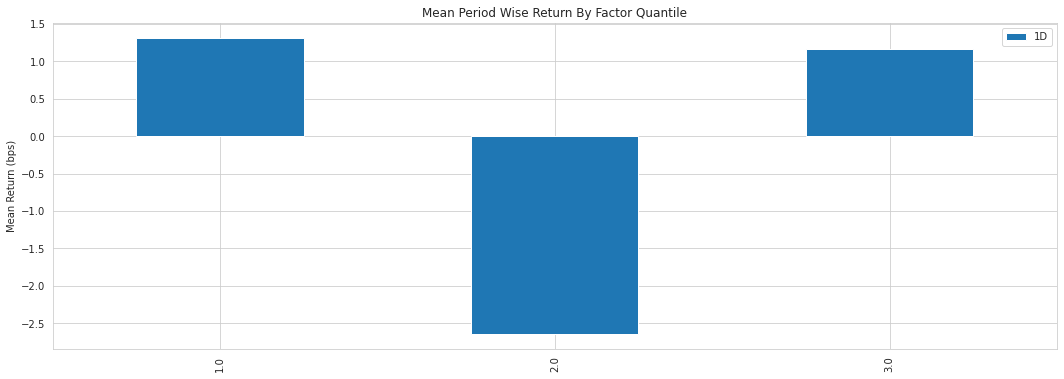

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

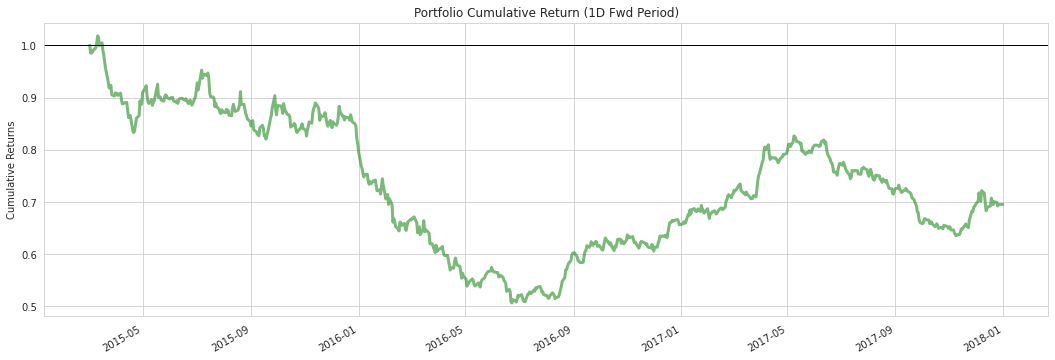

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

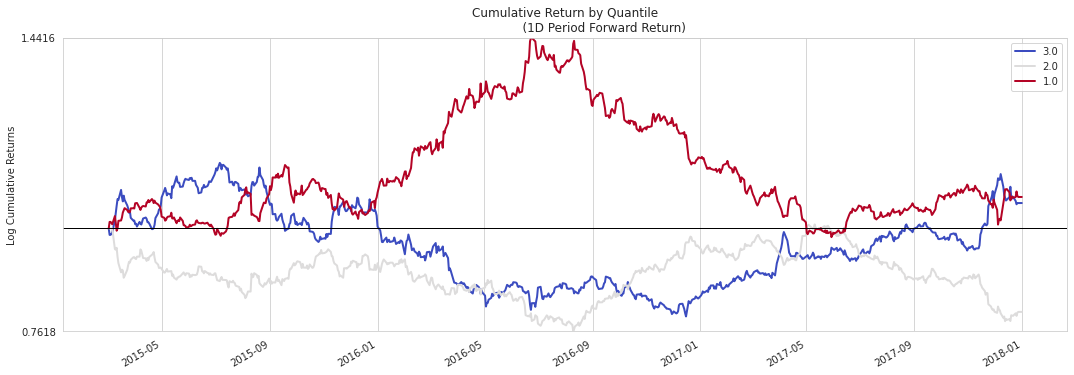

In [153]:
plotFactorQuantileBars(macd_factor_data)

plotCumulativeReturns(macd_factor_data[macd_factor_data['factor_quantile'].isin([1, 3])])

plotQuantileCumelativeReturns(macd_factor_data)

In [180]:
train = pd.concat([macd_data, target[['label']]], axis = 1).dropna()
X = train[['MACD_diff_4_6']]
y = train['label']

In [181]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV

In [182]:
def modelFit(clf, X, y, cv):

    predictions = pd.DataFrame()
    probabilities = pd.DataFrame()
    ts = TimeSeriesSplit(n_splits = cv) # , max_train_size=320
    for train_index, test_index in ts.split(X.unstack()):

        train_X = X.unstack().iloc[train_index, ].stack()
        train_y = y.unstack().iloc[train_index].stack()

        test_X = X.unstack().iloc[test_index, ].stack()
        test_y = y.unstack().iloc[test_index].stack()

        target_counts = train_y.value_counts()
        positive_counts = target_counts[1]
        neutral_counts = target_counts[0]
        negative_counts = target_counts[-1]

        out = pd.DataFrame()
        for label_counts in ['positive_counts', 'negative_counts']:

            if label_counts == 'positive_counts':
                minority_mask = train_y == 1
                majority_mask = train_y == 0

            if label_counts == 'negative_counts':
                minority_mask = train_y == -1
                majority_mask = train_y == 0


            minority_df = train_X[minority_mask].copy()
            minority_df['label'] = train_y[minority_mask]

            majority_df = train_X[majority_mask].copy()
            majority_df['label'] = train_y[majority_mask]

            upsampled_minority_df = resample(
                minority_df, 
                replace = True, 
                n_samples = len(majority_df), 
                random_state = 42)

            out = pd.concat(
                [out, upsampled_minority_df])

        upsampled_df = pd.concat(
            [majority_df, out])

        upsampled_train_X = upsampled_df.drop(
            'label', axis = 1)
        upsampled_y = upsampled_df['label']

        scaler = StandardScaler()
        upsampled_train_X = pd.DataFrame(scaler.fit_transform(upsampled_train_X), 
                                           index = upsampled_train_X.index,
                                           columns = upsampled_train_X.columns)
        test_X = pd.DataFrame(scaler.transform(test_X),
                             index = test_X.index,
                             columns = test_X.columns)
        
        model = clf
        model.fit(
            upsampled_train_X, 
            upsampled_y)

        cal_model = CalibratedClassifierCV(model, cv = 'prefit')
        cal_model.fit(upsampled_train_X, upsampled_y)
        
        probs = pd.DataFrame(
            cal_model.predict_proba(test_X), 
            columns = cal_model.classes_, 
            index = test_X.index)

        probabilities = pd.concat(
            [probabilities, probs])
        
        preds = pd.DataFrame(
            model.predict(test_X), 
            columns = ['predictions'], 
            index = test_X.index)
        preds['actual'] = test_y

        predictions = pd.concat(
            [predictions, preds])
        print('DONE!!!!!!!!!!!!!!!!!!!!!')
    return predictions, probabilities

In [183]:
samples = y.value_counts()
samples

 0    19746
-1     9505
 1     9377
Name: label, dtype: int64

In [184]:
class_weight = {
    0: ((samples[0] / samples[0]) * 1), 
    1: ((samples[0] / samples[1]) * 1), # 2
    -1: ((samples[0] / samples[-1]) * 1) # 1.7
}
class_weight

{0: 1.0, 1: 2.1057907646368776, -1: 2.0774329300368226}

In [185]:
clf = LogisticRegression(random_state=42)
# clf = LGBMClassifier(class_weight = class_weight, random_state=42) #
predictions, probabilities = modelFit(clf, X, y, cv = 20)

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!
DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


In [186]:
print(classification_report(predictions['actual'], predictions['predictions']))

              precision    recall  f1-score   support

        -1.0       0.25      0.24      0.25      9315
         0.0       0.53      0.35      0.42     19243
         1.0       0.25      0.44      0.31      9121

    accuracy                           0.34     37679
   macro avg       0.34      0.34      0.33     37679
weighted avg       0.39      0.34      0.35     37679



In [187]:
factor_quantile = predictions['predictions'].map({-1:1, 0:2, 1:3})
factor_quantile.name = 'factor_quantile'
factor_quantile

2015-04-21  ABG.JO     3
            ABSP.JO    1
            ACL.JO     3
            ADI.JO     2
            AEG.JO     3
                      ..
2017-12-29  TRU.JO     2
            TSG.JO     2
            VOD.JO     2
            WHL.JO     2
            ZED.JO     2
Name: factor_quantile, Length: 37679, dtype: int64

In [188]:
probs = probabilities.loc[:, 1]
probs.name = 'factor'
factor = pd.DataFrame(probs) 
factor

factor
2015-04-21 ABG.JO   0.349728
           ABSP.JO  0.101146
           ACL.JO   0.338313
           ADI.JO   0.333717
           AEG.JO   0.336248
...                      ...
2017-12-29 TRU.JO   0.333138
           TSG.JO   0.332965
           VOD.JO   0.331950
           WHL.JO   0.331324
           ZED.JO   0.333127

[37679 rows x 1 columns]

In [189]:
# factor_quantile_true = predictions['actual']
# factor_quantile_true.name = 'factor_quantile'
clf_factor_data = pd.concat([forward_returns, factor, factor_quantile], axis = 1).dropna()
clf_factor_data.index.set_names(['date', 'asset'], inplace = True)
clf_factor_data

1D    factor  factor_quantile
date       asset                                       
2015-04-21 ABG.JO  -0.012129  0.349728              3.0
           ABSP.JO  0.000000  0.101146              1.0
           ACL.JO   0.000000  0.338313              3.0
           ADI.JO   0.048218  0.333717              2.0
           AEG.JO  -0.047403  0.336248              3.0
...                      ...       ...              ...
2017-12-29 TRU.JO   0.000000  0.333138              2.0
           TSG.JO   0.000000  0.332965              2.0
           VOD.JO   0.000000  0.331950              2.0
           WHL.JO   0.000000  0.331324              2.0
           ZED.JO   0.000000  0.333127              2.0

[37679 rows x 3 columns]

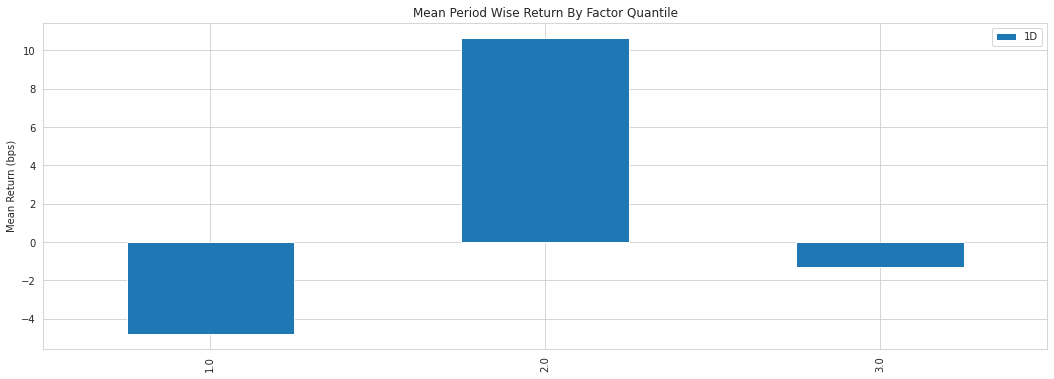

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

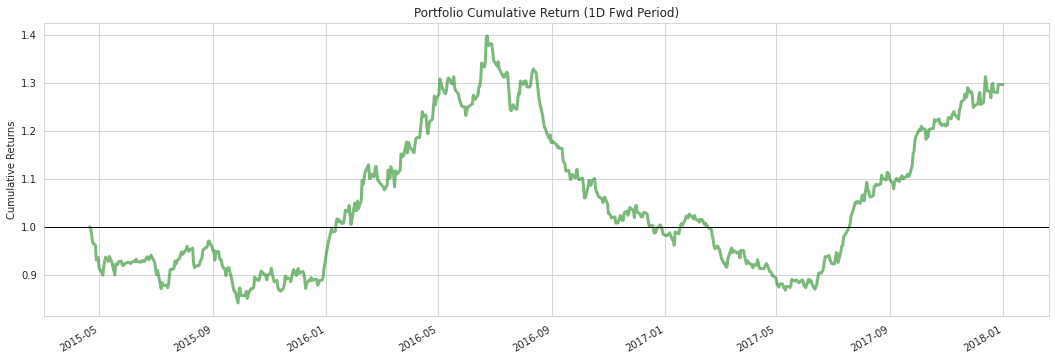

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

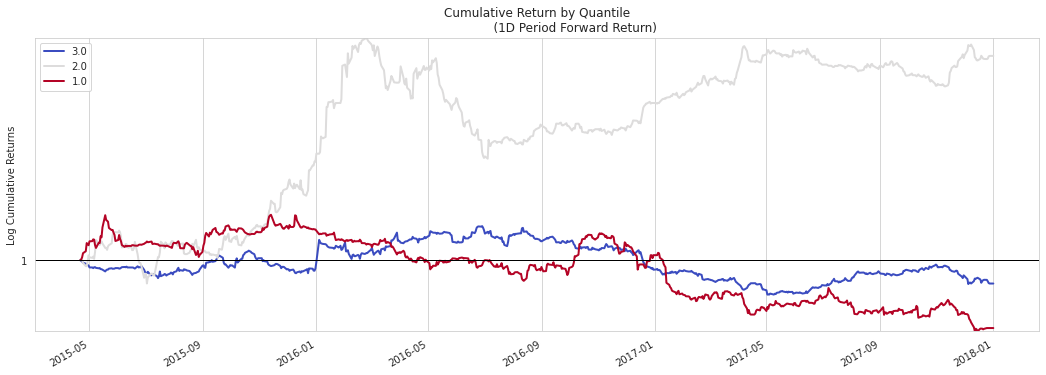

In [190]:
plotFactorQuantileBars(clf_factor_data)

plotCumulativeReturns(clf_factor_data[clf_factor_data['factor_quantile'].isin([1, 3])])

plotQuantileCumelativeReturns(clf_factor_data)

In [191]:
volume_osc_data = getIndicator(
    cusumTrainPrices, 
    getVolumeOsc, 
    trailing_volume_n = trailing_volume_window)

In [192]:
factor = volume_osc_data.rename(columns = {'volume_oscillator20':'factor'})
volume_factor_data = alphalens.utils.get_clean_factor(factor, forward_returns=forward_returns, quantiles = 3)
volume_factor_data

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        factor  factor_quantile
date       asset                                          
2015-03-02 FFB.JO  0.044741  3.890543e+05              3.0
           TON.JO  0.074830  1.799140e+05              1.0
2015-03-04 FFB.JO  0.046660  3.631083e+05              1.0
           MTN.JO  0.042597  6.786474e+06              3.0
2015-03-05 MTN.JO -0.010282  6.920427e+06              3.0
...                     ...           ...              ...
2017-12-29 TRU.JO  0.000000  3.000177e+06              3.0
           TSG.JO  0.000000  3.016452e+06              3.0
           VOD.JO  0.000000  3.732668e+06              3.0
           WHL.JO  0.000000  5.618341e+06              3.0
           ZED.JO  0.000000  2.960111e+06              3.0

[38626 rows x 3 columns]

In [193]:
macd_factor_data = addGroupingFactor(macd_factor_data, volume_factor_data)
macd_factor_data

1D     factor  factor_quantile  group
date       asset                                              
2015-03-02 FFB.JO  0.044741 -12.165976              3.0    3.0
           TON.JO  0.074830 -64.765255              1.0    1.0
2015-03-04 FFB.JO  0.046660  -5.228593              3.0    1.0
           MTN.JO  0.042597  -9.869205              1.0    3.0
2015-03-05 MTN.JO -0.010282  70.291454              3.0    3.0
...                     ...        ...              ...    ...
2017-12-29 TRU.JO  0.000000   2.424399              1.0    3.0
           TSG.JO  0.000000   4.651388              2.0    3.0
           VOD.JO  0.000000  17.674006              3.0    3.0
           WHL.JO  0.000000  25.698779              3.0    3.0
           ZED.JO  0.000000   2.565767              1.0    3.0

[38626 rows x 4 columns]

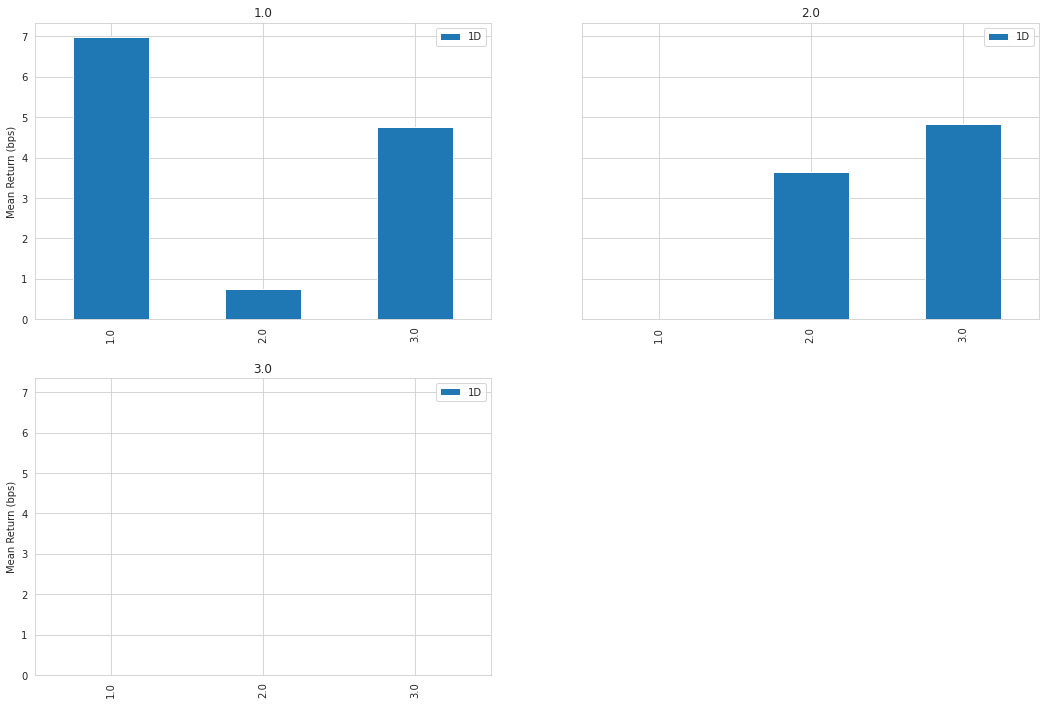

In [194]:
plotFactorQuantileBars(macd_factor_data, by_group = True, group_adjust = False)

In [195]:
volume_groups = getGroupingIndicator(factor = volume_osc_data, forward_returns = forward_returns, num_groups = 3)
volume_groups

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


date        asset 
2015-03-02  FFB.JO    3.0
            TON.JO    1.0
2015-03-04  FFB.JO    1.0
            MTN.JO    3.0
2015-03-05  MTN.JO    3.0
                     ... 
2017-12-29  TRU.JO    3.0
            TSG.JO    3.0
            VOD.JO    3.0
            WHL.JO    3.0
            ZED.JO    3.0
Name: volume_oscillator20_group, Length: 38626, dtype: float64

In [196]:
train = pd.concat([macd_data, volume_groups, target[['label']]], axis = 1).dropna()
X = train.iloc[:, :-1]
y = train['label']
X

MACD_diff_4_6  volume_oscillator20_group
2015-03-02 FFB.JO     -12.165976                        3.0
           TON.JO     -64.765255                        1.0
2015-03-04 FFB.JO      -5.228593                        1.0
           MTN.JO      -9.869205                        3.0
2015-03-05 MTN.JO      70.291454                        3.0
...                          ...                        ...
2017-12-29 TRU.JO       2.424399                        3.0
           TSG.JO       4.651388                        3.0
           VOD.JO      17.674006                        3.0
           WHL.JO      25.698779                        3.0
           ZED.JO       2.565767                        3.0

[38626 rows x 2 columns]

In [197]:
clf = LogisticRegression(random_state=42)
# clf = LGBMClassifier(class_weight = class_weight, random_state=42) #
predictions, probabilities = modelFit(clf, X, y, cv = 20)

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!
DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


In [198]:
print(classification_report(predictions['actual'], predictions['predictions']))

              precision    recall  f1-score   support

        -1.0       0.25      0.41      0.31      9088
         0.0       0.53      0.31      0.39     18744
         1.0       0.25      0.30      0.27      8885

    accuracy                           0.33     36717
   macro avg       0.34      0.34      0.32     36717
weighted avg       0.39      0.33      0.34     36717



In [199]:
factor_quantile = predictions['predictions'].map({-1:1, 0:2, 1:3})
factor_quantile.name = 'factor_quantile'
factor_quantile

2015-05-18  ACT.JO    3
            ADI.JO    3
            ADR.JO    3
            AEG.JO    1
            AFE.JO    3
                     ..
2017-12-29  TRU.JO    1
            TSG.JO    1
            VOD.JO    1
            WHL.JO    1
            ZED.JO    1
Name: factor_quantile, Length: 36717, dtype: int64

In [200]:
probs = probabilities.loc[:, 1] 
probs.name = 'factor'
factor = pd.DataFrame(probs) 
factor

factor
2015-05-18 ACT.JO  0.351933
           ADI.JO  0.353308
           ADR.JO  0.352300
           AEG.JO  0.315661
           AFE.JO  0.376335
...                     ...
2017-12-29 TRU.JO  0.332276
           TSG.JO  0.332047
           VOD.JO  0.330711
           WHL.JO  0.329887
           ZED.JO  0.332261

[36717 rows x 1 columns]

In [201]:
# factor_quantile_true = predictions['actual']
# factor_quantile_true.name = 'factor_quantile'
clf_factor_data = pd.concat([forward_returns, factor, factor_quantile], axis = 1).dropna()
clf_factor_data.index.set_names(['date', 'asset'], inplace = True)
clf_factor_data

1D    factor  factor_quantile
date       asset                                      
2015-05-18 ACT.JO  0.000000  0.351933              3.0
           ADI.JO -0.033333  0.353308              3.0
           ADR.JO  0.014876  0.352300              3.0
           AEG.JO -0.044049  0.315661              1.0
           AFE.JO  0.019605  0.376335              3.0
...                     ...       ...              ...
2017-12-29 TRU.JO  0.000000  0.332276              1.0
           TSG.JO  0.000000  0.332047              1.0
           VOD.JO  0.000000  0.330711              1.0
           WHL.JO  0.000000  0.329887              1.0
           ZED.JO  0.000000  0.332261              1.0

[36717 rows x 3 columns]

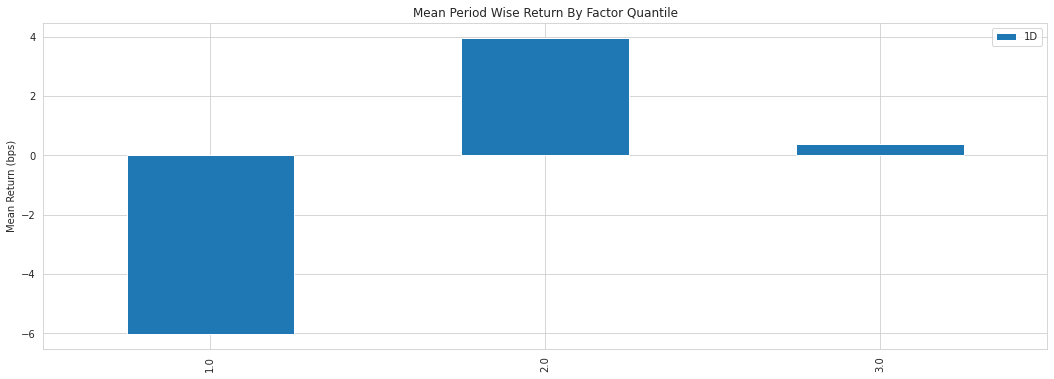

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

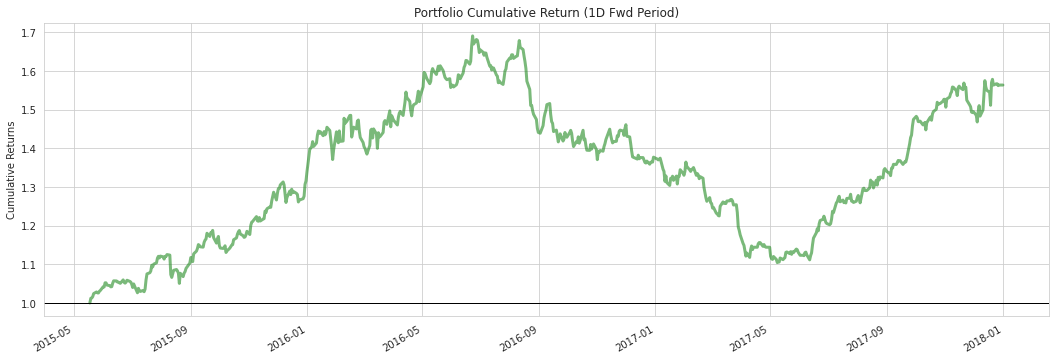

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

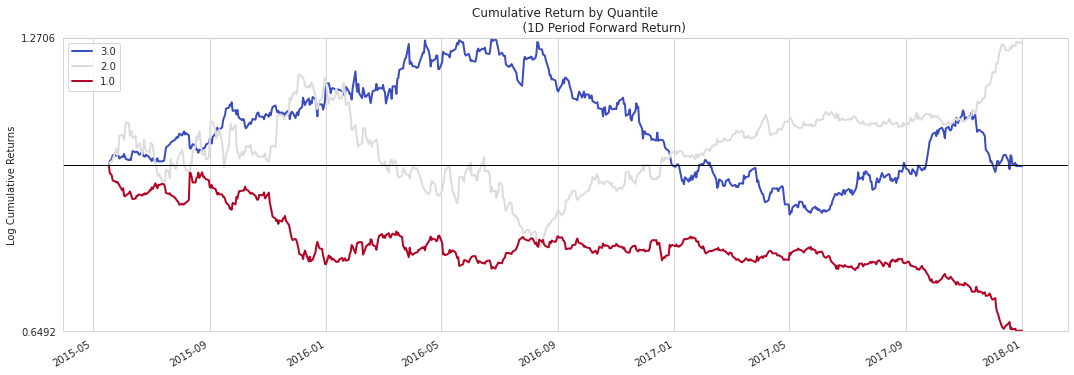

In [202]:
plotFactorQuantileBars(clf_factor_data)

plotCumulativeReturns(clf_factor_data[clf_factor_data['factor_quantile'].isin([1, 3])])

plotQuantileCumelativeReturns(clf_factor_data)

### Bollinger Bands and Money Flow

In [229]:
bbands_data = getIndicator(
    cusumTrainPrices,
    bbands, n = 12, ndev = 2,
    trailing_volume_n = 20)
bbands_data = bbands_data.unstack().asfreq('C').stack()
bbands_data

bbihband  bbilband  bbipband   bbiwband
date       symbol                                         
2015-02-27 TON.JO       0.0       1.0 -0.098141   8.058920
2015-03-02 FFB.JO       0.0       0.0  0.773837  63.763326
           TON.JO       0.0       1.0 -0.110117  11.483306
2015-03-04 FFB.JO       0.0       0.0  0.854022  60.583056
           MTN.JO       0.0       0.0  0.518621   7.480524
...                     ...       ...       ...        ...
2017-12-29 TRU.JO       0.0       0.0  0.879578  32.143398
           TSG.JO       0.0       0.0  0.904536  27.144513
           VOD.JO       0.0       0.0  0.568838  10.325203
           WHL.JO       1.0       0.0  1.021420  19.704290
           ZED.JO       1.0       0.0  1.009437  16.694463

[38628 rows x 4 columns]

In [230]:
factor = bbands_data.rename(columns = {'bbipband':'factor'})[['factor']]
bbands_factor_data = alphalens.utils.get_clean_factor(factor, forward_returns=forward_returns, quantiles = 3)
bbands_factor_data

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D    factor  factor_quantile
date       asset                                      
2015-03-02 FFB.JO  0.044741  0.773837              3.0
           TON.JO  0.074830 -0.110117              1.0
2015-03-04 FFB.JO  0.046660  0.854022              3.0
           MTN.JO  0.042597  0.518621              1.0
2015-03-05 MTN.JO -0.010282  1.052016              3.0
...                     ...       ...              ...
2017-12-29 TRU.JO  0.000000  0.879578              2.0
           TSG.JO  0.000000  0.904536              2.0
           VOD.JO  0.000000  0.568838              1.0
           WHL.JO  0.000000  1.021420              3.0
           ZED.JO  0.000000  1.009437              3.0

[38626 rows x 3 columns]

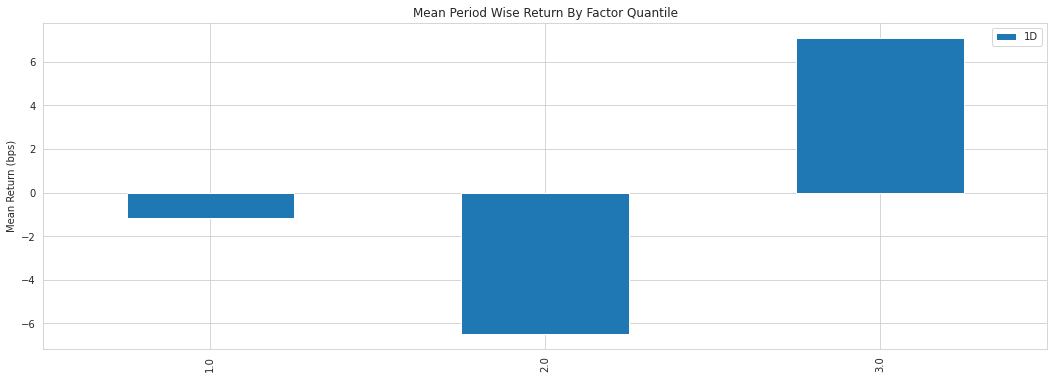

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

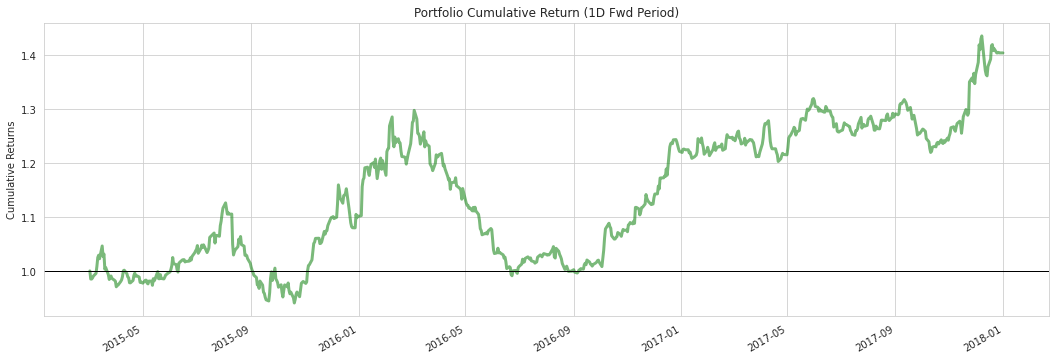

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

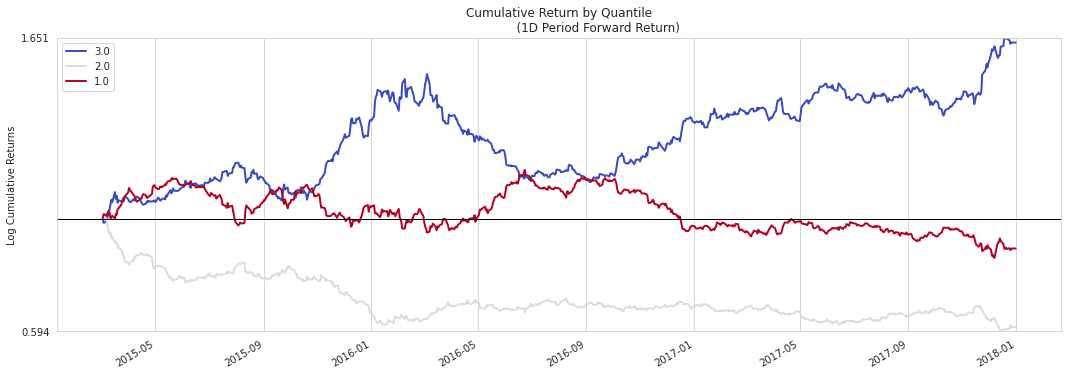

In [231]:
plotFactorQuantileBars(bbands_factor_data)

plotCumulativeReturns(bbands_factor_data[bbands_factor_data['factor_quantile'].isin([1, 3])])

plotQuantileCumelativeReturns(bbands_factor_data)

In [232]:
mfi_data = getIndicator(
    cusumTrainPrices, 
    mfi, 
    trailing_volume_n = trailing_volume_window, 
    n = 12)
mfi_data

mfi
date       symbol            
2015-03-16 ABG.JO   27.510109
2015-03-19 ABG.JO   43.726944
2015-03-20 ABG.JO   45.113670
2015-03-24 ABG.JO   44.621497
2015-04-01 ABG.JO   49.925938
...                       ...
2017-12-07 ZPLP.JO  68.051597
2017-12-14 ZPLP.JO  62.036860
2017-12-15 ZPLP.JO  33.984233
2017-12-18 ZPLP.JO  36.553404
2017-12-20 ZPLP.JO  43.276043

[38628 rows x 1 columns]

In [233]:
factor = mfi_data.rename(columns = {'mfi':'factor'})
mfi_factor_data = alphalens.utils.get_clean_factor(factor, forward_returns=forward_returns, quantiles = 3)
mfi_factor_data

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D     factor  factor_quantile
date       asset                                       
2015-03-02 FFB.JO  0.044741  38.779447              1.0
           TON.JO  0.074830  42.556369              3.0
2015-03-04 FFB.JO  0.046660  37.564538              1.0
           MTN.JO  0.042597  64.556318              3.0
2015-03-05 MTN.JO -0.010282  65.737045              1.0
...                     ...        ...              ...
2017-12-29 TRU.JO  0.000000  75.095289              2.0
           TSG.JO  0.000000  66.466032              2.0
           VOD.JO  0.000000  53.991559              1.0
           WHL.JO  0.000000  79.152837              3.0
           ZED.JO  0.000000  91.638376              3.0

[38626 rows x 3 columns]

In [234]:
bbands_factor_data = addGroupingFactor(bbands_factor_data, mfi_factor_data)
bbands_factor_data

1D    factor  factor_quantile  group
date       asset                                             
2015-03-02 FFB.JO  0.044741  0.773837              3.0    1.0
           TON.JO  0.074830 -0.110117              1.0    3.0
2015-03-04 FFB.JO  0.046660  0.854022              3.0    1.0
           MTN.JO  0.042597  0.518621              1.0    3.0
2015-03-05 MTN.JO -0.010282  1.052016              3.0    1.0
...                     ...       ...              ...    ...
2017-12-29 TRU.JO  0.000000  0.879578              2.0    2.0
           TSG.JO  0.000000  0.904536              2.0    2.0
           VOD.JO  0.000000  0.568838              1.0    1.0
           WHL.JO  0.000000  1.021420              3.0    3.0
           ZED.JO  0.000000  1.009437              3.0    3.0

[38626 rows x 4 columns]

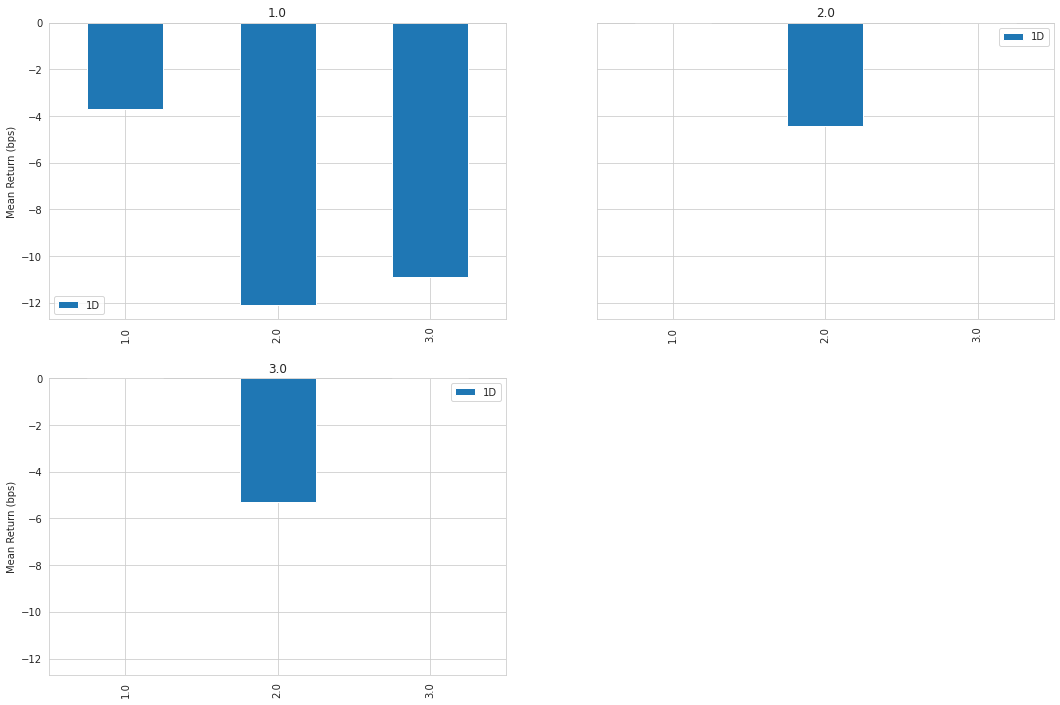

In [235]:
plotFactorQuantileBars(bbands_factor_data, by_group = True)

In [236]:
mfi_groups = getGroupingIndicator(factor = mfi_data, forward_returns = forward_returns, num_groups = 3)

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


In [237]:
train = pd.concat([bbands_data['bbipband'], target[['label']] ], axis = 1).dropna()
X = train.iloc[:, :-1]
y = train['label']
X

bbipband
2015-02-27 TON.JO -0.098141
2015-03-02 FFB.JO  0.773837
           TON.JO -0.110117
2015-03-04 FFB.JO  0.854022
           MTN.JO  0.518621
...                     ...
2017-12-29 TRU.JO  0.879578
           TSG.JO  0.904536
           VOD.JO  0.568838
           WHL.JO  1.021420
           ZED.JO  1.009437

[38628 rows x 1 columns]

In [238]:
clf = LogisticRegression(random_state=42)
# clf = LGBMClassifier(class_weight = class_weight, random_state=42) #
predictions, probabilities = modelFit(clf, X, y, cv = 20)

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!
DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


In [239]:
print(classification_report(predictions['actual'], predictions['predictions']))

              precision    recall  f1-score   support

        -1.0       0.27      0.04      0.07      9315
         0.0       0.52      0.49      0.51     19243
         1.0       0.25      0.50      0.33      9121

    accuracy                           0.38     37679
   macro avg       0.35      0.34      0.30     37679
weighted avg       0.39      0.38      0.36     37679



In [244]:
factor_quantile = predictions['predictions'].map({-1:1, 0:2, 1:3})
factor_quantile.name = 'factor_quantile'
factor_quantile

2015-04-21  ABG.JO     1
            ABSP.JO    1
            ACL.JO     3
            ADI.JO     1
            AEG.JO     3
                      ..
2017-12-29  TRU.JO     2
            TSG.JO     2
            VOD.JO     2
            WHL.JO     2
            ZED.JO     2
Name: factor_quantile, Length: 37679, dtype: int64

In [245]:
probs = probabilities.loc[:, 1] 
probs.name = 'factor'
factor = pd.DataFrame(probs) 
factor

factor
2015-04-21 ABG.JO   0.323363
           ABSP.JO  0.324915
           ACL.JO   0.345839
           ADI.JO   0.332276
           AEG.JO   0.347838
...                      ...
2017-12-29 TRU.JO   0.324943
           TSG.JO   0.324394
           VOD.JO   0.331755
           WHL.JO   0.321819
           ZED.JO   0.322083

[37679 rows x 1 columns]

In [246]:
# factor_quantile_true = predictions['actual']
# factor_quantile_true.name = 'factor_quantile'
clf_factor_data = pd.concat([forward_returns, factor, factor_quantile], axis = 1).dropna()
clf_factor_data.index.set_names(['date', 'asset'], inplace = True)
clf_factor_data

1D    factor  factor_quantile
date       asset                                       
2015-04-21 ABG.JO  -0.012129  0.323363              1.0
           ABSP.JO  0.000000  0.324915              1.0
           ACL.JO   0.000000  0.345839              3.0
           ADI.JO   0.048218  0.332276              1.0
           AEG.JO  -0.047403  0.347838              3.0
...                      ...       ...              ...
2017-12-29 TRU.JO   0.000000  0.324943              2.0
           TSG.JO   0.000000  0.324394              2.0
           VOD.JO   0.000000  0.331755              2.0
           WHL.JO   0.000000  0.321819              2.0
           ZED.JO   0.000000  0.322083              2.0

[37679 rows x 3 columns]

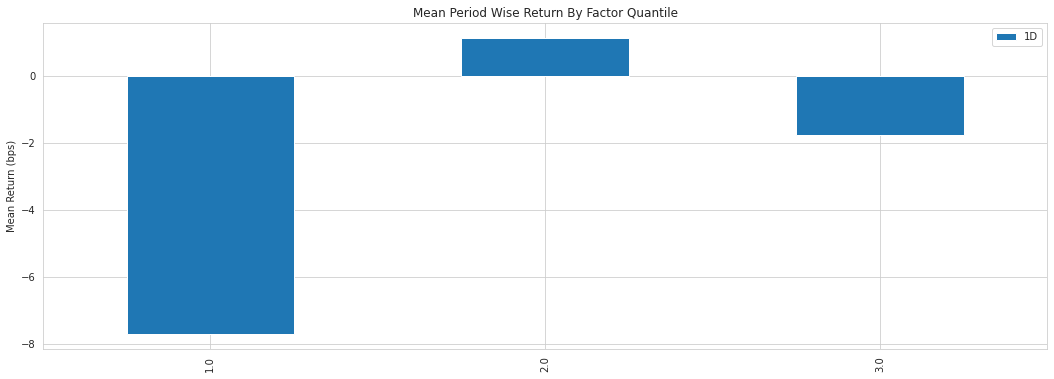

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

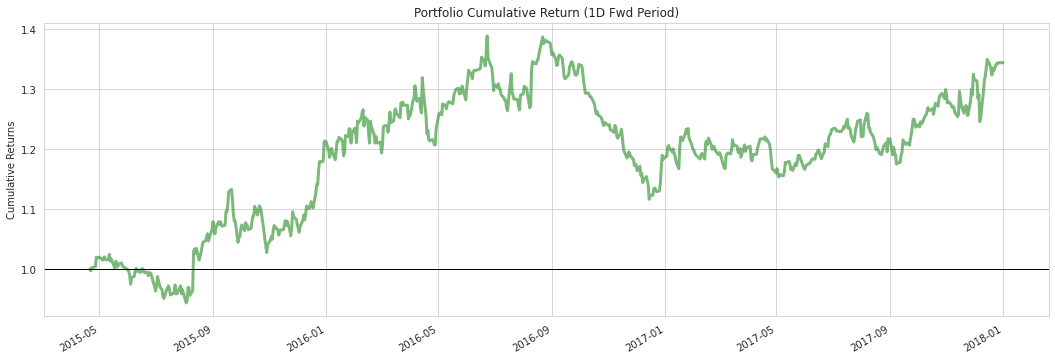

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

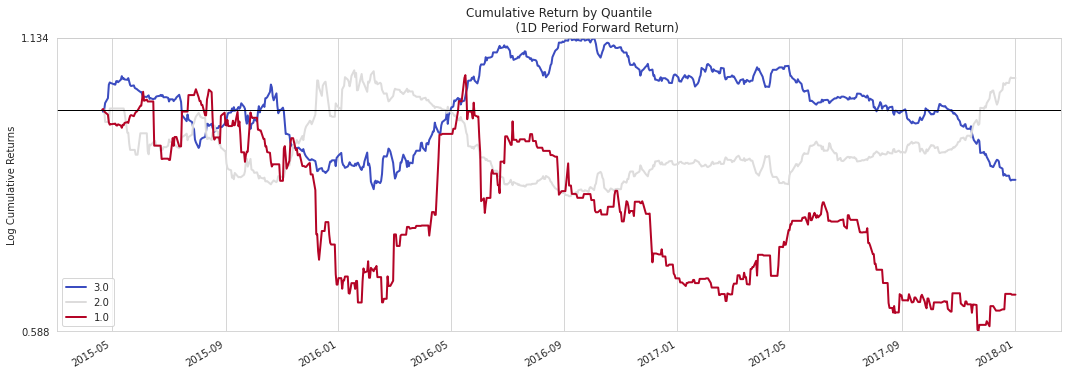

In [247]:
plotFactorQuantileBars(clf_factor_data)

plotCumulativeReturns(clf_factor_data[clf_factor_data['factor_quantile'].isin([1, 3])])

plotQuantileCumelativeReturns(clf_factor_data)

In [248]:
train = pd.concat([bbands_data[['bbipband']], mfi_groups, target[['label']]], axis = 1).dropna()
X = train.iloc[:, :-1]
y = train['label']
X

bbipband  mfi_group
2015-03-02 FFB.JO  0.773837        1.0
           TON.JO -0.110117        3.0
2015-03-04 FFB.JO  0.854022        1.0
           MTN.JO  0.518621        3.0
2015-03-05 MTN.JO  1.052016        1.0
...                     ...        ...
2017-12-29 TRU.JO  0.879578        2.0
           TSG.JO  0.904536        2.0
           VOD.JO  0.568838        1.0
           WHL.JO  1.021420        3.0
           ZED.JO  1.009437        3.0

[38626 rows x 2 columns]

In [249]:
clf = LogisticRegression(random_state=42)
# clf = LGBMClassifier(random_state=42) #
predictions, probabilities = modelFit(clf, X, y, cv = 20)

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!
DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


In [250]:
print(classification_report(predictions['actual'], predictions['predictions']))

              precision    recall  f1-score   support

        -1.0       0.26      0.26      0.26      9088
         0.0       0.52      0.42      0.47     18744
         1.0       0.24      0.34      0.29      8885

    accuracy                           0.36     36717
   macro avg       0.34      0.34      0.34     36717
weighted avg       0.39      0.36      0.37     36717



In [253]:
factor_quantile = predictions['predictions'].map({-1:1, 0:2, 1:3})
factor_quantile.name = 'factor_quantile'
factor_quantile

2015-05-18  ACT.JO    1
            ADI.JO    1
            ADR.JO    1
            AEG.JO    1
            AFE.JO    1
                     ..
2017-12-29  TRU.JO    2
            TSG.JO    2
            VOD.JO    2
            WHL.JO    2
            ZED.JO    2
Name: factor_quantile, Length: 36717, dtype: int64

In [255]:
probs = probabilities.loc[:, 1]
probs.name = 'factor'
factor = pd.DataFrame(probs) 
factor

factor
2015-05-18 ACT.JO  0.301587
           ADI.JO  0.330160
           ADR.JO  0.326360
           AEG.JO  0.323327
           AFE.JO  0.306676
...                     ...
2017-12-29 TRU.JO  0.321560
           TSG.JO  0.320789
           VOD.JO  0.321997
           WHL.JO  0.326301
           ZED.JO  0.326674

[36717 rows x 1 columns]

In [256]:
# factor_quantile_true = predictions['actual']
# factor_quantile_true.name = 'factor_quantile'
clf_factor_data = pd.concat([forward_returns, factor, factor_quantile], axis = 1).dropna()
clf_factor_data.index.set_names(['date', 'asset'], inplace = True)
clf_factor_data

1D    factor  factor_quantile
date       asset                                      
2015-05-18 ACT.JO  0.000000  0.301587              1.0
           ADI.JO -0.033333  0.330160              1.0
           ADR.JO  0.014876  0.326360              1.0
           AEG.JO -0.044049  0.323327              1.0
           AFE.JO  0.019605  0.306676              1.0
...                     ...       ...              ...
2017-12-29 TRU.JO  0.000000  0.321560              2.0
           TSG.JO  0.000000  0.320789              2.0
           VOD.JO  0.000000  0.321997              2.0
           WHL.JO  0.000000  0.326301              2.0
           ZED.JO  0.000000  0.326674              2.0

[36717 rows x 3 columns]

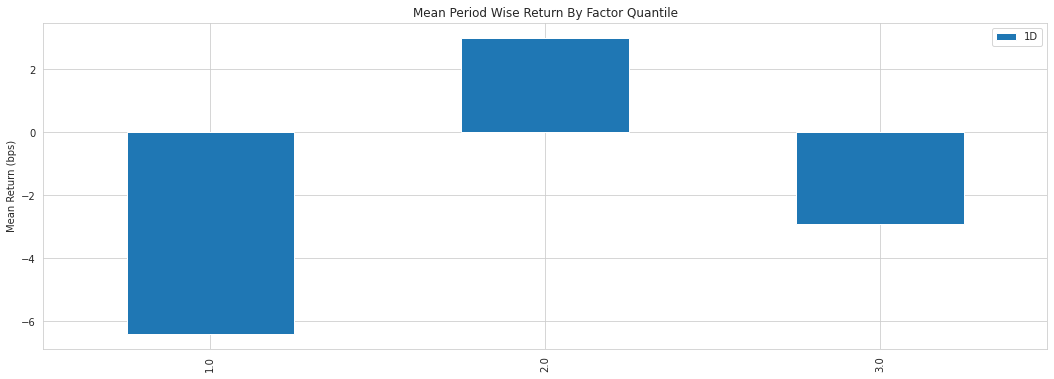

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

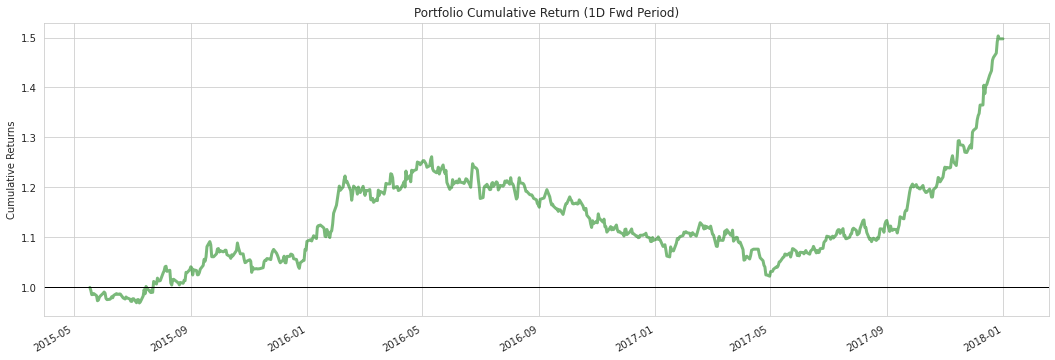

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

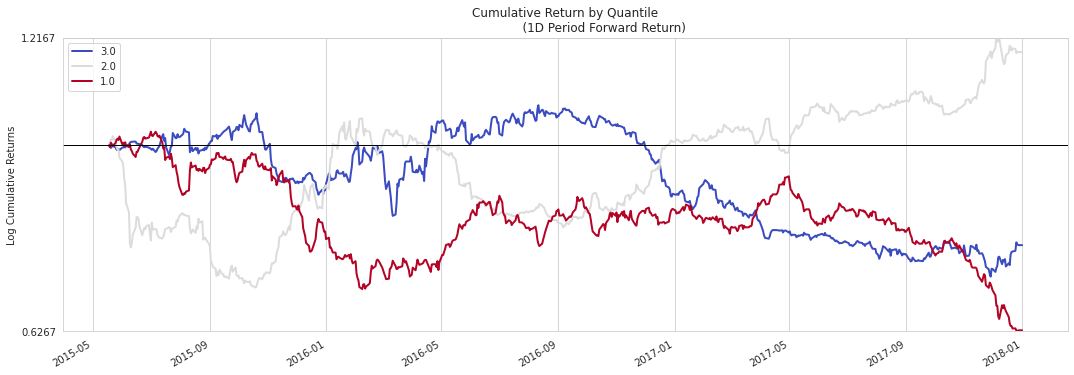

In [257]:
plotFactorQuantileBars(clf_factor_data)

plotCumulativeReturns(clf_factor_data[clf_factor_data['factor_quantile'].isin([1, 3])])

plotQuantileCumelativeReturns(clf_factor_data)

### MACD & BBANDS

In [652]:
train = pd.concat([macd_data, volume_groups, bbands_data[['bbipband']], mfi_groups, target[['label']]], axis = 1).dropna()
X = train.iloc[:, :-1]
y = train['label']
X

MACD_diff_4_6  volume_oscillator20_group  bbipband  \
2015-03-02 FFB.JO     -12.165976                        3.0  0.773837   
           TON.JO     -64.765255                        1.0 -0.110117   
2015-03-04 FFB.JO      -5.228593                        1.0  0.854022   
           MTN.JO      -9.869205                        3.0  0.518621   
2015-03-05 MTN.JO      70.291454                        3.0  1.052016   
...                          ...                        ...       ...   
2017-12-29 TRU.JO       2.424399                        3.0  0.879578   
           TSG.JO       4.651388                        3.0  0.904536   
           VOD.JO      17.674006                        3.0  0.568838   
           WHL.JO      25.698779                        3.0  1.021420   
           ZED.JO       2.565767                        3.0  1.009437   

                   mfi_group  
2015-03-02 FFB.JO        1.0  
           TON.JO        3.0  
2015-03-04 FFB.JO        1.0  
           MTN.JO        3.0  
2015-03-05 MTN.JO        1.0  
...                      ...  
2017-12-29 TRU.JO        2.0  
           TSG.JO        2.0  
           VOD.JO        1.0  
           WHL.JO        3.0  
           ZED.JO        3.0  

[38626 rows x 4 columns]

In [653]:
clf = LogisticRegression(random_state=42)
# clf = LGBMClassifier(random_state=42) #
predictions, probabilities = modelFit(clf, X, y, cv = 20)

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!
DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


In [654]:
print(classification_report(predictions['actual'], predictions['predictions']))

              precision    recall  f1-score   support

        -1.0       0.26      0.29      0.27      9088
         0.0       0.53      0.41      0.46     18744
         1.0       0.25      0.33      0.28      8885

    accuracy                           0.36     36717
   macro avg       0.34      0.34      0.34     36717
weighted avg       0.39      0.36      0.37     36717



In [655]:
factor_quantile = predictions['predictions'].map({-1:1, 0:2, 1:3})
factor_quantile.name = 'factor_quantile'
factor_quantile

2015-05-18  ACT.JO    2
            ADI.JO    3
            ADR.JO    3
            AEG.JO    1
            AFE.JO    2
                     ..
2017-12-29  TRU.JO    2
            TSG.JO    2
            VOD.JO    1
            WHL.JO    2
            ZED.JO    2
Name: factor_quantile, Length: 36717, dtype: int64

In [656]:
probs = probabilities.loc[:, 1]
probs.name = 'factor'
factor = pd.DataFrame(probs) 
factor

factor
2015-05-18 ACT.JO  0.323227
           ADI.JO  0.347348
           ADR.JO  0.343319
           AEG.JO  0.303900
           AFE.JO  0.339990
...                     ...
2017-12-29 TRU.JO  0.322075
           TSG.JO  0.321260
           VOD.JO  0.321185
           WHL.JO  0.325518
           ZED.JO  0.327118

[36717 rows x 1 columns]

In [657]:
# factor_quantile_true = predictions['actual']
# factor_quantile_true.name = 'factor_quantile'
clf_factor_data = pd.concat([forward_returns, factor, factor_quantile], axis = 1).dropna()
clf_factor_data.index.set_names(['date', 'asset'], inplace = True)
clf_factor_data

1D    factor  factor_quantile
date       asset                                      
2015-05-18 ACT.JO  0.000000  0.323227              2.0
           ADI.JO -0.033333  0.347348              3.0
           ADR.JO  0.014876  0.343319              3.0
           AEG.JO -0.044049  0.303900              1.0
           AFE.JO  0.019605  0.339990              2.0
...                     ...       ...              ...
2017-12-29 TRU.JO  0.000000  0.322075              2.0
           TSG.JO  0.000000  0.321260              2.0
           VOD.JO  0.000000  0.321185              1.0
           WHL.JO  0.000000  0.325518              2.0
           ZED.JO  0.000000  0.327118              2.0

[36717 rows x 3 columns]

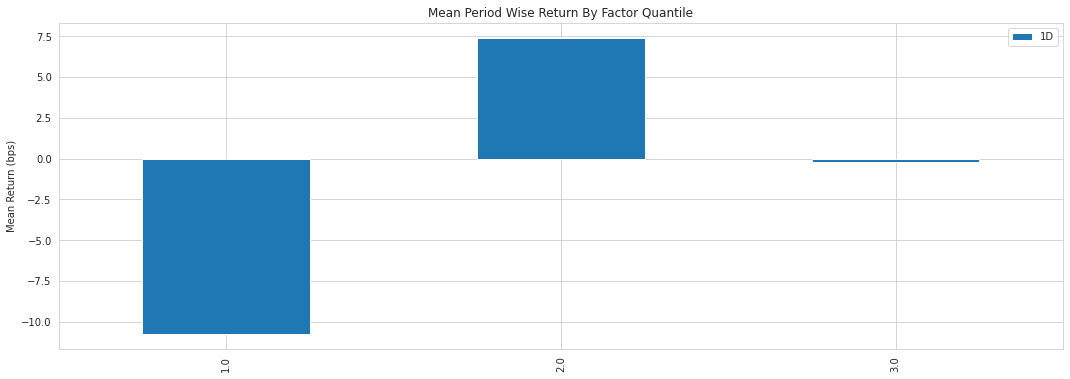

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

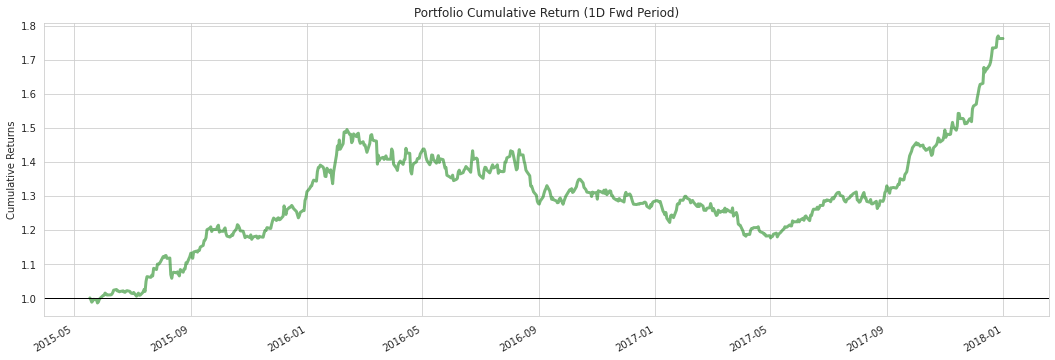

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

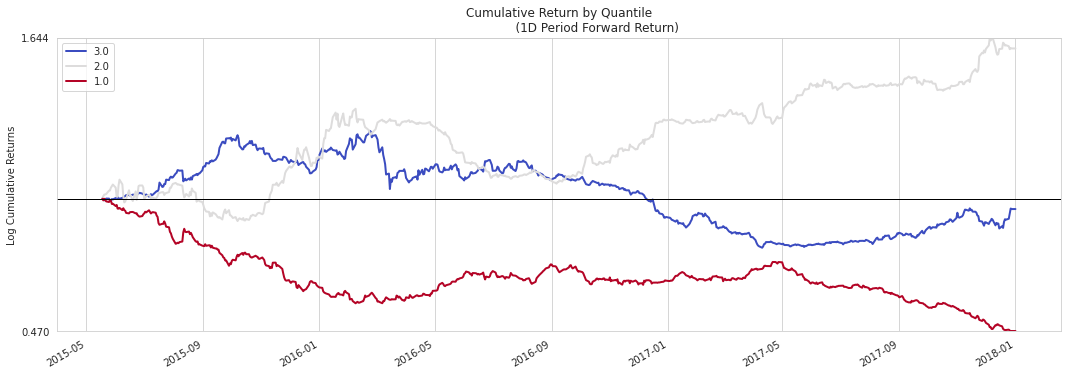

In [658]:
plotFactorQuantileBars(clf_factor_data)

plotCumulativeReturns(clf_factor_data[clf_factor_data['factor_quantile'].isin([1, 3])])

plotQuantileCumelativeReturns(clf_factor_data)

### The effect of Residual strength Index

In [659]:
rsi_data = getIndicator(
    cusumTrainPrices,
    rsi, n = 50,
    trailing_volume_n = 20)
rsi_data = rsi_data.unstack().asfreq('C').stack()
rsi_data

rsi
date       symbol              
2015-06-25 CCO.JO     65.434605
2015-06-29 NGPLT.JO   44.280214
           STXSWX.JO  53.281337
2015-07-01 NGPLT.JO   44.964744
2015-07-02 MRP.JO     52.924662
...                         ...
2017-12-29 TRU.JO     55.417044
           TSG.JO     50.334695
           VOD.JO     46.653044
           WHL.JO     49.664863
           ZED.JO     51.400305

[33005 rows x 1 columns]

In [660]:
factor = rsi_data.rename(columns = {'rsi':'factor'})
rsi_factor_data = alphalens.utils.get_clean_factor(factor, forward_returns=forward_returns, quantiles = 4)
rsi_factor_data

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D     factor  factor_quantile
date       asset                                          
2015-06-29 NGPLT.JO   0.000000  44.280214              1.0
           STXSWX.JO  0.027619  53.281337              4.0
2015-07-02 MRP.JO    -0.032003  52.924662              1.0
           STXSWX.JO -0.025950  55.275708              4.0
2015-07-06 AGL.JO    -0.066507  42.785292              1.0
...                        ...        ...              ...
2017-12-29 TRU.JO     0.000000  55.417044              3.0
           TSG.JO     0.000000  50.334695              2.0
           VOD.JO     0.000000  46.653044              1.0
           WHL.JO     0.000000  49.664863              1.0
           ZED.JO     0.000000  51.400305              2.0

[33002 rows x 3 columns]

In [661]:
# clf_factor_data.drop('group', axis = 1, inplace = True)

In [662]:
rsi_clf_factor_data = addGroupingFactor(clf_factor_data, rsi_factor_data)
rsi_clf_factor_data

1D    factor  factor_quantile  group
date       asset                                                
2015-06-29 NGPLT.JO   0.000000  0.404924              3.0    1.0
           STXSWX.JO  0.027619  0.312341              2.0    4.0
2015-07-02 MRP.JO    -0.032003  0.274267              1.0    1.0
           STXSWX.JO -0.025950  0.278093              1.0    4.0
2015-07-06 AGL.JO    -0.066507  0.361992              3.0    1.0
...                        ...       ...              ...    ...
2017-12-29 TRU.JO     0.000000  0.322075              2.0    3.0
           TSG.JO     0.000000  0.321260              2.0    2.0
           VOD.JO     0.000000  0.321185              1.0    1.0
           WHL.JO     0.000000  0.325518              2.0    1.0
           ZED.JO     0.000000  0.327118              2.0    2.0

[33002 rows x 4 columns]

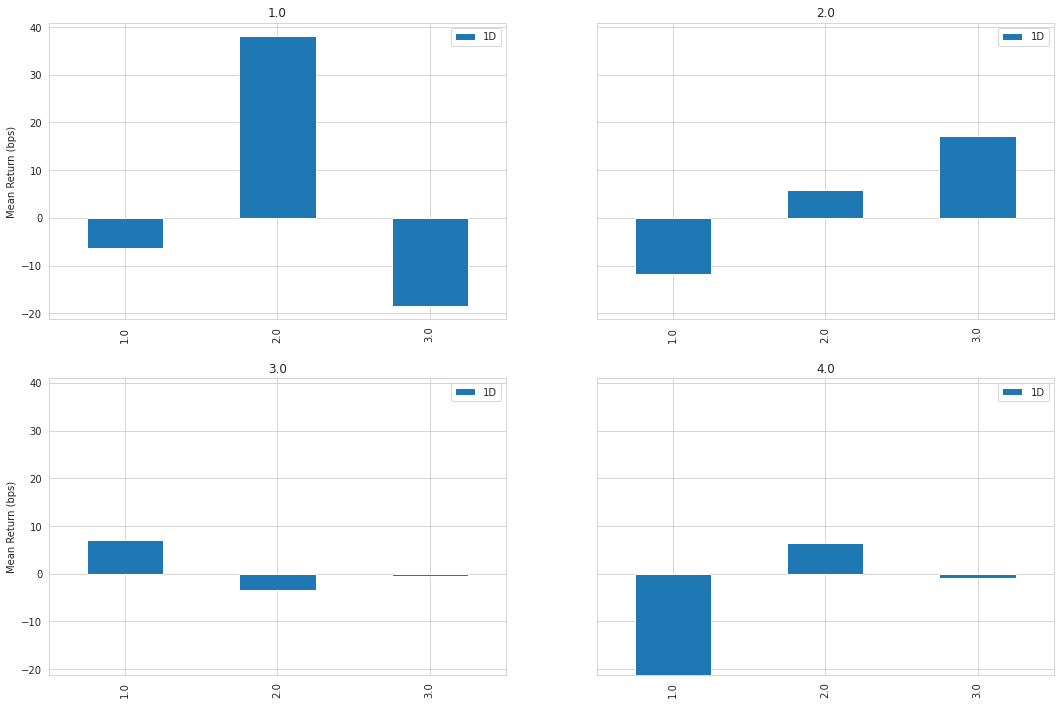

In [663]:
plotFactorQuantileBars(rsi_clf_factor_data, by_group = True)

In [664]:
rsi_groups = getGroupingIndicator(factor = rsi_data, forward_returns = forward_returns, num_groups = 4)
rsi_groups

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


date        asset    
2015-06-29  NGPLT.JO     1.0
            STXSWX.JO    4.0
2015-07-02  MRP.JO       1.0
            STXSWX.JO    4.0
2015-07-06  AGL.JO       1.0
                        ... 
2017-12-29  TRU.JO       3.0
            TSG.JO       2.0
            VOD.JO       1.0
            WHL.JO       1.0
            ZED.JO       2.0
Name: rsi_group, Length: 33002, dtype: float64

In [665]:
train = pd.concat(
    [
        macd_data, volume_groups, bbands_data[['bbipband']], mfi_groups, rsi_groups, 
         target[['label']]
        
    ], axis = 1).dropna()
X = train.iloc[:, :-1]
y = train['label']
X

MACD_diff_4_6  volume_oscillator20_group  bbipband  \
2015-06-29 NGPLT.JO       11.555259                        2.0  0.300093   
           STXSWX.JO      -0.671753                        1.0  0.494942   
2015-07-02 MRP.JO         19.357344                        3.0  0.871384   
           STXSWX.JO       0.130080                        1.0  0.809073   
2015-07-06 AGL.JO        -73.152957                        3.0 -0.094052   
...                             ...                        ...       ...   
2017-12-29 TRU.JO          2.424399                        3.0  0.879578   
           TSG.JO          4.651388                        3.0  0.904536   
           VOD.JO         17.674006                        3.0  0.568838   
           WHL.JO         25.698779                        3.0  1.021420   
           ZED.JO          2.565767                        3.0  1.009437   

                      mfi_group  rsi_group  
2015-06-29 NGPLT.JO         3.0        1.0  
           STXSWX.JO        1.0        4.0  
2015-07-02 MRP.JO           2.0        1.0  
           STXSWX.JO        1.0        4.0  
2015-07-06 AGL.JO           1.0        1.0  
...                         ...        ...  
2017-12-29 TRU.JO           2.0        3.0  
           TSG.JO           2.0        2.0  
           VOD.JO           1.0        1.0  
           WHL.JO           3.0        1.0  
           ZED.JO           3.0        2.0  

[33002 rows x 5 columns]

In [666]:
clf = LogisticRegression(random_state=42)
# clf = LGBMClassifier(random_state=42) #
predictions, probabilities = modelFit(clf, X, y, cv = 20)

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!
DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


In [667]:
print(classification_report(predictions['actual'], predictions['predictions']))

              precision    recall  f1-score   support

        -1.0       0.24      0.26      0.25      7602
         0.0       0.53      0.41      0.46     16195
         1.0       0.24      0.34      0.28      7655

    accuracy                           0.36     31452
   macro avg       0.34      0.34      0.33     31452
weighted avg       0.39      0.36      0.37     31452



In [668]:
factor_quantile = predictions['predictions'].map({-1:3, 0:2, 1:1})
factor_quantile.name = 'factor_quantile'
factor_quantile

2015-09-08  ADH.JO    2
            ADR.JO    3
            AEG.JO    3
            AFX.JO    3
            AGL.JO    3
                     ..
2017-12-29  TRU.JO    2
            TSG.JO    2
            VOD.JO    3
            WHL.JO    2
            ZED.JO    2
Name: factor_quantile, Length: 31452, dtype: int64

In [669]:
probs = probabilities.loc[:, 1] * -1
probs.name = 'factor'
factor = pd.DataFrame(probs) 
factor

factor
2015-09-08 ADH.JO -0.334503
           ADR.JO -0.324475
           AEG.JO -0.301929
           AFX.JO -0.202632
           AGL.JO -0.238571
...                     ...
2017-12-29 TRU.JO -0.333213
           TSG.JO -0.326198
           VOD.JO -0.323322
           WHL.JO -0.321495
           ZED.JO -0.328036

[31452 rows x 1 columns]

In [670]:
# factor_quantile_true = predictions['actual']
# factor_quantile_true.name = 'factor_quantile'
rsi_clf_factor_data = pd.concat([forward_returns, factor, factor_quantile], axis = 1).dropna()
rsi_clf_factor_data.index.set_names(['date', 'asset'], inplace = True)
rsi_clf_factor_data

1D    factor  factor_quantile
date       asset                                      
2015-09-08 ADH.JO -0.027772 -0.334503              2.0
           ADR.JO -0.025103 -0.324475              3.0
           AEG.JO -0.126602 -0.301929              3.0
           AFX.JO  0.000000 -0.202632              3.0
           AGL.JO  0.000000 -0.238571              3.0
...                     ...       ...              ...
2017-12-29 TRU.JO  0.000000 -0.333213              2.0
           TSG.JO  0.000000 -0.326198              2.0
           VOD.JO  0.000000 -0.323322              3.0
           WHL.JO  0.000000 -0.321495              2.0
           ZED.JO  0.000000 -0.328036              2.0

[31452 rows x 3 columns]

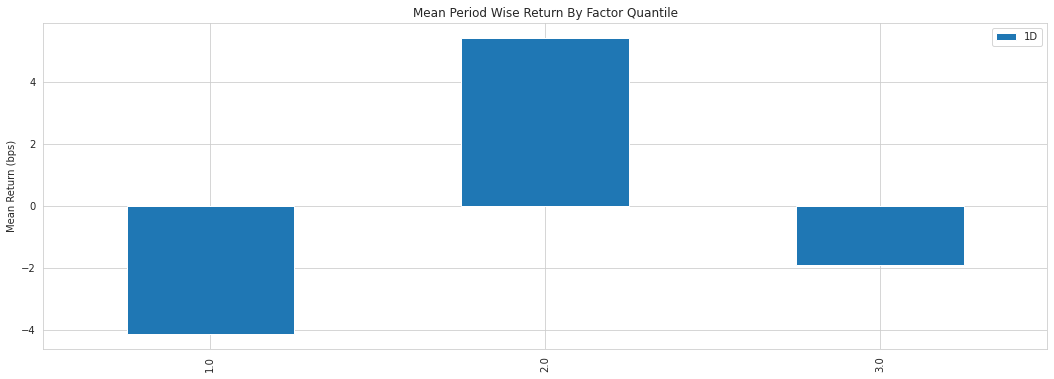

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

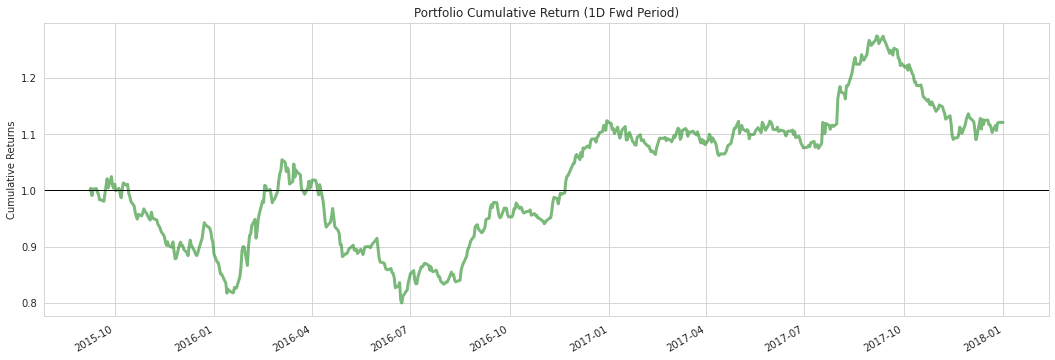

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

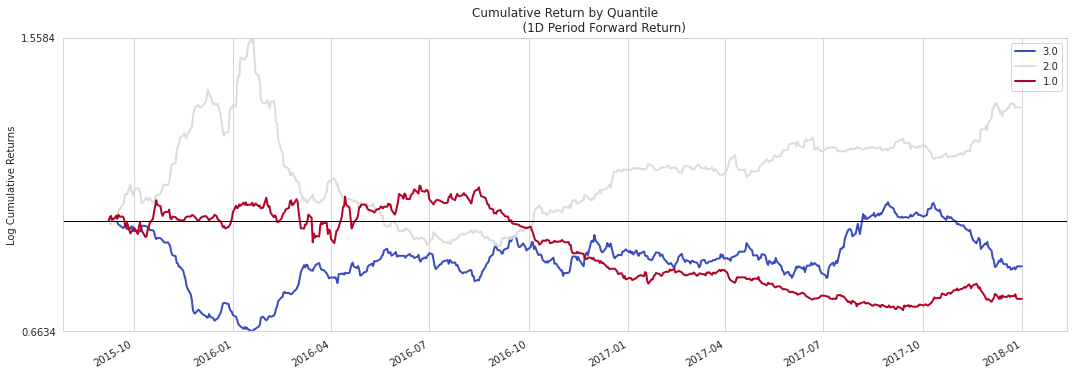

In [671]:
plotFactorQuantileBars(rsi_clf_factor_data)

plotCumulativeReturns(rsi_clf_factor_data[rsi_clf_factor_data['factor_quantile'].isin([1, 3])])

plotQuantileCumelativeReturns(rsi_clf_factor_data)

In [756]:
tsi_data = getIndicator(
    cusumTrainPrices,
    tsi, r = 20, s = 9,
    trailing_volume_n = 20)
rtsi_data = tsi_data.unstack().asfreq('C').stack()
tsi_data

tsi
date       symbol            
2015-03-16 ABG.JO         NaN
2015-03-19 ABG.JO         NaN
2015-03-20 ABG.JO         NaN
2015-03-24 ABG.JO         NaN
2015-04-01 ABG.JO         NaN
...                       ...
2017-12-07 ZPLP.JO   7.423076
2017-12-14 ZPLP.JO   5.371007
2017-12-15 ZPLP.JO   6.037756
2017-12-18 ZPLP.JO   9.699217
2017-12-20 ZPLP.JO  13.988730

[38628 rows x 1 columns]

In [757]:
train = pd.concat([rsi_data, tsi_data, target[['label']] ], axis = 1).dropna()
X = train.iloc[:, :-1]
y = train['label']
X

rsi        tsi
2015-06-25 CCO.JO     65.434605  27.119097
2015-06-29 NGPLT.JO   44.280214 -19.029196
           STXSWX.JO  53.281337  -2.385810
2015-07-01 NGPLT.JO   44.964744 -17.447005
2015-07-02 MRP.JO     52.924662   2.783588
...                         ...        ...
2017-12-29 TRU.JO     55.417044  26.509816
           TSG.JO     50.334695  22.882434
           VOD.JO     46.653044 -20.836087
           WHL.JO     49.664863  13.727651
           ZED.JO     51.400305  10.921952

[33005 rows x 2 columns]

In [758]:
clf = LogisticRegression(random_state=42)
predictions, probabilities = modelFit(clf, X, y, cv = 20)

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!
DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!
DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


In [759]:
print(classification_report(predictions['actual'], predictions['predictions']))

              precision    recall  f1-score   support

        -1.0       0.25      0.29      0.27      7893
         0.0       0.52      0.46      0.49     16732
         1.0       0.24      0.26      0.25      7889

    accuracy                           0.37     32514
   macro avg       0.34      0.34      0.34     32514
weighted avg       0.39      0.37      0.38     32514



In [760]:
factor_quantile = predictions['predictions'].map({-1:3, 0:2, 1:1})
factor_quantile.name = 'factor_quantile'
factor_quantile

2015-08-11  ACL.JO    3
            ADH.JO    1
            AEG.JO    3
            AMS.JO    3
            ANG.JO    3
                     ..
2017-12-29  TRU.JO    1
            TSG.JO    3
            VOD.JO    2
            WHL.JO    3
            ZED.JO    1
Name: factor_quantile, Length: 32514, dtype: int64

In [761]:
probs = probabilities.loc[:, 1] * -1
probs.name = 'factor'
factor = pd.DataFrame(probs) 
factor

factor
2015-08-11 ACL.JO -0.338459
           ADH.JO -0.362747
           AEG.JO -0.312681
           AMS.JO -0.325197
           ANG.JO -0.300486
...                     ...
2017-12-29 TRU.JO -0.336491
           TSG.JO -0.334412
           VOD.JO -0.331210
           WHL.JO -0.333786
           ZED.JO -0.334329

[32514 rows x 1 columns]

In [762]:
# factor_quantile_true = predictions['actual']
# factor_quantile_true.name = 'factor_quantile'
rsi_clf_factor_data = pd.concat([forward_returns, factor, factor_quantile], axis = 1).dropna()
rsi_clf_factor_data.index.set_names(['date', 'asset'], inplace = True)
rsi_clf_factor_data

1D    factor  factor_quantile
date       asset                                      
2015-08-11 ACL.JO -0.066462 -0.338459              3.0
           ADH.JO -0.014395 -0.362747              1.0
           AEG.JO -0.006667 -0.312681              3.0
           AMS.JO  0.058794 -0.325197              3.0
           ANG.JO  0.086667 -0.300486              3.0
...                     ...       ...              ...
2017-12-29 TRU.JO  0.000000 -0.336491              1.0
           TSG.JO  0.000000 -0.334412              3.0
           VOD.JO  0.000000 -0.331210              2.0
           WHL.JO  0.000000 -0.333786              3.0
           ZED.JO  0.000000 -0.334329              1.0

[32514 rows x 3 columns]

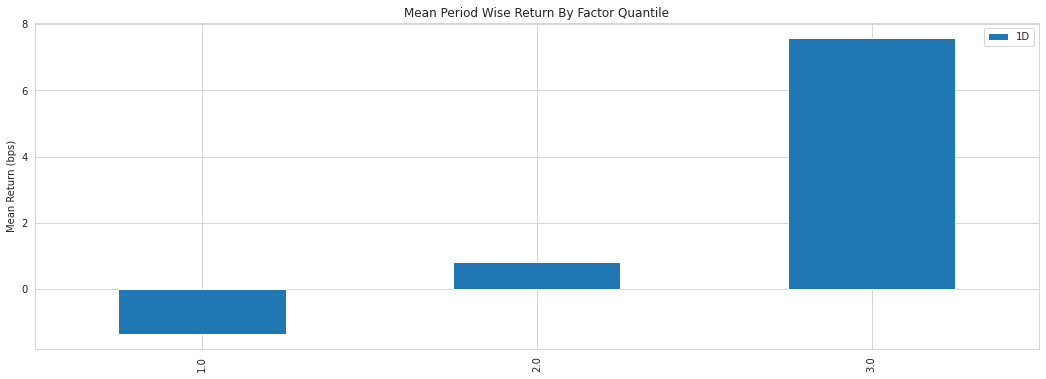

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

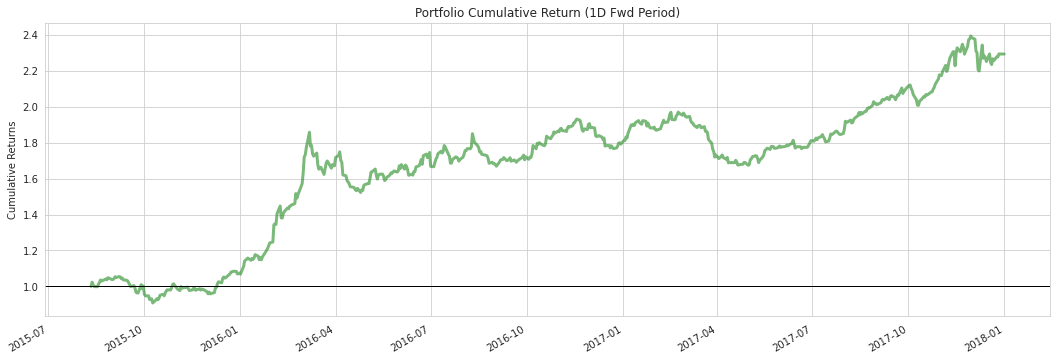

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

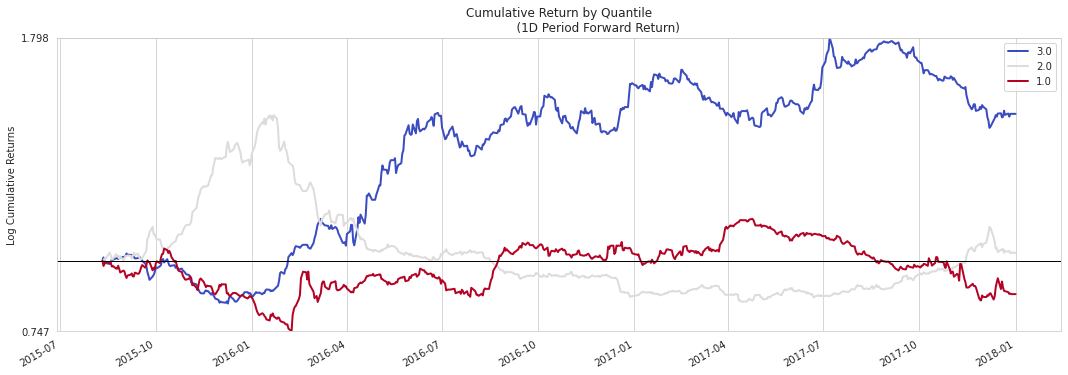

In [763]:
plotFactorQuantileBars(rsi_clf_factor_data)

plotCumulativeReturns(rsi_clf_factor_data[rsi_clf_factor_data['factor_quantile'].isin([1, 3])])

plotQuantileCumelativeReturns(rsi_clf_factor_data)

In [764]:
rsi_clf_factor_data

1D    factor  factor_quantile
date       asset                                      
2015-08-11 ACL.JO -0.066462 -0.338459              3.0
           ADH.JO -0.014395 -0.362747              1.0
           AEG.JO -0.006667 -0.312681              3.0
           AMS.JO  0.058794 -0.325197              3.0
           ANG.JO  0.086667 -0.300486              3.0
...                     ...       ...              ...
2017-12-29 TRU.JO  0.000000 -0.336491              1.0
           TSG.JO  0.000000 -0.334412              3.0
           VOD.JO  0.000000 -0.331210              2.0
           WHL.JO  0.000000 -0.333786              3.0
           ZED.JO  0.000000 -0.334329              1.0

[32514 rows x 3 columns]

In [765]:
train = pd.concat(
    [
        macd_data, volume_groups, bbands_data[['bbipband']], mfi_groups, rsi_clf_factor_data['factor_quantile'], 
         target[['label']]
        
    ], axis = 1).dropna()
X = train.iloc[:, :-1]
y = train['label']
X

MACD_diff_4_6  volume_oscillator20_group  bbipband  \
2015-08-11 ACL.JO      13.148714                        2.0  0.983605   
           ADH.JO      -2.633753                        2.0  0.655416   
           AEG.JO       0.801269                        3.0  0.421887   
           AMS.JO     151.212563                        1.0  0.895459   
           ANG.JO      32.091793                        3.0  0.237888   
...                          ...                        ...       ...   
2017-12-29 TRU.JO       2.424399                        3.0  0.879578   
           TSG.JO       4.651388                        3.0  0.904536   
           VOD.JO      17.674006                        3.0  0.568838   
           WHL.JO      25.698779                        3.0  1.021420   
           ZED.JO       2.565767                        3.0  1.009437   

                   mfi_group  factor_quantile  
2015-08-11 ACL.JO        2.0              3.0  
           ADH.JO        3.0              1.0  
           AEG.JO        2.0              3.0  
           AMS.JO        2.0              3.0  
           ANG.JO        1.0              3.0  
...                      ...              ...  
2017-12-29 TRU.JO        2.0              1.0  
           TSG.JO        2.0              3.0  
           VOD.JO        1.0              2.0  
           WHL.JO        3.0              3.0  
           ZED.JO        3.0              1.0  

[32514 rows x 5 columns]

In [766]:
clf = LogisticRegression(random_state=42)
# clf = LGBMClassifier(random_state=42) #
predictions, probabilities = modelFit(clf, X, y, cv = 20)

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!
DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


In [767]:
print(classification_report(predictions['actual'], predictions['predictions']))

              precision    recall  f1-score   support

        -1.0       0.24      0.17      0.20      7371
         0.0       0.53      0.48      0.50     15758
         1.0       0.24      0.36      0.29      7384

    accuracy                           0.38     30513
   macro avg       0.34      0.34      0.33     30513
weighted avg       0.39      0.38      0.38     30513



In [768]:
factor_quantile = predictions['predictions'].map({-1:3, 0:2, 1:1})
factor_quantile.name = 'factor_quantile'
factor_quantile

2015-10-06  ABSP.JO    1
            ACG.JO     3
            ACT.JO     2
            ADI.JO     1
            ADR.JO     1
                      ..
2017-12-29  TRU.JO     2
            TSG.JO     1
            VOD.JO     2
            WHL.JO     2
            ZED.JO     2
Name: factor_quantile, Length: 30513, dtype: int64

In [769]:
probs = probabilities.loc[:, 1] * -1
probs.name = 'factor'
factor = pd.DataFrame(probs) 
factor

factor
2015-10-06 ABSP.JO -0.424534
           ACG.JO  -0.231844
           ACT.JO  -0.294436
           ADI.JO  -0.369321
           ADR.JO  -0.389898
...                      ...
2017-12-29 TRU.JO  -0.318537
           TSG.JO  -0.334387
           VOD.JO  -0.332156
           WHL.JO  -0.333926
           ZED.JO  -0.317693

[30513 rows x 1 columns]

In [770]:
# factor_quantile_true = predictions['actual']
# factor_quantile_true.name = 'factor_quantile'
clf_factor_data2 = pd.concat([forward_returns, factor, factor_quantile], axis = 1).dropna()
clf_factor_data2.index.set_names(['date', 'asset'], inplace = True)
clf_factor_data2

1D    factor  factor_quantile
date       asset                                       
2015-10-06 ABSP.JO  0.000000 -0.424534              1.0
           ACG.JO   0.000000 -0.231844              3.0
           ACT.JO   0.049485 -0.294436              2.0
           ADI.JO   0.071790 -0.369321              1.0
           ADR.JO  -0.020282 -0.389898              1.0
...                      ...       ...              ...
2017-12-29 TRU.JO   0.000000 -0.318537              2.0
           TSG.JO   0.000000 -0.334387              1.0
           VOD.JO   0.000000 -0.332156              2.0
           WHL.JO   0.000000 -0.333926              2.0
           ZED.JO   0.000000 -0.317693              2.0

[30513 rows x 3 columns]

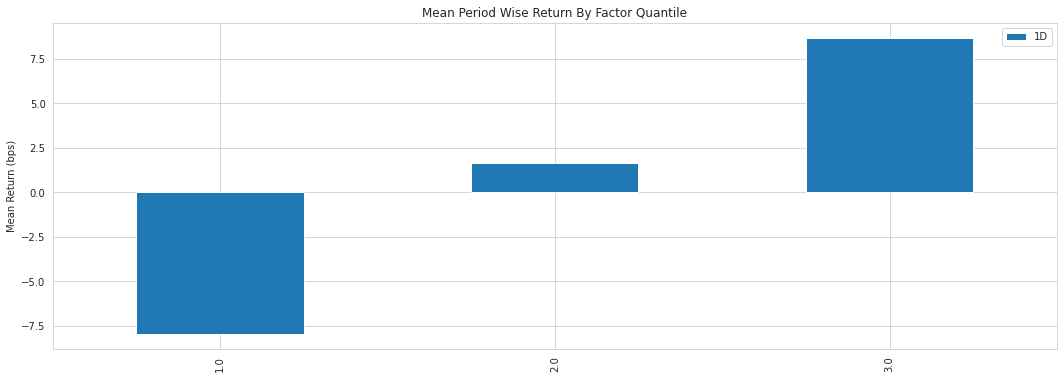

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

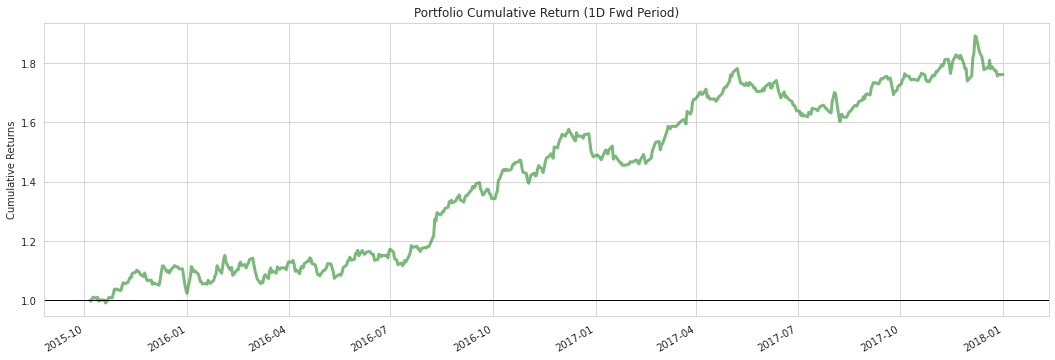

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

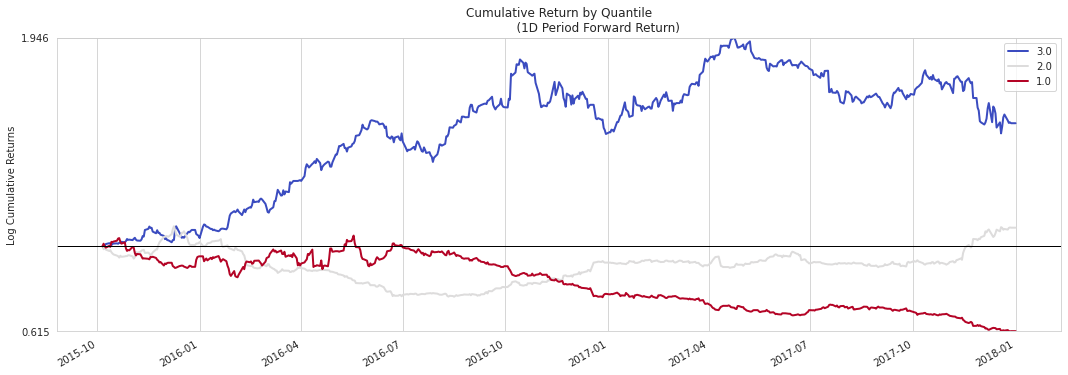

In [771]:
plotFactorQuantileBars(clf_factor_data2)

plotCumulativeReturns(clf_factor_data2[clf_factor_data2['factor_quantile'].isin([1, 3])])

plotQuantileCumelativeReturns(clf_factor_data2)

In [782]:
returns, positions, benchmark = \
    alphalens.performance.create_pyfolio_input(clf_factor_data2.loc['2016-01-01':], '1D', 10000, quantiles = [1, 3]) #

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:545: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


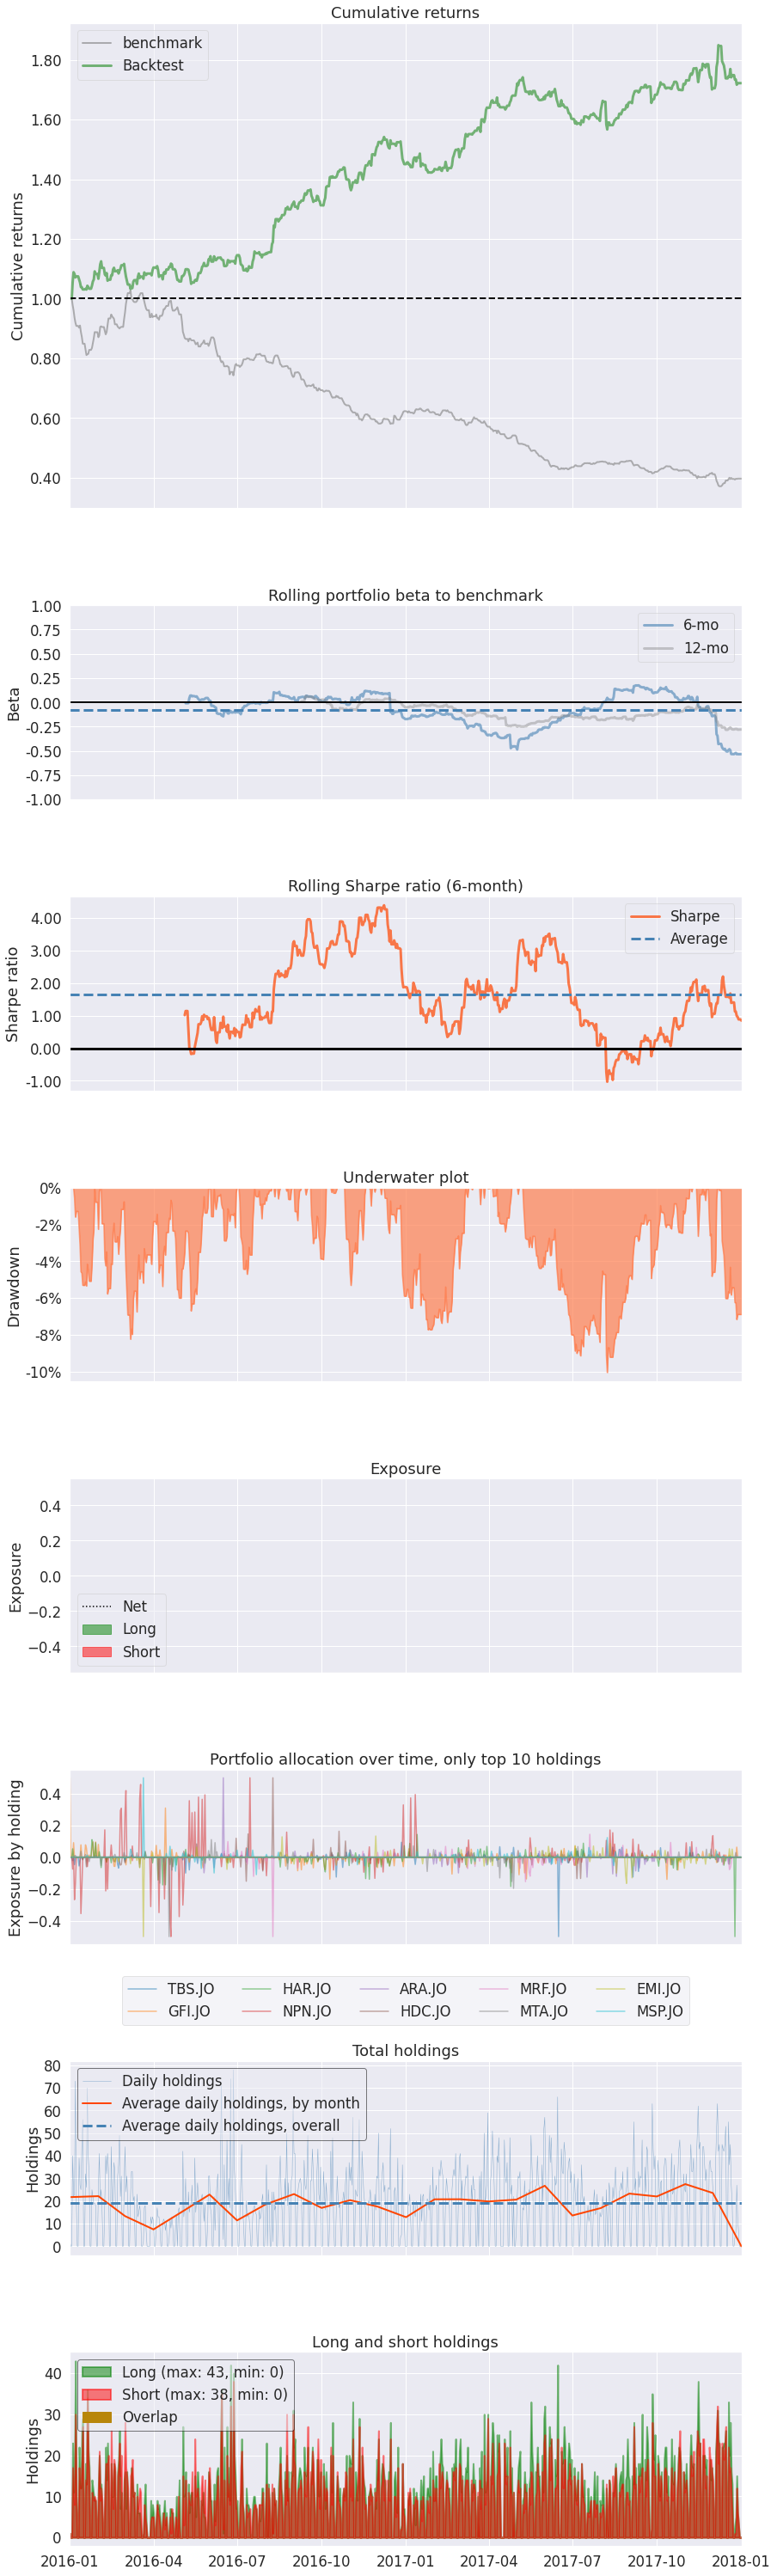

In [784]:
pyfolio.create_simple_tear_sheet(returns, positions, benchmark_rets=benchmark, slippage = 0.001)

In [780]:
returns, positions, benchmark = \
    alphalens.performance.create_pyfolio_input(clf_factor_data.loc['2016-01-01':], '1D', 10000, quantiles = [1, 3]) #.loc['2016-01-01':]

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:545: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


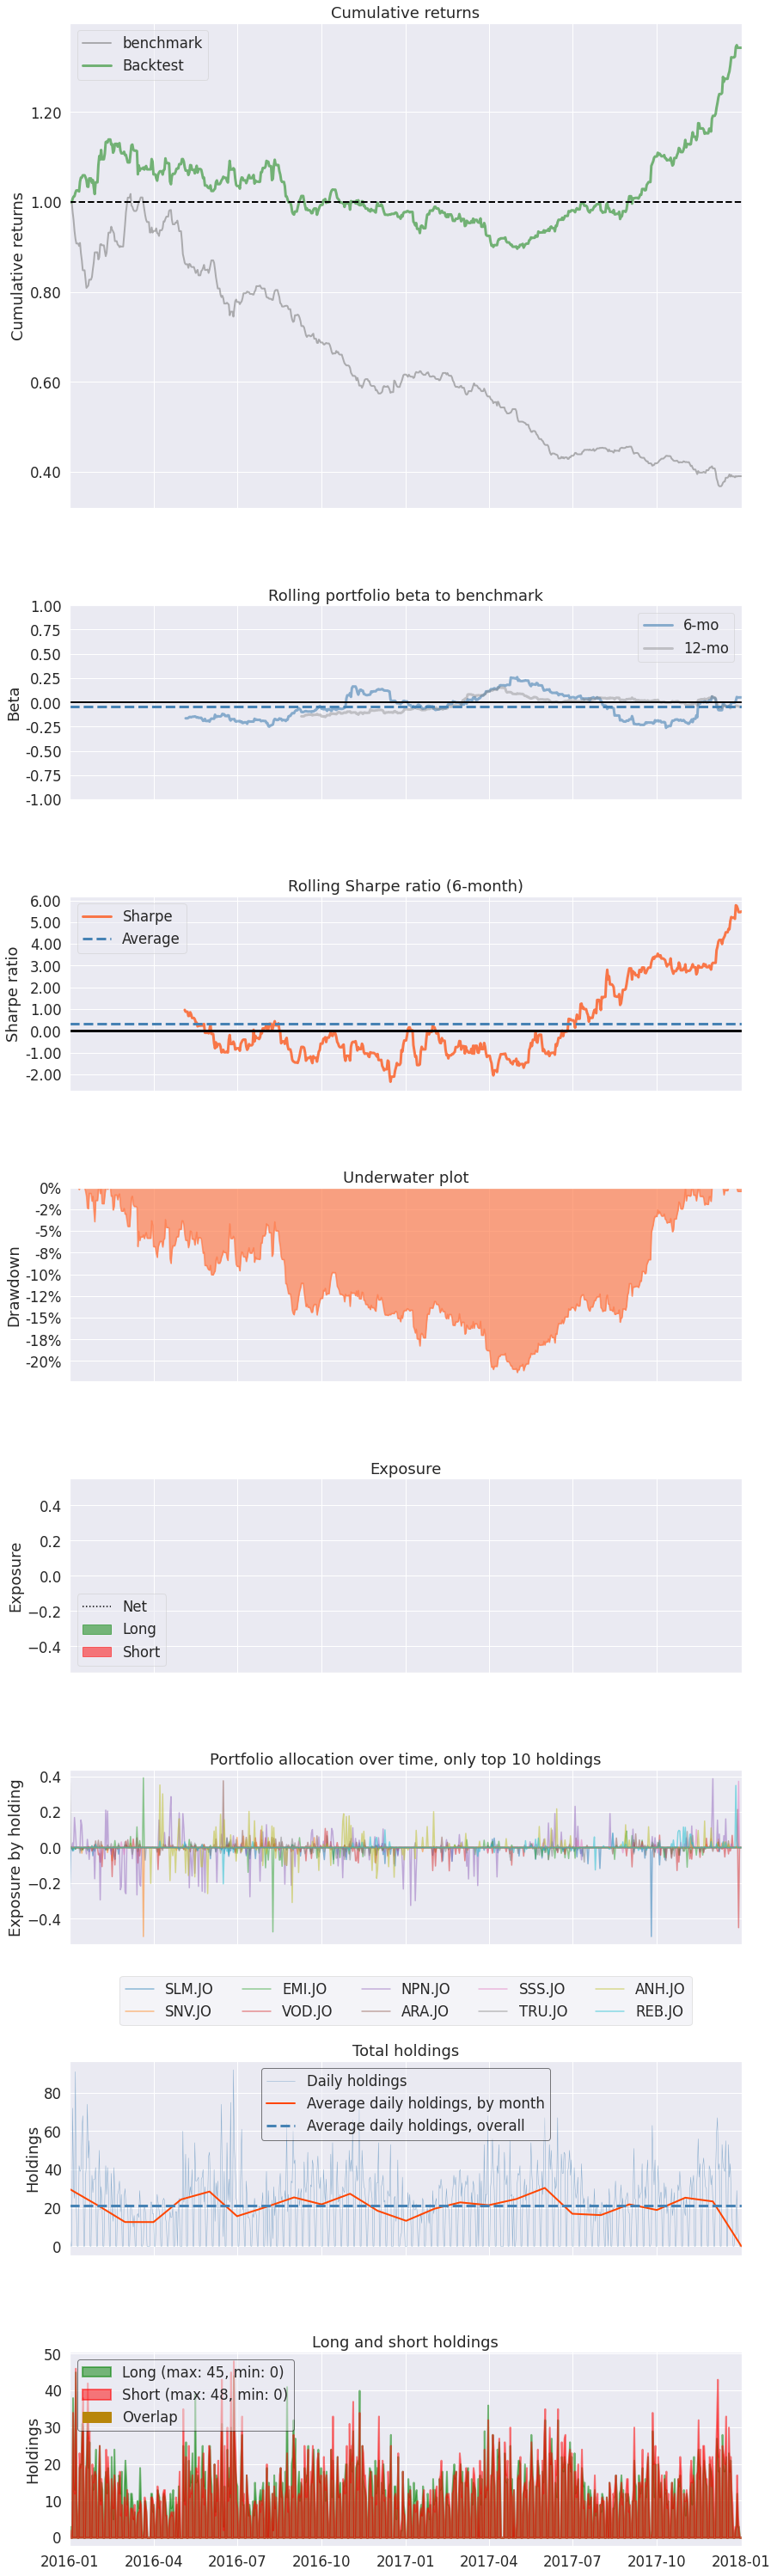

In [781]:
pyfolio.create_simple_tear_sheet(returns, positions, benchmark_rets=benchmark)

## Alpha Combination

### Predictors

In [262]:
trailing_volume_window = 20

def allIndicators(cusumTrainPrices, trainPrices, forward_returns, trailing_volume_window = 20):
    
    for symbol, data in trainPrices.items():
        data.index.name = 'date'
        trainPrices[symbol] = data

    ### trend indicators
    macd_data = getIndicator(
        cusumTrainPrices,
        macdDiff, n_slow = 6, n_fast = 4, n_sign = 3,
        trailing_volume_n = trailing_volume_window)
    macd_groups = getGroupingIndicator(factor = macd_data, forward_returns = forward_returns, num_groups = 5)
    
    ### volume indicators
    volume_osc_data = getIndicator(
        cusumTrainPrices, 
        getVolumeOsc, 
        trailing_volume_n = trailing_volume_window)
    volume_groups = getGroupingIndicator(factor = volume_osc_data, forward_returns = forward_returns, num_groups = 3)
    
    mfi_data = getIndicator(
        cusumTrainPrices, 
        mfi, 
        trailing_volume_n = trailing_volume_window, 
        n = 12)
    mfi_groups = getGroupingIndicator(factor = mfi_data, forward_returns = forward_returns, num_groups = 3)

    adi_data = getIndicator(
        cusumTrainPrices, 
        adi, 
        trailing_volume_n = trailing_volume_window)

    cmf_data = getIndicator(
        cusumTrainPrices, 
        cmf, 
        trailing_volume_n = trailing_volume_window)
    
    eom_data = getIndicator(
        cusumTrainPrices, 
        eom, n = 9, 
        trailing_volume_n = trailing_volume_window)
    
    fii_data = getIndicator(
        cusumTrainPrices, 
        fii, n = 9, 
        trailing_volume_n = trailing_volume_window)

    nvi_data = getIndicator(
        cusumTrainPrices, 
        nvi, 
        trailing_volume_n = trailing_volume_window)

    obv_data = getIndicator(
        cusumTrainPrices, 
        obv, 
        trailing_volume_n = trailing_volume_window)

    vpti_data = getIndicator(
        cusumTrainPrices, 
        vpti, 
        trailing_volume_n = trailing_volume_window)
    
    vwap_data = getIndicator(
        cusumTrainPrices, 
        vwap, 
        trailing_volume_n = trailing_volume_window)
    
    ### volatility indicators
    bbands_data = getIndicator(
        cusumTrainPrices, 
        bbands, n = 9, ndev = 2,
        trailing_volume_n = trailing_volume_window)
    
    atr_data = getIndicator(
        cusumTrainPrices, 
        atr, n = 14, 
        trailing_volume_n = trailing_volume_window)
    
    dc_data = getIndicator(
        cusumTrainPrices, 
        dc, n = 7, 
        trailing_volume_n = trailing_volume_window)

    kc_data = getIndicator(
        cusumTrainPrices, 
        kc, n = 9, n_atr = 4,
        trailing_volume_n = trailing_volume_window)

    ### Momentum indicators
    rsi_data = getIndicator(
        cusumTrainPrices, 
        rsi, n = 5,
        trailing_volume_n = trailing_volume_window)
    rsi_groups = getGroupingIndicator(factor = rsi_data, forward_returns = forward_returns, num_groups = 5)
    
    tsi_data = getIndicator(
        cusumTrainPrices, 
        tsi, r = 9, s = 5,
        trailing_volume_n = trailing_volume_window)
    tsi_groups = getGroupingIndicator(factor = tsi_data, forward_returns = forward_returns, num_groups = 5)

    kama_data = getIndicator(
        cusumTrainPrices, 
        kamaCrossOver, pow2 = 14, n = 5, 
        trailing_volume_n = trailing_volume_window)

    ao_data = getIndicator(
        cusumTrainPrices, 
        ao, 
        trailing_volume_n = trailing_volume_window)

    roc_data = getIndicator(
        cusumTrainPrices, 
        rocIndicator, 
        trailing_volume_n = trailing_volume_window)

    so_data = getIndicator(
        cusumTrainPrices, 
        stochOscillator, n = 9, m = 3, 
        trailing_volume_n = trailing_volume_window)

    wr_data = getIndicator(
        cusumTrainPrices, 
        williamsR, lbp = 9, 
        trailing_volume_n = trailing_volume_window)

    uo_data = getIndicator(
        cusumTrainPrices, 
        uo, s = 3, m = 8, len = 14, 
        trailing_volume_n = trailing_volume_window)
    
    momentum_data = getIndicator(
        cusumTrainPrices, 
        momentum, 
        trailing_volume_n = trailing_volume_window)
    
    n_diff_data = getIndicator(
        trainPrices, 
        nDifference, 
        trailing_volume_n = trailing_volume_window)
    
    return pd.concat([
        
        momentum_data, n_diff_data,
        
        # Volume
        adi_data, cmf_data, eom_data, fii_data, nvi_data, vpti_data, vwap_data, 
        mfi_groups, volume_groups,
        
        # 
        macd_data,
        macd_groups,
        
        #
        rsi_data, tsi_data, kama_data, ao_data, roc_data, so_data, wr_data, uo_data,
        rsi_groups, tsi_groups,
        #
        atr_data,  dc_data, bbands_data
                ], axis = 1
            )

In [629]:
inds = allIndicators(cusumTrainPrices, trainPrices, forward_returns = forward_returns)
inds

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


mom_2_4   mom_2_7  mom_2_10  mom_2_20  close_diff_0  \
2015-01-28 ABG.JO        NaN       NaN       NaN       NaN   -249.000000   
           ABSP.JO       NaN       NaN       NaN       NaN   -100.000000   
           ACG.JO        NaN       NaN       NaN       NaN     -5.000000   
           ACL.JO        NaN       NaN       NaN       NaN    -55.000000   
           ADH.JO        NaN       NaN       NaN       NaN     -7.807983   
...                      ...       ...       ...       ...           ...   
2017-12-29 VKE.JO   0.027500  0.019851  0.054387  0.024938    -19.000000   
           VOD.JO   0.069673  0.046158  0.006460 -0.050674   -309.000000   
           WHL.JO        NaN       NaN       NaN       NaN    -68.000000   
           ZCL.JO        NaN       NaN       NaN       NaN     -0.000000   
           ZED.JO   0.088710  0.064669  0.088710  0.104746    -23.000000   

                    close_diff_1  close_diff_2  close_diff_3  close_diff_4  \
2015-01-28 ABG.JO     -579.00000   -259.000000   -273.000000        -380.0   
           ABSP.JO       1.00000     -1.000000   -346.000000          -0.0   
           ACG.JO      -25.00000    -15.000000    -15.000000         -31.0   
           ACL.JO      -25.00000    -30.000000     25.000000          64.0   
           ADH.JO       -5.85498    -13.663025     -9.758972          -0.0   
...                          ...           ...           ...           ...   
2017-12-29 VKE.JO       11.00000     -6.000000     -0.000000          -0.0   
           VOD.JO      -24.00000   -146.000000     -0.000000          -0.0   
           WHL.JO     -118.00000    -36.000000     -0.000000          -0.0   
           ZCL.JO       -0.00000    -10.000000     -0.000000          -0.0   
           ZED.JO       12.00000     -8.000000     -0.000000          -0.0   

                    close_diff_5  ...         uo  rsi_group  tsi_group  \
2015-01-28 ABG.JO    -136.000000  ...        NaN        NaN        NaN   
           ABSP.JO     -0.000000  ...        NaN        NaN        NaN   
           ACG.JO       1.000000  ...        NaN        NaN        NaN   
           ACL.JO    -214.000000  ...        NaN        NaN        NaN   
           ADH.JO      -0.976013  ...        NaN        NaN        NaN   
...                          ...  ...        ...        ...        ...   
2017-12-29 VKE.JO       5.000000  ... -83.389748        3.0        3.0   
           VOD.JO     545.000000  ... -57.336387        5.0        4.0   
           WHL.JO     -73.000000  ...        NaN        NaN        NaN   
           ZCL.JO       5.000000  ...        NaN        NaN        NaN   
           ZED.JO       4.000000  ... -71.108094        2.0        2.0   

                         atr    dcwband   dcpband  bbihband  bbilband  \
2015-01-28 ABG.JO        NaN        NaN       NaN       NaN       NaN   
           ABSP.JO       NaN        NaN       NaN       NaN       NaN   
           ACG.JO        NaN        NaN       NaN       NaN       NaN   
           ACL.JO        NaN        NaN       NaN       NaN       NaN   
           ADH.JO        NaN        NaN       NaN       NaN       NaN   
...                      ...        ...       ...       ...       ...   
2017-12-29 VKE.JO   3.255600   8.897677  0.955556       0.0       0.0   
           VOD.JO   3.369371   7.812531  0.717605       0.0       0.0   
           WHL.JO        NaN        NaN       NaN       NaN       NaN   
           ZCL.JO        NaN        NaN       NaN       NaN       NaN   
           ZED.JO   4.349372  15.718097  0.990099       0.0       0.0   

                    bbipband   bbiwband  
2015-01-28 ABG.JO        NaN        NaN  
           ABSP.JO       NaN        NaN  
           ACG.JO        NaN        NaN  
           ACL.JO        NaN        NaN  
           ADH.JO        NaN        NaN  
...                      ...        ...  
2017-12-29 VKE.JO   0.856166   9.582361  
           VOD.JO   0.721685   7.745849  
           WHL.JO        Na

In [258]:
# def convertToMultiClass(y):
#     classes = [-1, 0, 1]
#     transformed_y = pd.DataFrame(label_binarize(
#         y, 
#         classes = classes),
#         index = y.index,
#         columns = [-1, 0, 1])
#     return transformed_y

In [451]:
# def plotROC(true_y, probabilities):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    classes = [-1, 0.0, 1]
    roc_auc = dict()
    for i, label in enumerate(classes):
        fpr[i], tpr[i], _ = roc_curve(true_y.iloc[:, i], probabilities.iloc[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fig, axes = plt.subplots(1, 3, figsize = (18, 6))
    for i, label in enumerate(classes):

    #     print(i)
        data = pd.DataFrame({'FPR':fpr[i], 'TPR':tpr[i], 'roc':roc_auc[i]})
        line_data = pd.DataFrame({'x':[0, 1], 'y':[0, 1]})

        g = sns.lineplot(data = line_data, x = 'x', y = 'y',ax = axes[i], legend = None, color = 'black')
        g = data.plot(x = 'FPR', y = 'TPR', ax = axes[i], kind = 'line', legend = None)

        g.lines[0].set_linestyle("--")
        g.set_ylabel('TPR')
        if label == 1:
            g.set_title(f"Long \n \n AUC = {round(roc_auc[i], 2)}")
        elif label == -1:
            g.set_title(f"Short \n \n AUC = {round(roc_auc[i], 2)}")
        elif label == 0:
            g.set_title(f"Neutral \n \n AUC = {round(roc_auc[i], 2)}")
    plt.show()

In [177]:
# corr_data = training.iloc[:, :-1].corr()
# corr_data

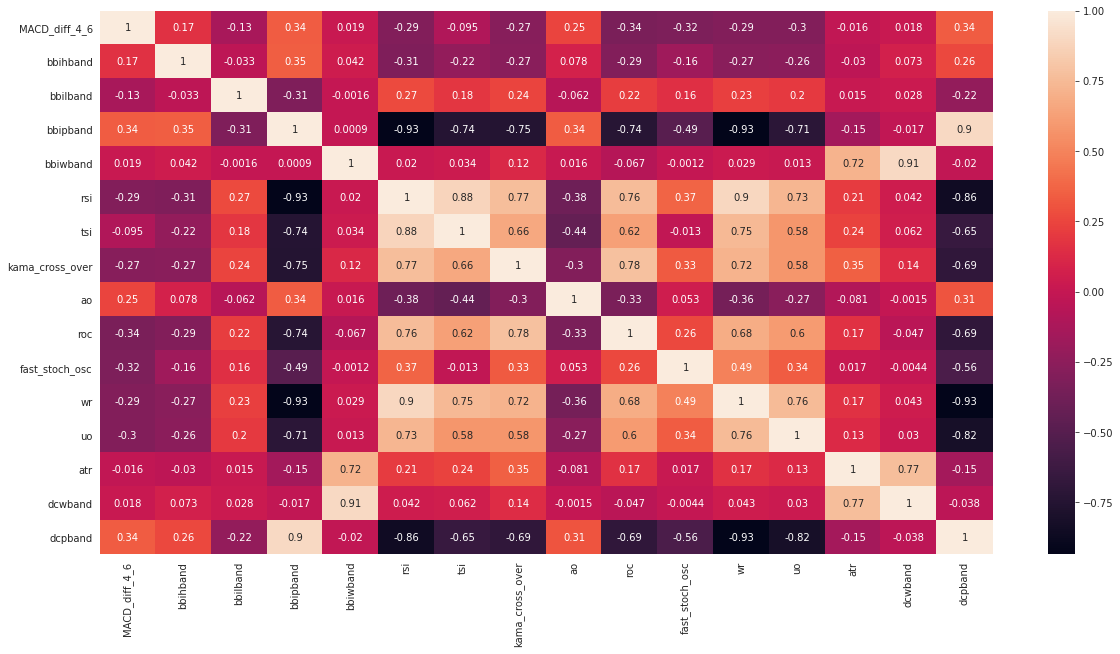

In [266]:
fig = plt.figure(figsize = (20, 10))
g = sns.heatmap(corr_data, annot = True)

In [267]:
training['label'].value_counts() / len(training)

 0    0.636404
 1    0.185306
-1    0.178290
Name: label, dtype: float64

In [268]:
training.columns

Index(['MACD_diff_4_6', 'bbihband', 'bbilband', 'bbipband', 'bbiwband', 'rsi',
       'tsi', 'kama_cross_over', 'ao', 'roc', 'fast_stoch_osc', 'wr', 'uo',
       'atr', 'dcwband', 'dcpband', 'label'],
      dtype='object')

In [269]:
X = training.iloc[:, :-1]#[['mfi_group', 'volume_oscillator20_group', 'MACD_diff_4_6', 'rsi', 'tsi', 'bbipband']]
y = training['label']

In [270]:
from sklearn.model_selection import TimeSeriesSplit

In [271]:
cv = 20
ts = TimeSeriesSplit(n_splits = cv)
for i, (train_index, test_index) in enumerate(ts.split(X.unstack())):

    print(f"Fold {i + 1} -------------------------------------------------------")
    print(f"Train: Length = {len(X.unstack().iloc[train_index, ].index)}")
    print(f"Start date: {X.unstack().iloc[train_index, ].index[0].date()}")
    print(f"End date: {X.unstack().iloc[train_index, ].index[-1].date()} \n")
    
    print(f"Test: Length =  {len(X.unstack().iloc[test_index, ].index)}")
    print(f"Start date: {X.unstack().iloc[test_index, ].index[0].date()}")
    print(f"End date: {X.unstack().iloc[test_index, ].index[-1].date()}")
    print(f"----------------------------------------------------------------")
    


Fold 1 -------------------------------------------------------
Train: Length = 36
Start date: 2015-02-27
End date: 2015-04-20 

Test: Length =  35
Start date: 2015-04-21
End date: 2015-06-08
----------------------------------------------------------------
Fold 2 -------------------------------------------------------
Train: Length = 71
Start date: 2015-02-27
End date: 2015-06-08 

Test: Length =  35
Start date: 2015-06-09
End date: 2015-07-27
----------------------------------------------------------------
Fold 3 -------------------------------------------------------
Train: Length = 106
Start date: 2015-02-27
End date: 2015-07-27 

Test: Length =  35
Start date: 2015-07-28
End date: 2015-09-14
----------------------------------------------------------------
Fold 4 -------------------------------------------------------
Train: Length = 141
Start date: 2015-02-27
End date: 2015-09-14 

Test: Length =  35
Start date: 2015-09-15
End date: 2015-11-02
---------------------------------------

In [272]:
X.index.set_names(['date', 'asset'], inplace = True)

In [273]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV

In [274]:
def modelFit(clf, X, y, cv):

    predictions = pd.DataFrame()
    probabilities = pd.DataFrame()
    ts = TimeSeriesSplit(n_splits = cv) # , max_train_size=320
    for train_index, test_index in ts.split(X.unstack()):

        train_X = X.unstack().iloc[train_index, ].stack()
        train_y = y.unstack().iloc[train_index].stack()

        test_X = X.unstack().iloc[test_index, ].stack()
        test_y = y.unstack().iloc[test_index].stack()

        target_counts = train_y.value_counts()
        positive_counts = target_counts[1]
        neutral_counts = target_counts[0]
        negative_counts = target_counts[-1]

        out = pd.DataFrame()
        for label_counts in ['positive_counts', 'negative_counts']:

            if label_counts == 'positive_counts':
                minority_mask = train_y == 1
                majority_mask = train_y == 0

            if label_counts == 'negative_counts':
                minority_mask = train_y == -1
                majority_mask = train_y == 0


            minority_df = train_X[minority_mask].copy()
            minority_df['label'] = train_y[minority_mask]

            majority_df = train_X[majority_mask].copy()
            majority_df['label'] = train_y[majority_mask]

            upsampled_minority_df = resample(
                minority_df, 
                replace = True, 
                n_samples = len(majority_df), 
                random_state = 42)

            out = pd.concat(
                [out, upsampled_minority_df])

        upsampled_df = pd.concat(
            [majority_df, out])

        upsampled_train_X = upsampled_df.drop(
            'label', axis = 1)
        upsampled_y = upsampled_df['label']

        scaler = StandardScaler()
        upsampled_train_X = pd.DataFrame(scaler.fit_transform(upsampled_train_X), 
                                           index = upsampled_train_X.index,
                                           columns = upsampled_train_X.columns)
        test_X = pd.DataFrame(scaler.transform(test_X),
                             index = test_X.index,
                             columns = test_X.columns)
        
        model = clf
        model.fit(
            upsampled_train_X, 
            upsampled_y)

        cal_model = CalibratedClassifierCV(model, cv = 'prefit')
        cal_model.fit(upsampled_train_X, upsampled_y)
        
        probs = pd.DataFrame(
            cal_model.predict_proba(test_X), 
            columns = cal_model.classes_, 
            index = test_X.index)

        probabilities = pd.concat(
            [probabilities, probs])
        
        preds = pd.DataFrame(
            model.predict(test_X), 
            columns = ['predictions'], 
            index = test_X.index)
        preds['actual'] = test_y

        predictions = pd.concat(
            [predictions, preds])
        print('DONE!!!!!!!!!!!!!!!!!!!!!')
    return predictions, probabilities

In [275]:
samples = y.value_counts()
samples

 0    24583
 1     7158
-1     6887
Name: label, dtype: int64

In [276]:
class_weight = {
    0: ((samples[0] / samples[0]) * 1), 
    1: ((samples[0] / samples[1]) * 2), # 2
    -1: ((samples[0] / samples[-1]) * 2) # 1.7
}
class_weight

{0: 1.0, 1: 6.868678401788209, -1: 7.138957456076666}

In [277]:
# y

In [278]:
clf = LogisticRegression(random_state=42)
# clf = LGBMClassifier(class_weight = class_weight, random_state=42) #
predictions, probabilities = modelFit(clf, X, y, cv = 20)

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


DONE!!!!!!!!!!!!!!!!!!!!!


In [279]:
print(classification_report(predictions['actual'], predictions['predictions']))

              precision    recall  f1-score   support

        -1.0       0.17      0.26      0.21      6743
         0.0       0.65      0.36      0.46     23938
         1.0       0.20      0.41      0.27      6998

    accuracy                           0.35     37679
   macro avg       0.34      0.34      0.31     37679
weighted avg       0.48      0.35      0.38     37679



In [280]:
factor_quantile = predictions['predictions'].map({-1:3, 0:2, 1:1})
factor_quantile.name = 'factor_quantile'
factor_quantile

date        asset  
2015-04-21  ABG.JO     1
            ABSP.JO    2
            ACL.JO     2
            ADI.JO     2
            AEG.JO     2
                      ..
2017-12-29  TRU.JO     2
            TSG.JO     2
            VOD.JO     3
            WHL.JO     2
            ZED.JO     2
Name: factor_quantile, Length: 37679, dtype: int64

In [281]:
# factor_quantile = factor_quantile.loc[datetime(2016, 1, 1):]

In [282]:
probabilities

-1.0       0.0       1.0
date       asset                                
2015-04-21 ABG.JO   0.299785  0.297509  0.402705
           ABSP.JO  0.356905  0.469367  0.173727
           ACL.JO   0.339267  0.383559  0.277174
           ADI.JO   0.317783  0.390295  0.291921
           AEG.JO   0.300201  0.377623  0.322177
...                      ...       ...       ...
2017-12-29 TRU.JO   0.308348  0.384915  0.306737
           TSG.JO   0.326047  0.417840  0.256113
           VOD.JO   0.336672  0.328381  0.334947
           WHL.JO   0.339267  0.363363  0.297371
           ZED.JO   0.304290  0.373455  0.322254

[37679 rows x 3 columns]

In [283]:
probs = probabilities.loc[:, 1] * -1
probs.name = 'factor'

In [284]:
factor = pd.DataFrame(probs) 
factor

factor
date       asset            
2015-04-21 ABG.JO  -0.402705
           ABSP.JO -0.173727
           ACL.JO  -0.277174
           ADI.JO  -0.291921
           AEG.JO  -0.322177
...                      ...
2017-12-29 TRU.JO  -0.306737
           TSG.JO  -0.256113
           VOD.JO  -0.334947
           WHL.JO  -0.297371
           ZED.JO  -0.322254

[37679 rows x 1 columns]

In [285]:
# def forwardReturns(open = None, high = None, low = None, close = None, volume = None):
#     open = open.shift(-1)
#     close = close.shift(-1)
#     ret = close.div(open).sub(1)
#     ret.name = '1D'
#     return ret

In [286]:
# adj_forward_returns = getIndicator(cusumTrainPrices, forwardReturns, filter = None)
# adj_forward_returns.sort_index(level = 'date', inplace = True)
# adj_forward_returns

In [287]:
# adj_forward_returns.dropna()

In [288]:
# forward_returns

In [289]:
# factor_quantile_true = predictions['actual']
# factor_quantile_true.name = 'factor_quantile'
clf_factor_data = pd.concat([forward_returns, factor, factor_quantile], axis = 1).dropna()
clf_factor_data.index.set_names(['date', 'asset'], inplace = True)
clf_factor_data

1D    factor  factor_quantile
date       asset                                       
2015-04-21 ABG.JO   0.000000 -0.402705              1.0
           ABSP.JO  0.000000 -0.173727              2.0
           ACL.JO  -0.018653 -0.277174              2.0
           ADI.JO   0.000000 -0.291921              2.0
           AEG.JO  -0.047403 -0.322177              2.0
...                      ...       ...              ...
2017-12-29 TRU.JO   0.000000 -0.306737              2.0
           TSG.JO   0.000000 -0.256113              2.0
           VOD.JO   0.000000 -0.334947              3.0
           WHL.JO   0.000000 -0.297371              2.0
           ZED.JO   0.000000 -0.322254              2.0

[37679 rows x 3 columns]

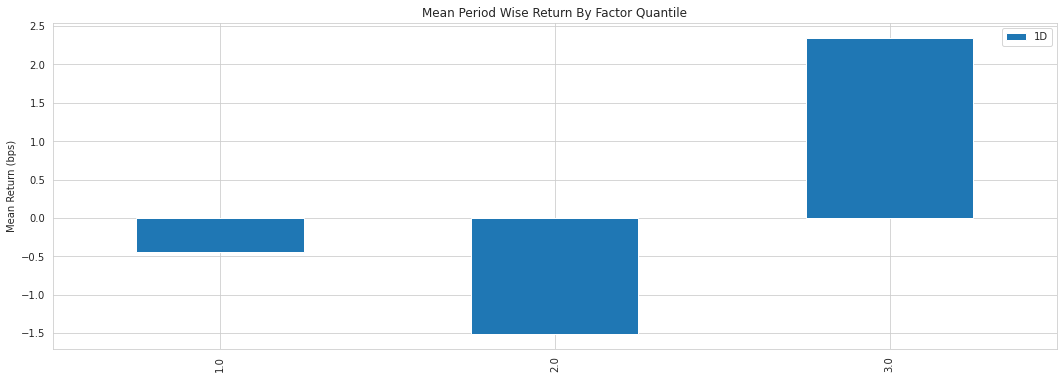

In [290]:
plotFactorQuantileBars(clf_factor_data)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

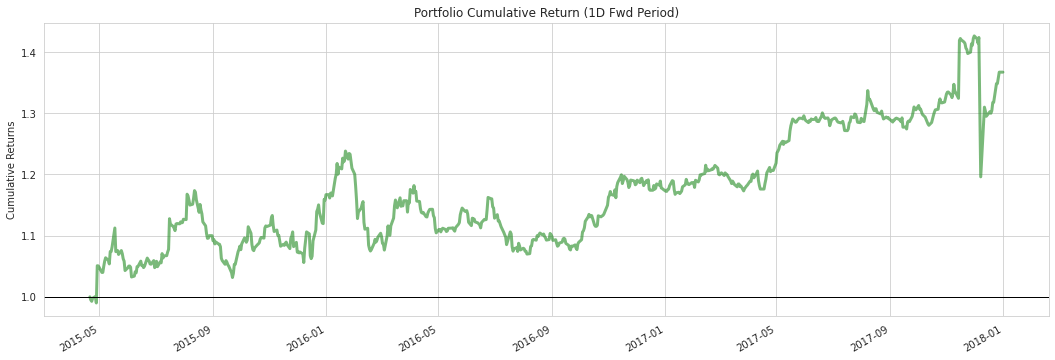

In [291]:
plotCumulativeReturns(clf_factor_data[clf_factor_data['factor_quantile'].isin([1, 3])])

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

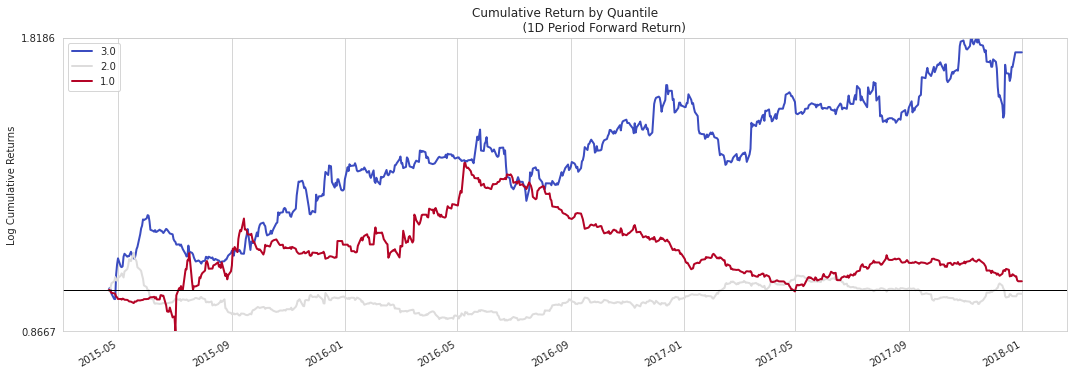

In [257]:
plotQuantileCumelativeReturns(clf_factor_data)

In [709]:
clf_factor_data2 = alphalens.utils.get_clean_factor(factor, adj_forward_returns, quantiles = 3)
clf_factor_data2 = clf_factor_data.loc[datetime(2016, 1, 1):]
clf_factor_data2

Dropped 4.5% entries from factor data: 4.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D    factor  factor_quantile
date       asset                                       
2016-01-01 ADH.JO   0.004785  0.353416              2.0
           AEG.JO  -0.004425  0.355002              3.0
           COH.JO  -0.051134  0.320423              2.0
           ITE.JO   0.000000  0.333369              2.0
           JSE.JO  -0.009742  0.372112              3.0
...                      ...       ...              ...
2017-12-28 SBPP.JO  0.007867  0.303808              2.0
           TBS.JO   0.024356  0.323920              2.0
           TDH.JO   0.000000  0.247039              1.0
           TKG.JO   0.011146  0.362501              3.0
           ZED.JO   0.034483  0.360982              3.0

[30469 rows x 3 columns]

In [710]:
# factor = factor.unstack().asfreq('C').stack()
# factor.index.levels[0].freq

In [711]:
# prices_data = getPrices(trainPrices, symbols = factor.index.levels[1])
# prices_data = prices_data.asfreq('C')

In [712]:
# clf_factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
#     factor = factor,
#     prices = prices_data,
#     quantiles=3,
#     periods = [1, 2, 5]
# )
# clf_factor_data

In [713]:
# clf_factor_data = pd.concat([forward_returns, factor, factor_quantile], axis = 1).dropna()
# clf_factor_data.index.set_names(['date', 'asset'], inplace = True)
# clf_factor_data

In [714]:
# clf_factor_data

In [715]:
# days_data = clf_factor_data.loc['2016-01-01']
# days_data

# factor_values = days_data[days_data['factor_quantile'].isin([1, 3])]
# factor_values

# factor_total = factor_values['factor'].sub(factor_values['factor'].mean()).abs().sum()
# factor_total
# # factor_values
# demeaned_factor_values = factor_values['factor'].sub(factor_values['factor'].mean()).droplevel('date').to_dict()
# demeaned_factor_values

# factor_weights = {}
# for asset, value in demeaned_factor_values.items():
#     factor_weights[asset] = value / factor_total

# # for asset in positions.dropna().index:
# #     if asset not in factor_weights.keys():
# #         factor_weights[asset] = 0.0        
        
# factor_weights

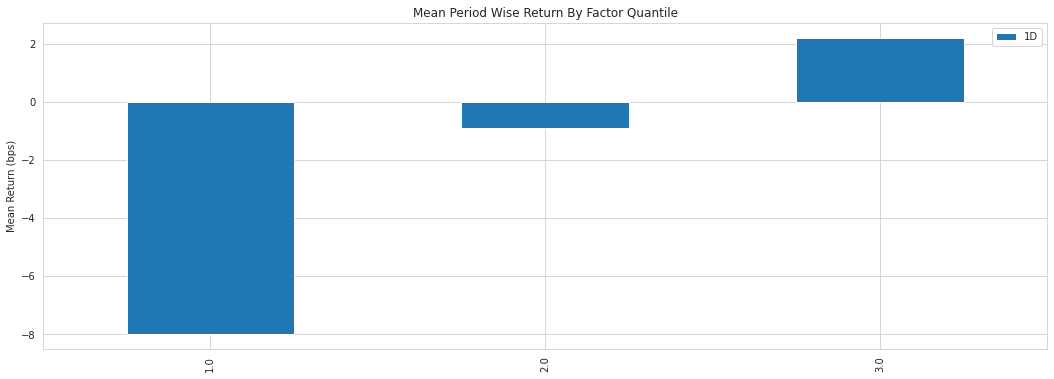

In [716]:
plotFactorQuantileBars(clf_factor_data2)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

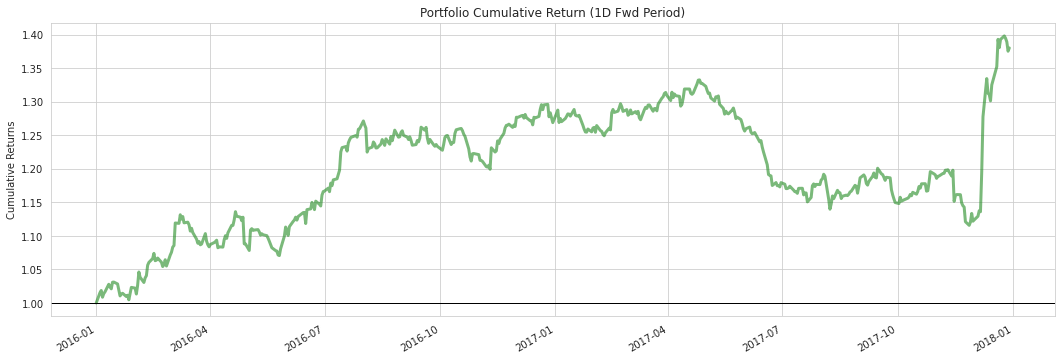

In [717]:
plotCumulativeReturns(clf_factor_data2[clf_factor_data2['factor_quantile'].isin([1, 3])])

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

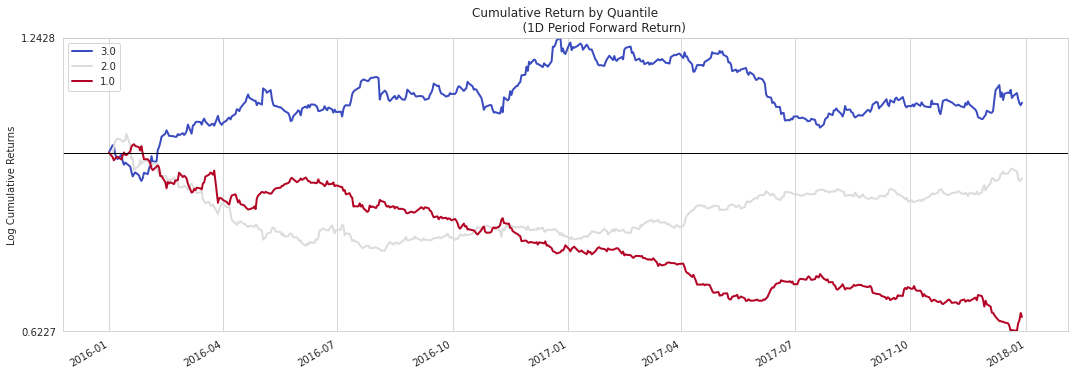

In [719]:
plotQuantileCumelativeReturns(clf_factor_data2)

In [720]:
pyfolio_input = alphalens.performance.create_pyfolio_input(clf_factor_data, period = '1D', capital = 10000, quantiles = [1, 3])

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:545: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


In [721]:
returns = pyfolio_input[0]
positions = pyfolio_input[1]
benchmark = pyfolio_input[2]

In [722]:
returns.to_csv('bt_returns.csv', index = False)
positions.to_csv('bt_positions.csv', index = False)
benchmark.to_csv('bt_benchmark.csv', index = False)

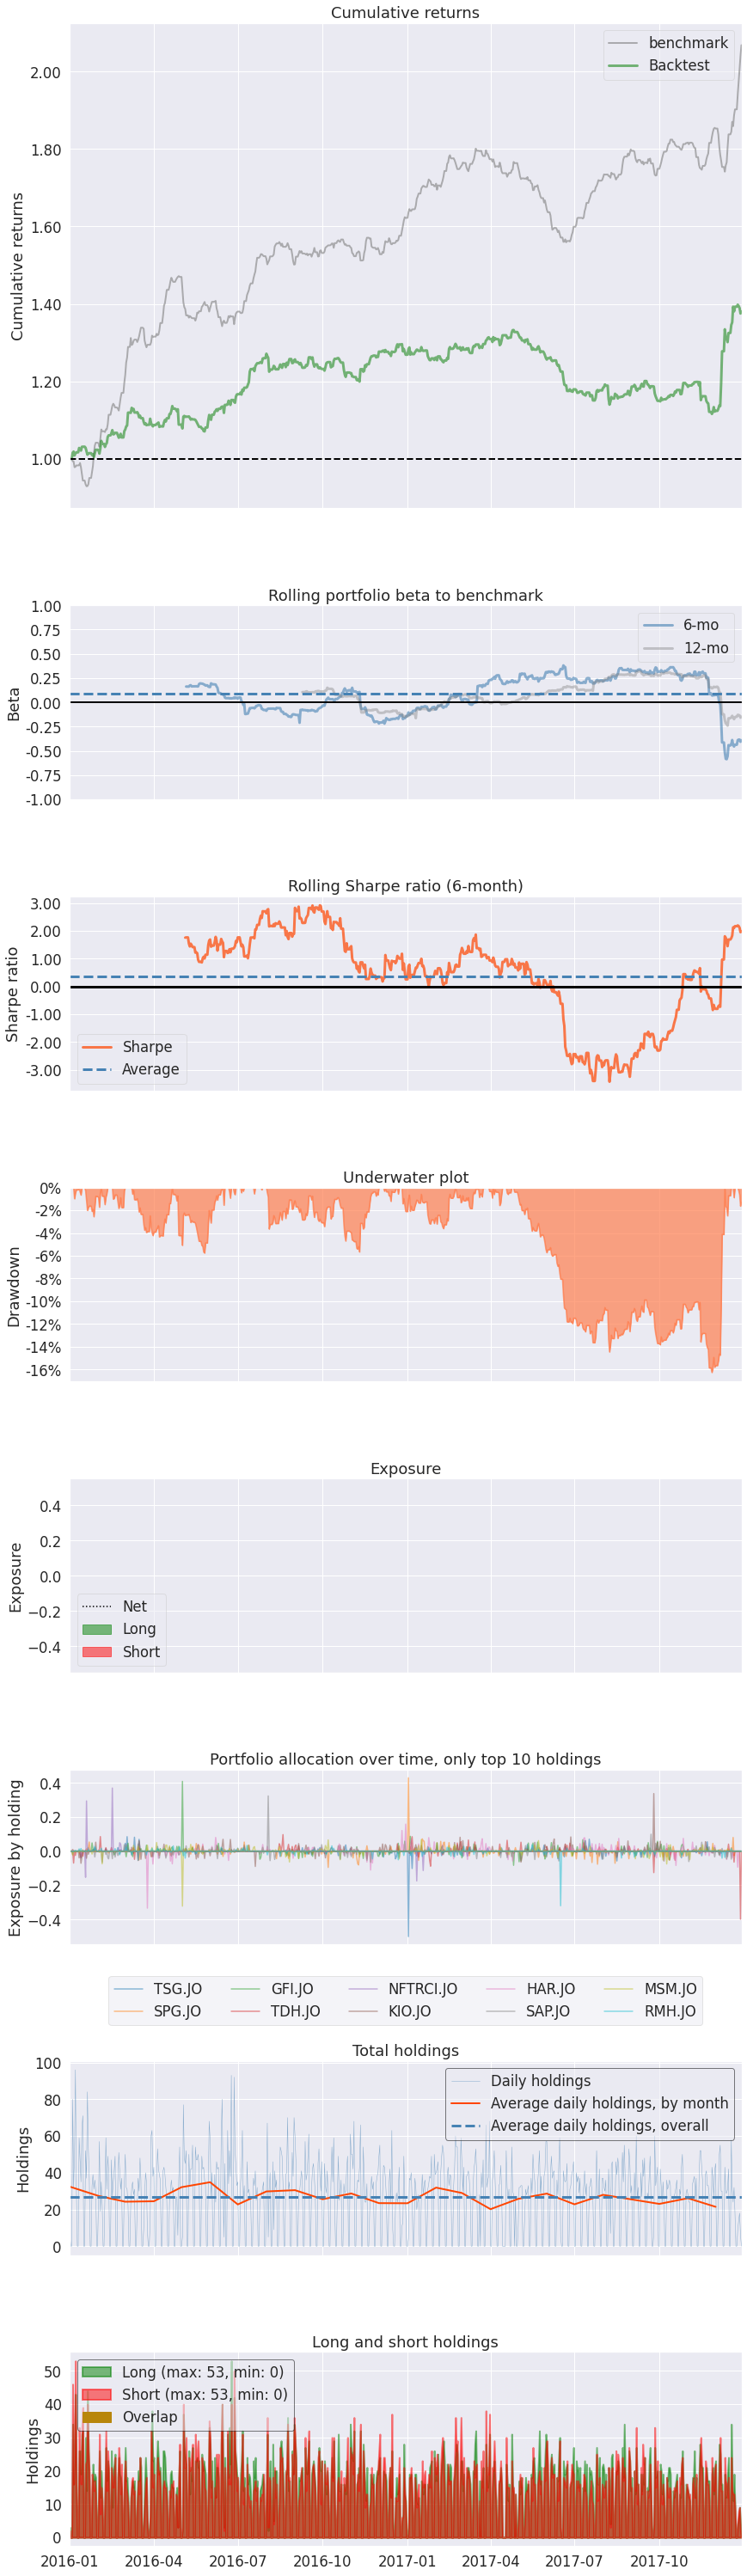

In [723]:
pyfolio.create_simple_tear_sheet(returns, positions, benchmark_rets=benchmark, slippage = 0.001)

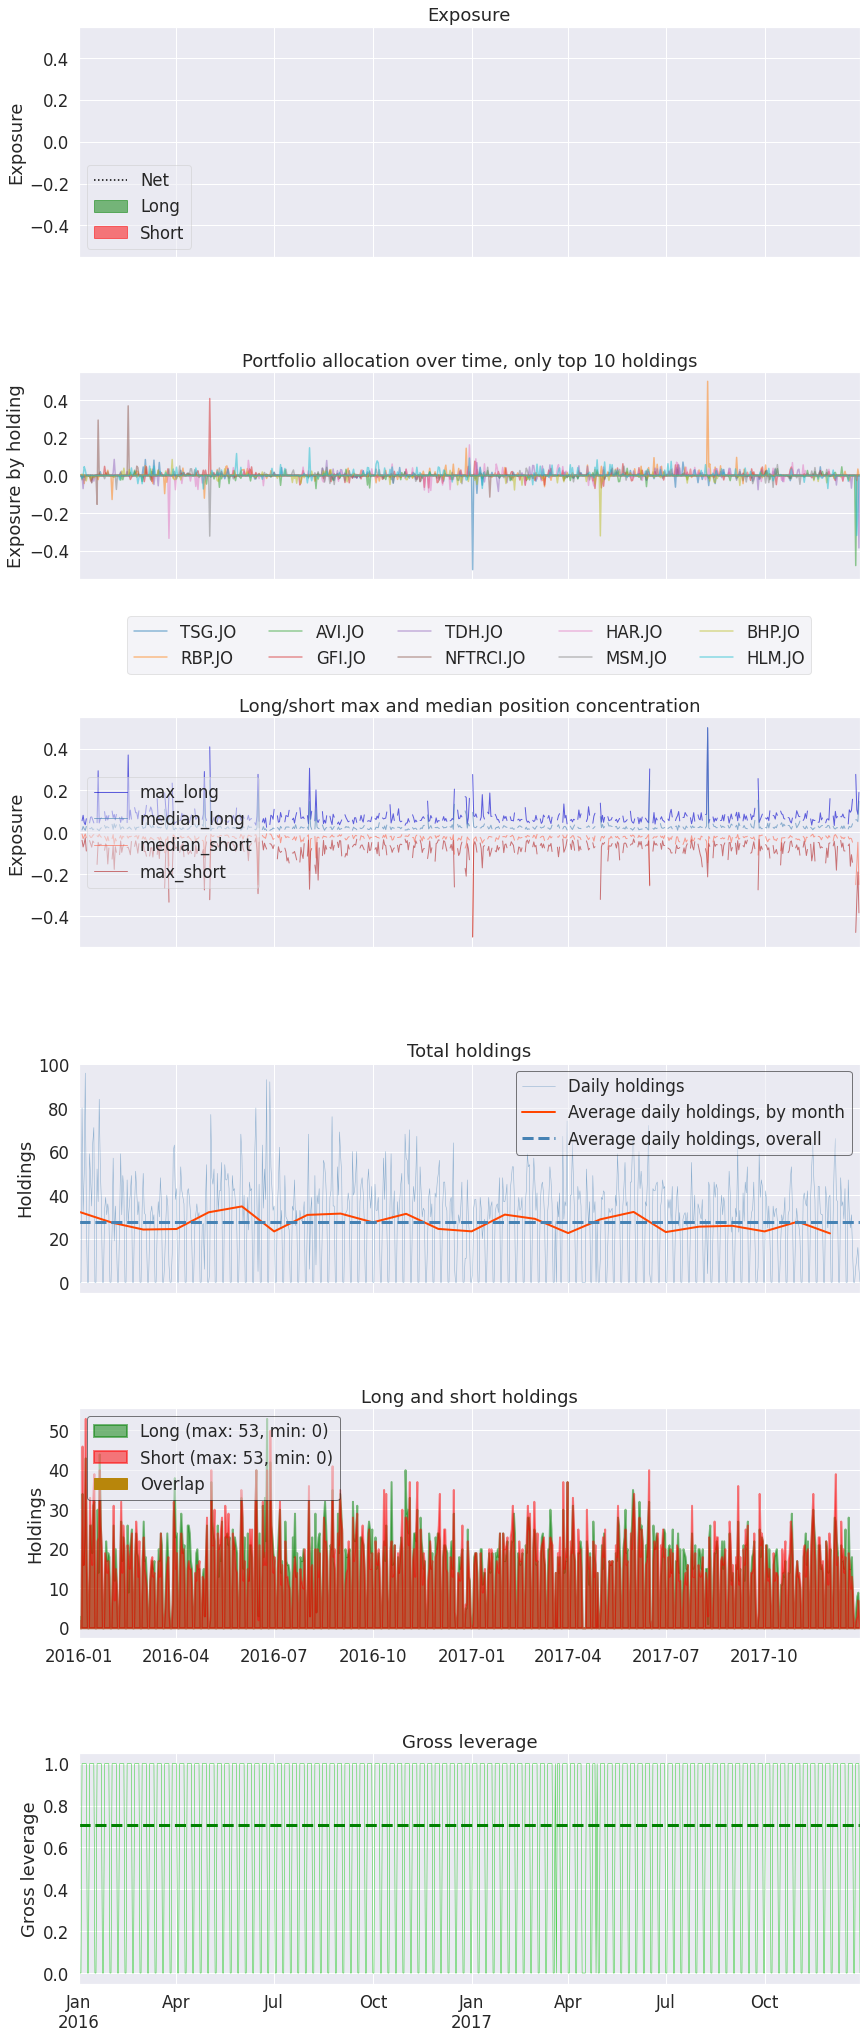

In [501]:
pyfolio.create_position_tear_sheet(returns, positions)

## Predictive Modeling and Perfomance Evaluation

### Machine Learning

### Neural Networks and Deep Learning

### Model Perfomance and Selection

## WalkForward Analysis

In [ ]:
# wf_start_date = macd_data.dropna().reset_index().sort_values('date')['date'][0]
wf_start_date = datetime(2016, 3, 1)
wf_start_date

In [ ]:
training_window = 66
testing_window = 22

In [ ]:
def getPrices(data, start_date, training_window = None, test = False, testing_window = None):
    prices = data.loc[start_date: ].copy()
    if not test:
        prices_df = prices.iloc[:training_window]
    else:
        prices_df = prices.iloc[training_window:training_window + testing_window]
    prices_df.index = pd.to_datetime(prices_df.index)
    return prices_df

In [ ]:
train_prices = getPrices(data = prices_data, start_date=wf_start_date, training_window=training_window)
test_prices = getPrices(data = prices_data, start_date=wf_start_date, training_window=training_window, test = True, testing_window=testing_window)

In [ ]:
def getFactor(indicator, date_range):
    
    factor = indicator.reset_index()
    factor_filtered = factor[factor['date'].isin(date_range)].set_index(['date', 'asset'])
    return factor_filtered

In [ ]:
macd_data_train = getFactor(indicator = macd_data, date_range = train_prices.index)
volume_data_train = getFactor(indicator = volume_data, date_range = train_prices.index)

macd_data_test = getFactor(indicator = macd_data, date_range = test_prices.index)
volume_data_test = getFactor(indicator = volume_data, date_range = test_prices.index)

In [ ]:
def getCleanFactorData(factor, prices, quantiles = 3):
    factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
        factor = factor, 
        prices = prices, 
        quantiles = quantiles, 
        max_loss = 0.75)
    return factor_data

In [ ]:
macd_factor_data_train = getCleanFactorData(factor = macd_data_train, prices = train_prices, quantiles = 3)
volume_factor_data_train = getCleanFactorData(factor = volume_data_train, prices = train_prices, quantiles = 3)

macd_factor_data_test = getCleanFactorData(factor = macd_data_test, prices = test_prices, quantiles = 3)
volume_factor_data_test = getCleanFactorData(factor = volume_data_test, prices = test_prices, quantiles = 3)

In [ ]:
def getData(macd_factor_data, volume_factor_data):
    macd_sig = macd_factor_data['factor']
    macd_sig.name = 'macd_sig'

    volume_bins = volume_factor_data['factor_quantile']
    volume_bins.name = 'volume_bins'

    target = macd_factor_data['1D']
    target.name = 'target'

    data = pd.concat([macd_sig, volume_bins, target], axis = 1)
    return data

In [ ]:
train = getData(macd_factor_data_train, volume_factor_data_train)
test = getData(macd_factor_data_test, volume_factor_data_test)

In [ ]:
train.head()

In [ ]:
train['target2']

In [ ]:
pd.qcut(train['target'], q = 3, labels = ['short', 'nothing', 'long'], duplicates = 'drop').value_counts().sum() #

In [ ]:
X_train = train[['macd_sig', 'volume_bins']]
y_train = train['target']

X_test = test[['macd_sig', 'volume_bins']]
y_test = test['target']

# Backtesting and Trading Simulation

# Summary and Conclusions